In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

720it [00:00, 733.67it/s]
100%|██████████| 720/720 [00:07<00:00, 93.60it/s] 
8280it [00:00, 240165.12it/s]
7920it [00:00, 247398.12it/s]
700it [00:00, 894.74it/s]
100%|██████████| 700/700 [00:07<00:00, 98.73it/s] 
8280it [00:00, 244316.36it/s]
7920it [00:00, 78445.04it/s]
720it [00:00, 856.32it/s]
100%|██████████| 720/720 [00:07<00:00, 95.01it/s] 
8280it [00:00, 254380.85it/s]
720it [00:00, 873.13it/s]
100%|██████████| 720/720 [00:07<00:00, 95.36it/s] 
8280it [00:00, 256917.60it/s]
700it [00:00, 905.18it/s]
100%|██████████| 700/700 [00:06<00:00, 101.04it/s]
8280it [00:00, 79384.19it/s]
509it [00:00, 1297.50it/s]
100%|██████████| 509/509 [00:02<00:00, 200.83it/s]
3664it [00:00, 255953.00it/s]
700it [00:00, 926.52it/s]
100%|██████████| 700/700 [00:06<00:00, 101.10it/s]
8280it [00:00, 240931.55it/s]
700it [00:00, 920.76it/s]
100%|██████████| 700/700 [00:06<00:00, 101.17it/s]
8280it [00:00, 236938.84it/s]
710it [00:01, 414.35it/s]
100%|██████████| 710/710 [00:07<00:00, 98.87it/s] 
8280it [

In [8]:
len(data_train), len(data_val), len(data_test)

(16560, 15840, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [10]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [11]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [12]:
model_conf

{'device': 'cuda:0', 'lr': 0.0001, 'factor': 0.75, 'patience': 2}

In [13]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [ ]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.058451


100%|██████████| 495/495 [00:37<00:00, 14.35it/s]


Mean val loss: 0.017778


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 1...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.022933


100%|██████████| 495/495 [00:37<00:00, 13.20it/s]


Mean val loss: 0.015708


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 2...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.02221


100%|██████████| 495/495 [00:37<00:00, 14.21it/s]


Mean val loss: 0.015014


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 3...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.021799


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.016747
EarlyStopping counter: 1 out of 5
Epoch 4...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.021573


100%|██████████| 495/495 [00:37<00:00, 14.14it/s]


Mean val loss: 0.013955


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 5...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.021327


100%|██████████| 495/495 [00:37<00:00, 14.52it/s]


Mean val loss: 0.013979


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 6...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.021077


100%|██████████| 495/495 [00:37<00:00, 14.20it/s]


Mean val loss: 0.013823


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 7...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.020894


100%|██████████| 495/495 [00:37<00:00, 14.28it/s]


Mean val loss: 0.01153


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 8...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.020538


100%|██████████| 495/495 [00:37<00:00, 14.20it/s]


Mean val loss: 0.011099


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 9...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.020489


100%|██████████| 495/495 [00:37<00:00, 14.16it/s]


Mean val loss: 0.01094


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 10...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.020362


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.011489
EarlyStopping counter: 1 out of 5
Epoch 11...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.02026


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.01181
EarlyStopping counter: 2 out of 5
Epoch 12...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.02027


100%|██████████| 495/495 [00:37<00:00, 14.34it/s]


Mean val loss: 0.010265


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 13...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.020088


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.011726
EarlyStopping counter: 1 out of 5
Epoch 14...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.020156


100%|██████████| 495/495 [00:37<00:00, 14.17it/s]


Mean val loss: 0.009804


  0%|          | 0/518 [00:00<?, ?it/s]

Epoch 15...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.020127


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.0099656
EarlyStopping counter: 1 out of 5
Epoch 16...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.019953


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.0098664
EarlyStopping counter: 2 out of 5
Epoch 17...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.019945


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.0099264
EarlyStopping counter: 3 out of 5
Epoch 18...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.019994


  0%|          | 0/518 [00:00<?, ?it/s]

Mean val loss: 0.010103
EarlyStopping counter: 4 out of 5
Epoch 19...


  0%|          | 0/495 [00:00<?, ?it/s]

Mean train loss: 0.019768


 87%|████████▋ | 429/495 [00:32<00:04, 13.95it/s]

## Dump experiment results

In [ ]:
import pickle
import json

In [ ]:
# p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# # p = 'carb96558_exp_results.pkl'
# with open(p, 'wb') as f:
#     pickle.dump(results, f)

In [ ]:
model_conf

In [20]:
# model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## Train and validation losses

In [ ]:
from itertools import chain

In [ ]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [ ]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')
plt.yscale('log')
# plt.ylim([1e-2, 1])
plt.show()

In [ ]:
mean_train_loss = [np.mean(item) for item in results['val_losses']]
mean_val_loss = [np.mean(item) for item in results['train_losses']]

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [30]:
import os

In [31]:
import torch

In [32]:
from visualization_utils import output_to_binary, plot_sample

In [33]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

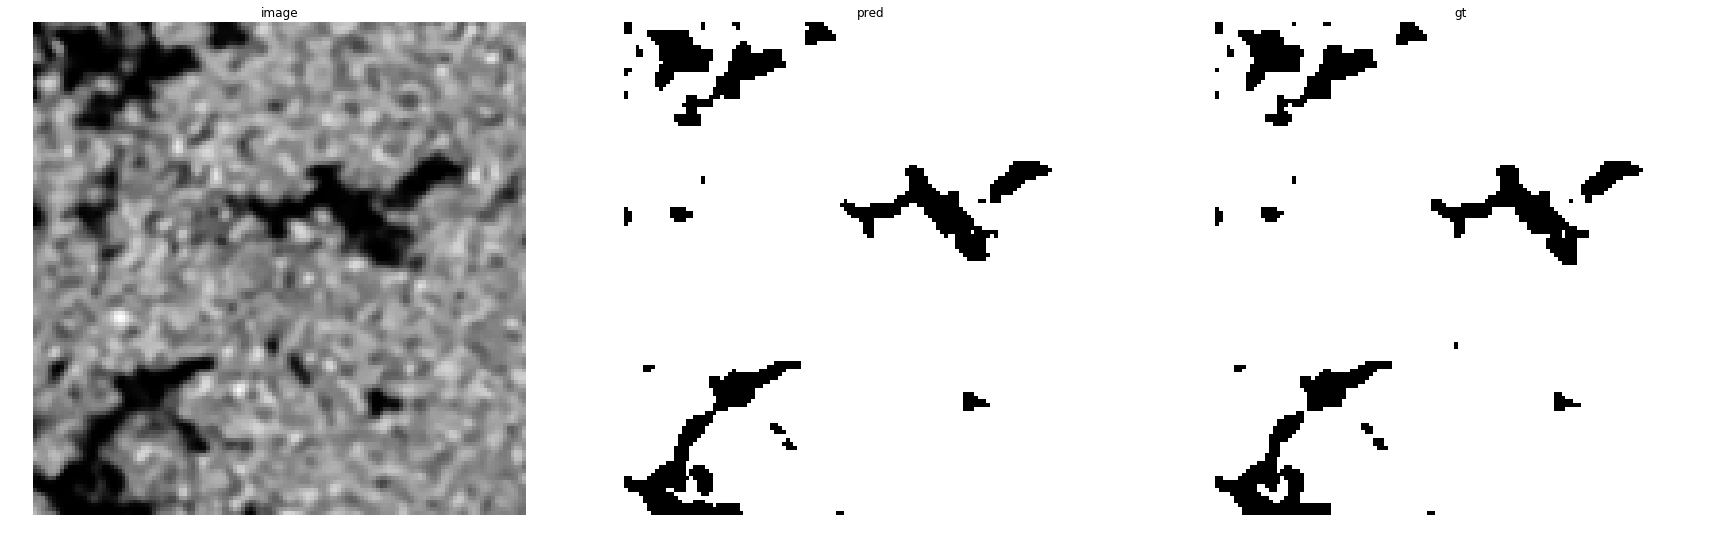

accuracy    : 0.994384765625
precision   : 0.9970887918486172
recall      : 0.9968249768487896
f1          : 0.9969568668960044
pr_auc      : 0.9999735581581772
iou         : 0.9939321989183485


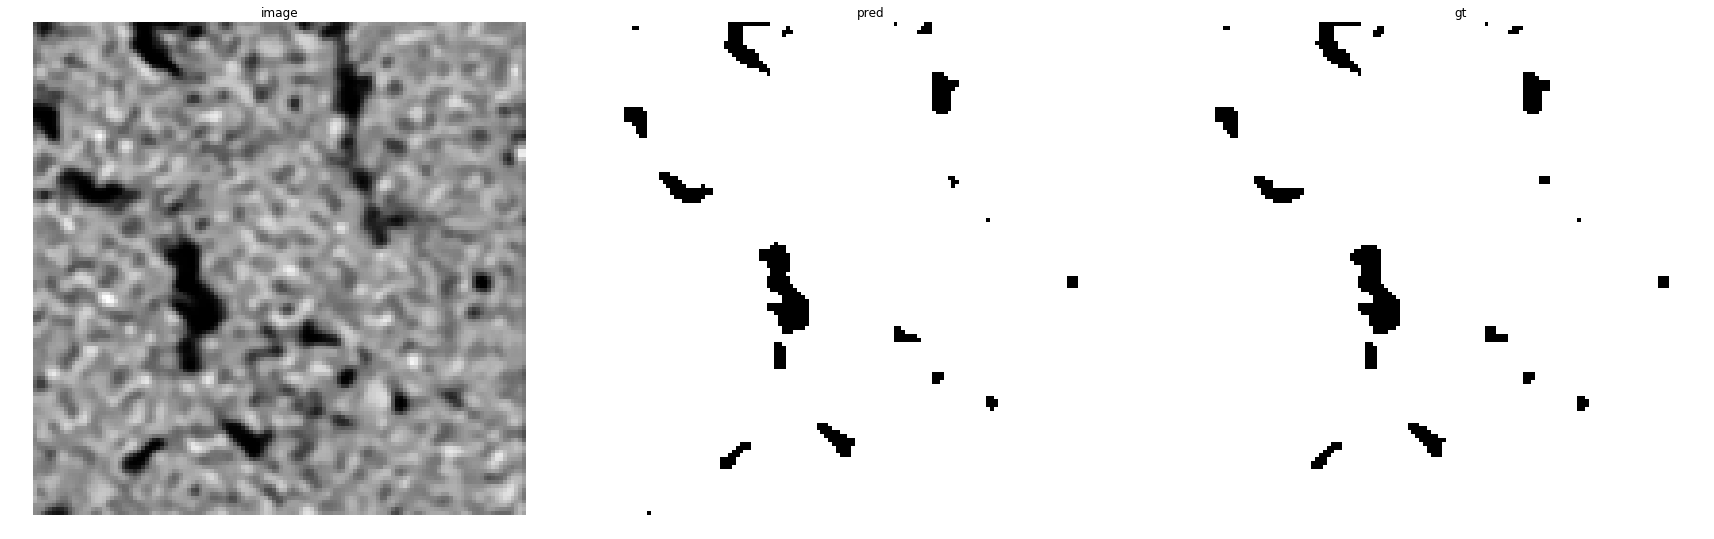

accuracy    : 0.997802734375
precision   : 0.9989908546199937
recall      : 0.9987388864367236
f1          : 0.9988648546383301
pr_auc      : 0.9999958225207692
iou         : 0.9977322834645669


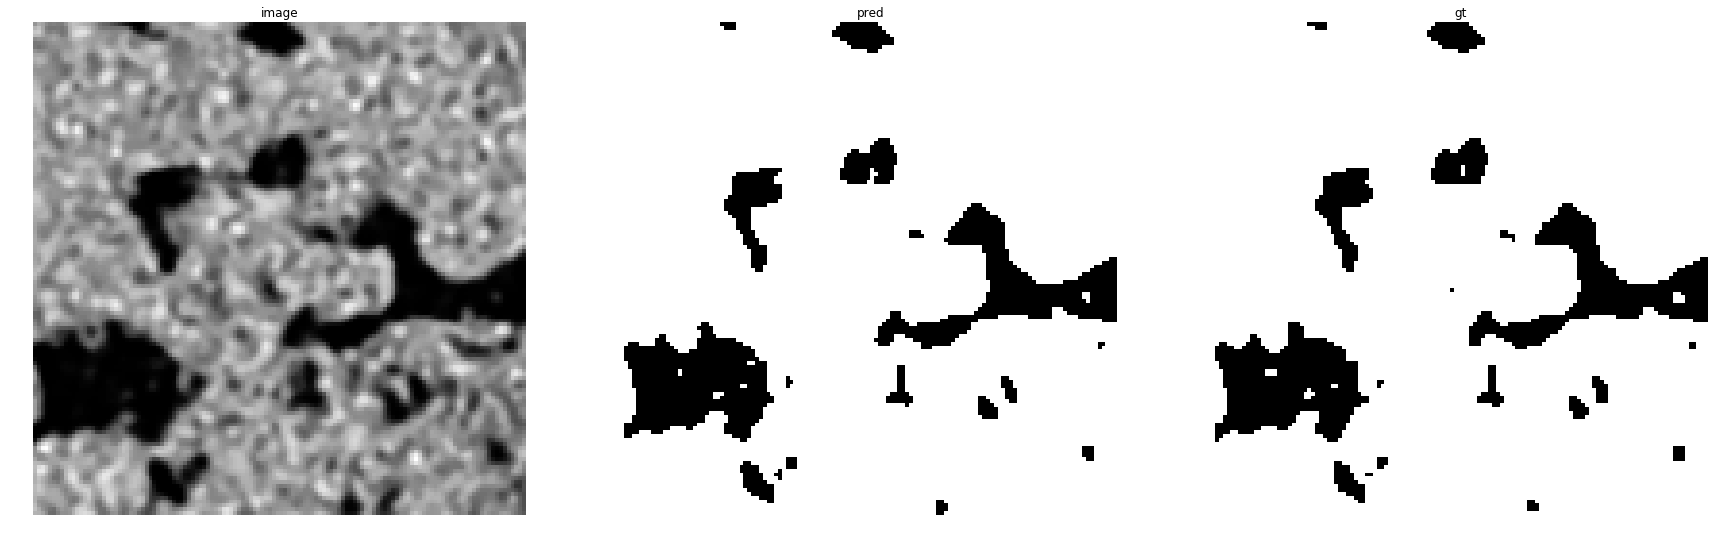

accuracy    : 0.994140625
precision   : 0.9967210827403377
recall      : 0.99658203125
f1          : 0.9966515521450994
pr_auc      : 0.999971240214997
iou         : 0.9933254536605715


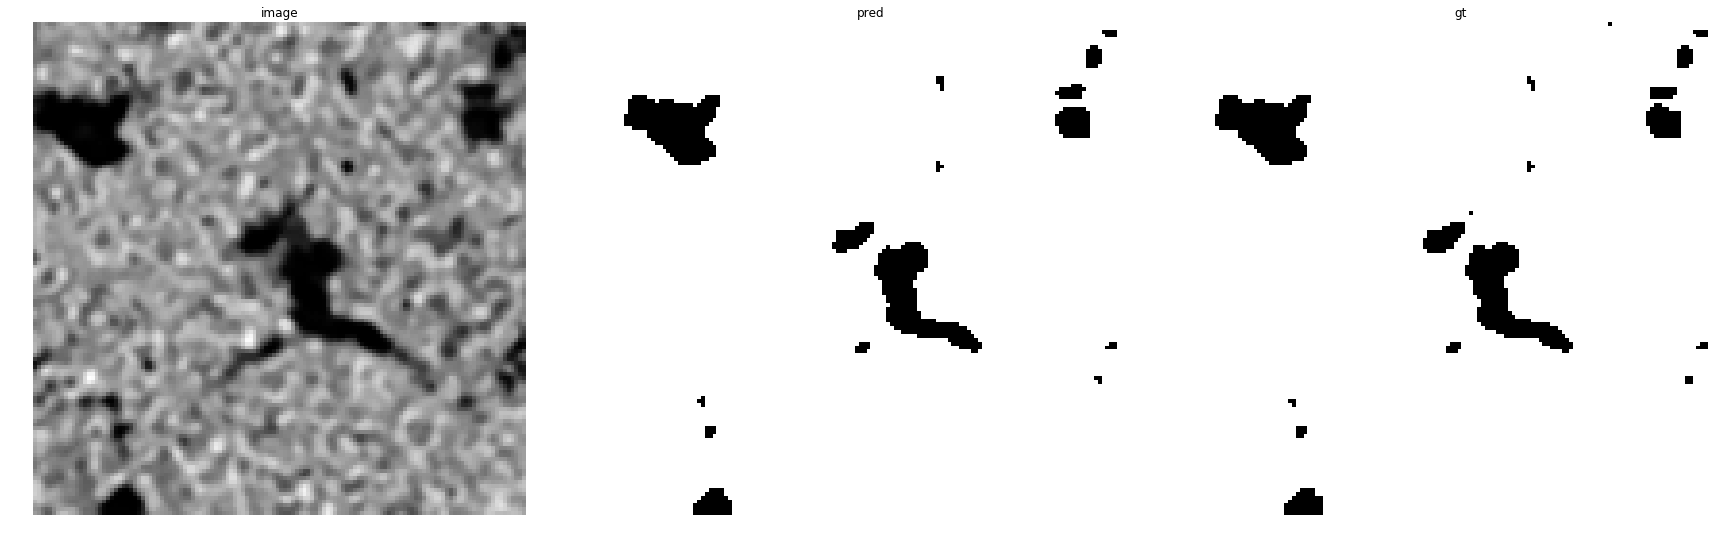

accuracy    : 0.997802734375
precision   : 0.9986473429951691
recall      : 0.999033442876474
f1          : 0.9988403556242752
pr_auc      : 0.9999949619912587
iou         : 0.9976833976833976


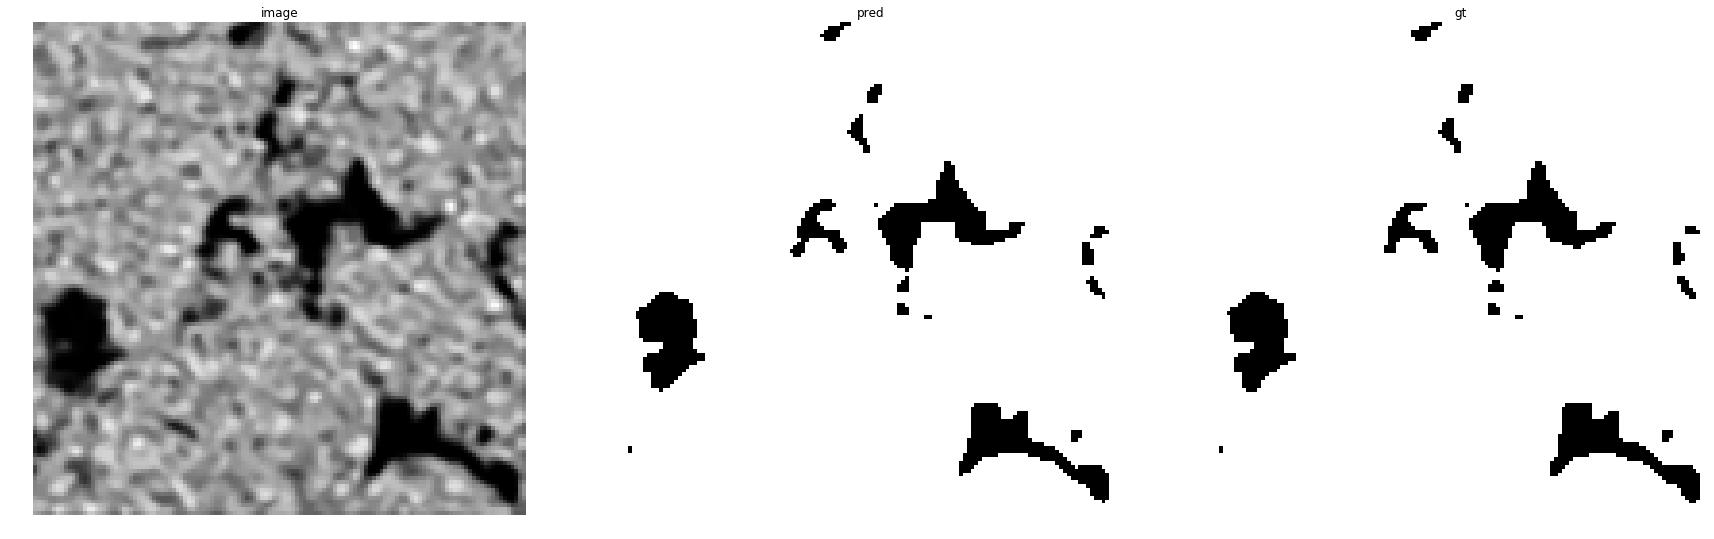

accuracy    : 0.9969482421875
precision   : 0.9980942367089439
recall      : 0.9986192386087185
f1          : 0.9983566686386643
pr_auc      : 0.9999927825021191
iou         : 0.9967187294920593


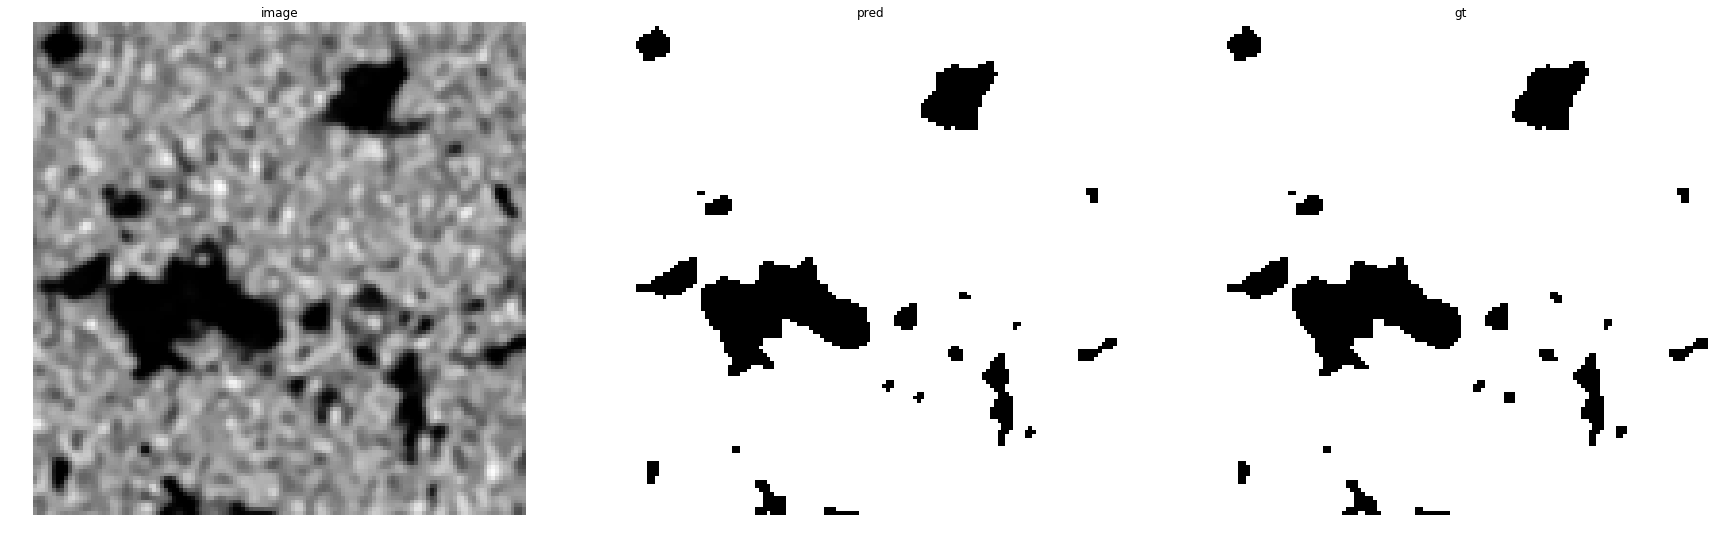

accuracy    : 0.99664306640625
precision   : 0.9978639610172886
recall      : 0.9984637990916377
f1          : 0.9981637899375688
pr_auc      : 0.9999896281704268
iou         : 0.9963343108504399


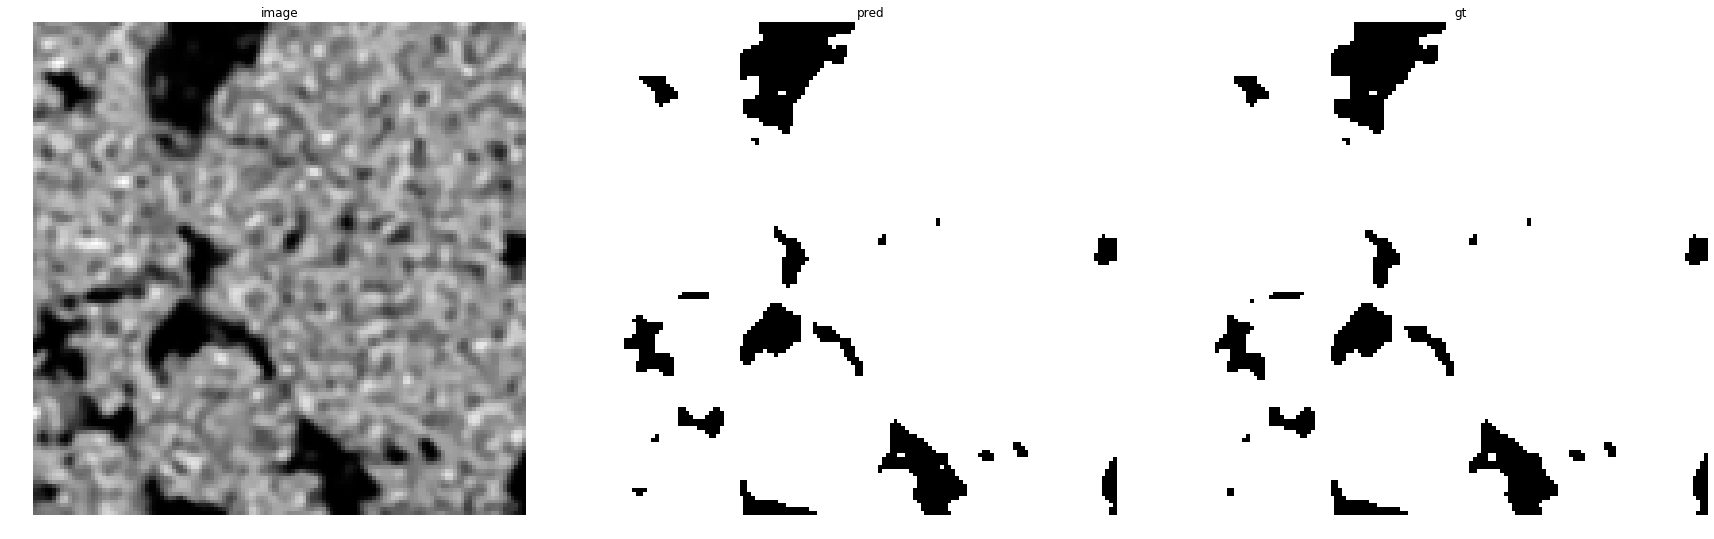

accuracy    : 0.9962158203125
precision   : 0.9977281838834692
recall      : 0.9981283422459893
f1          : 0.9979282229499432
pr_auc      : 0.9999875396404588
iou         : 0.9958650126717353


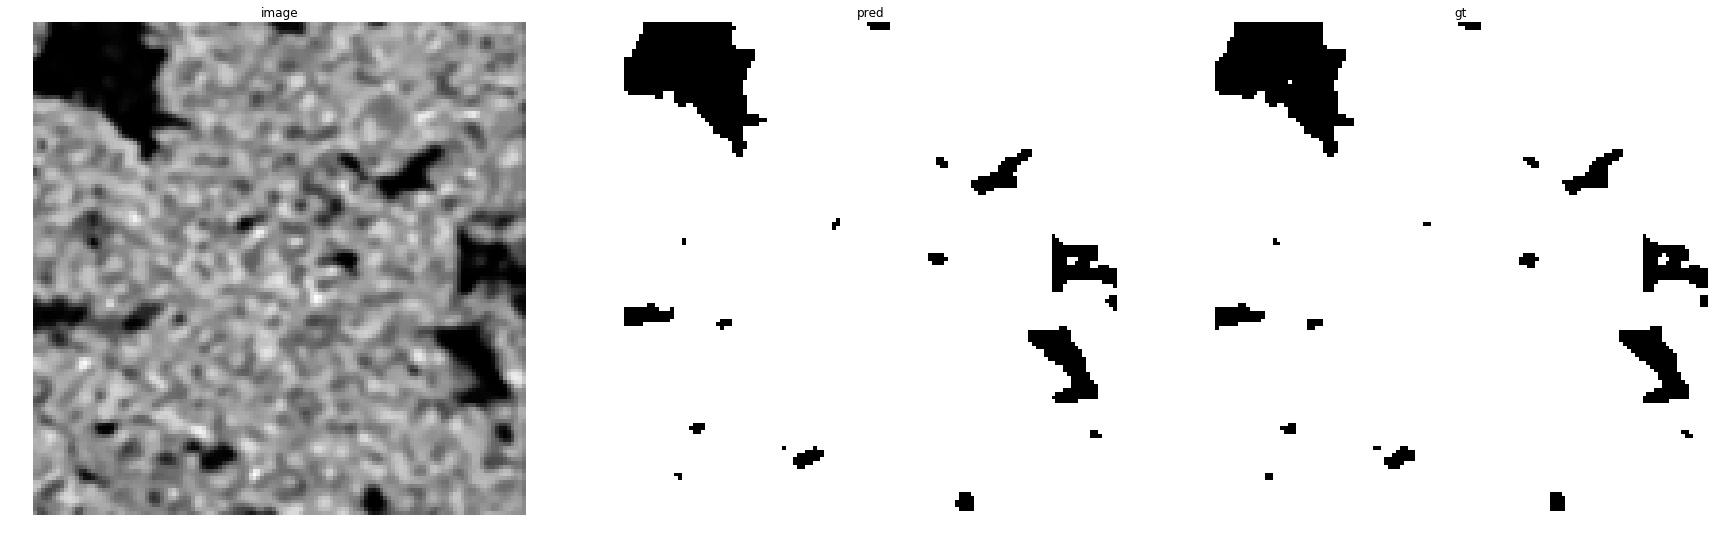

accuracy    : 0.9964599609375
precision   : 0.997816738339398
recall      : 0.9983451380154895
f1          : 0.9980808682416782
pr_auc      : 0.9999906732648597
iou         : 0.9961690885072655


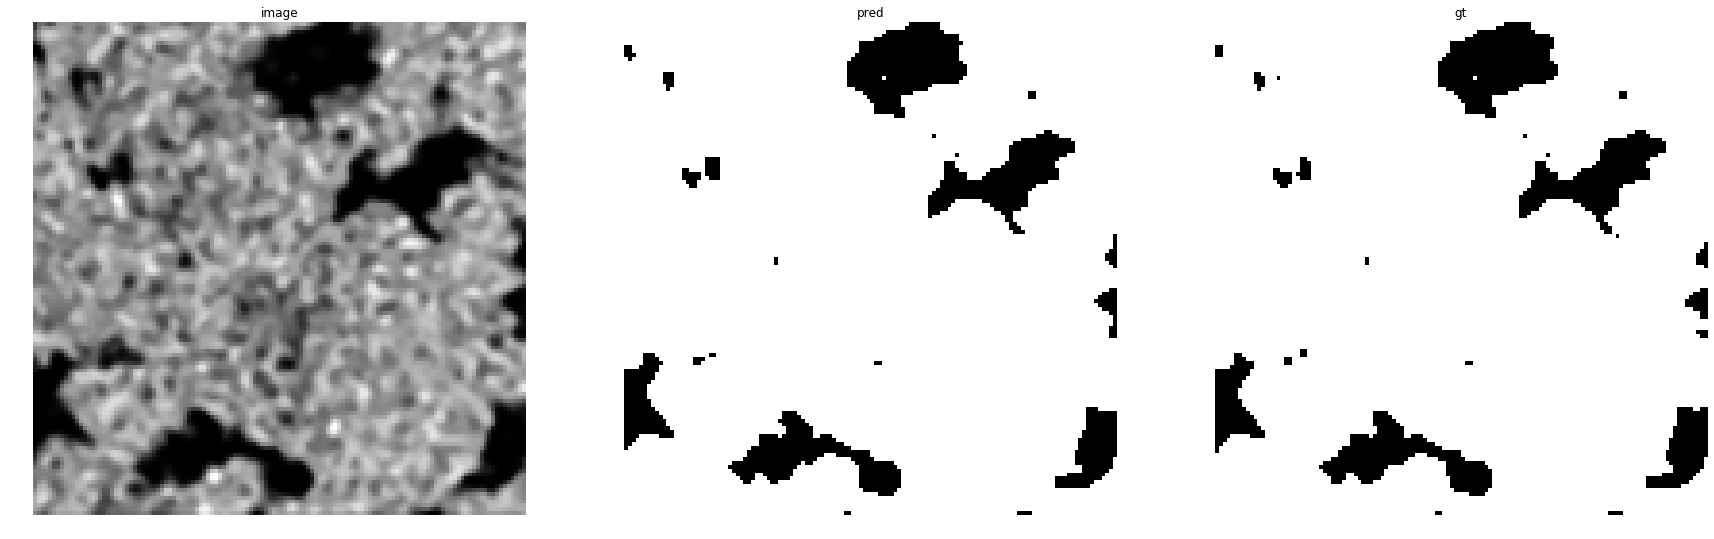

accuracy    : 0.996337890625
precision   : 0.9977432811324626
recall      : 0.9981528357392078
f1          : 0.9979480164158687
pr_auc      : 0.9999878228119019
iou         : 0.9959044368600682


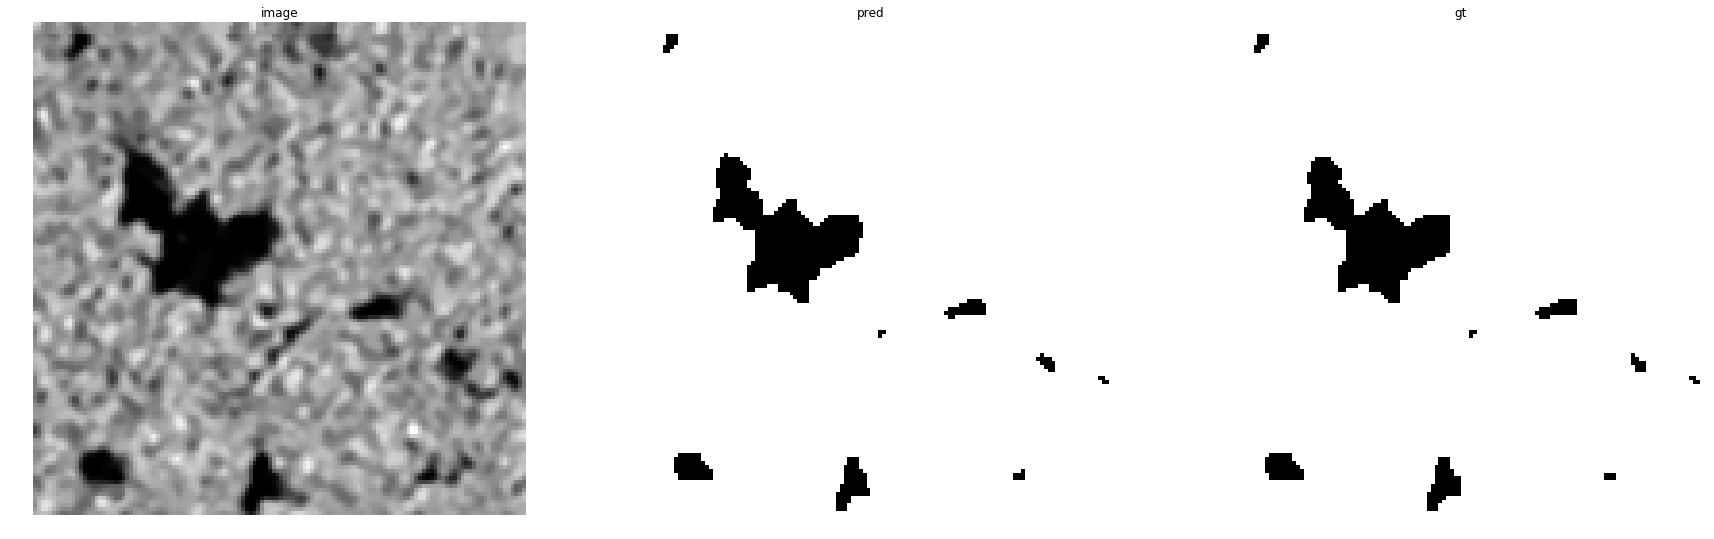

accuracy    : 0.99853515625
precision   : 0.9994205511202678
recall      : 0.9990346247908354
f1          : 0.9992275506919859
pr_auc      : 0.9999978848438666
iou         : 0.9984562938187431


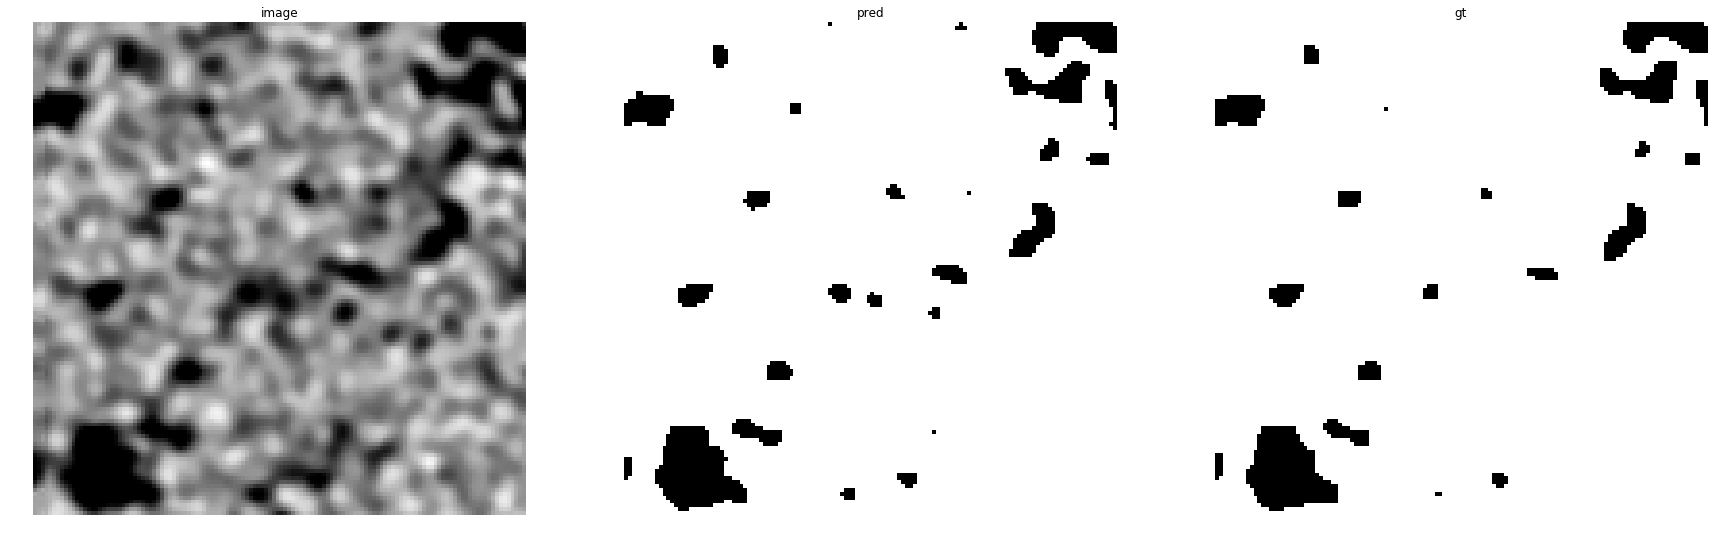

accuracy    : 0.99029541015625
precision   : 0.998224618621778
recall      : 0.9913798733102592
f1          : 0.9947904721339406
pr_auc      : 0.9999438607751866
iou         : 0.9896349413298566


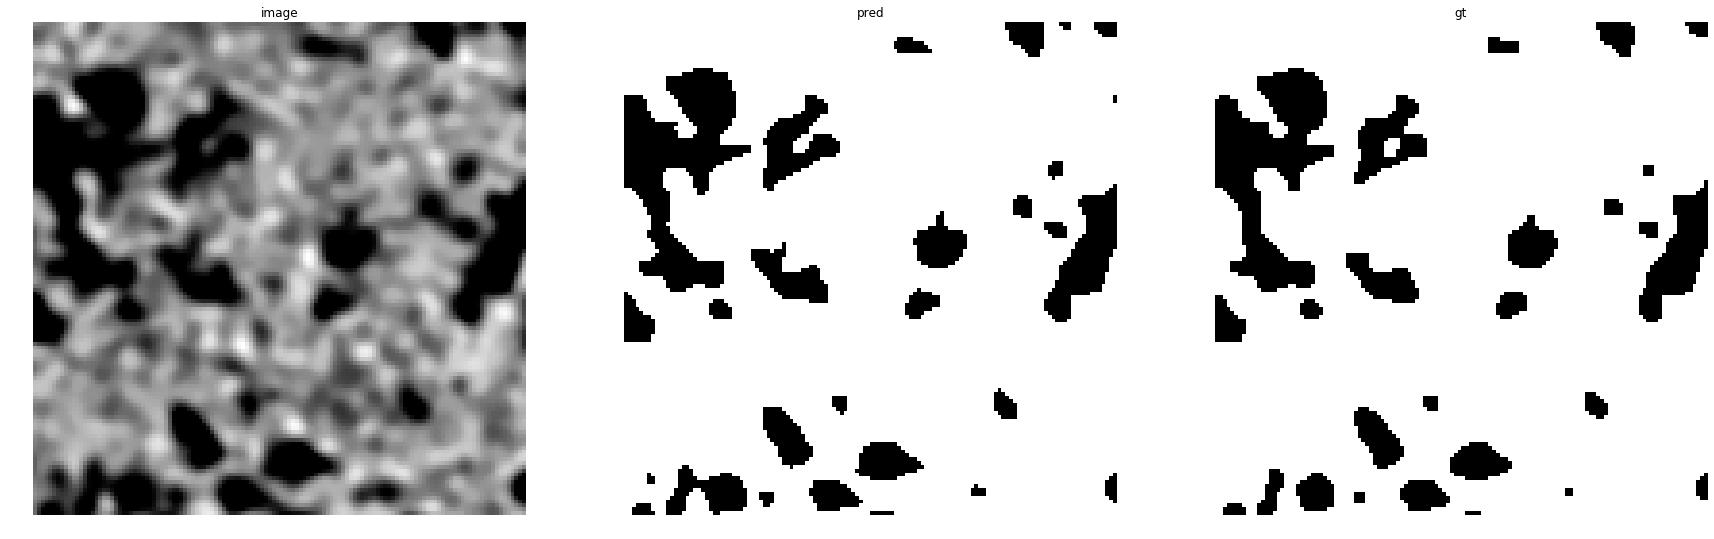

accuracy    : 0.98583984375
precision   : 0.9973006493032757
recall      : 0.985935809592499
f1          : 0.9915856666183084
pr_auc      : 0.9998392572961886
iou         : 0.983311753704503


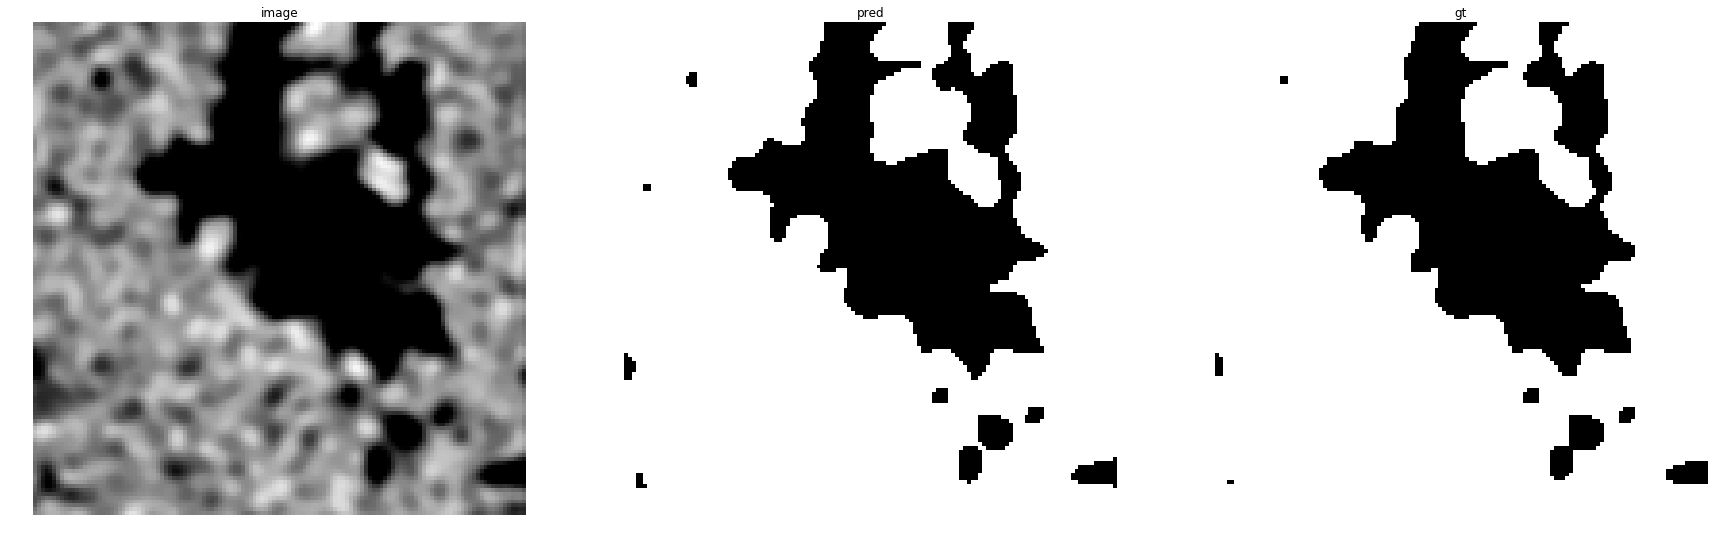

accuracy    : 0.99383544921875
precision   : 0.9977676791836084
recall      : 0.994200826183667
f1          : 0.9959810592495324
pr_auc      : 0.9999432435549458
iou         : 0.9919942929613189


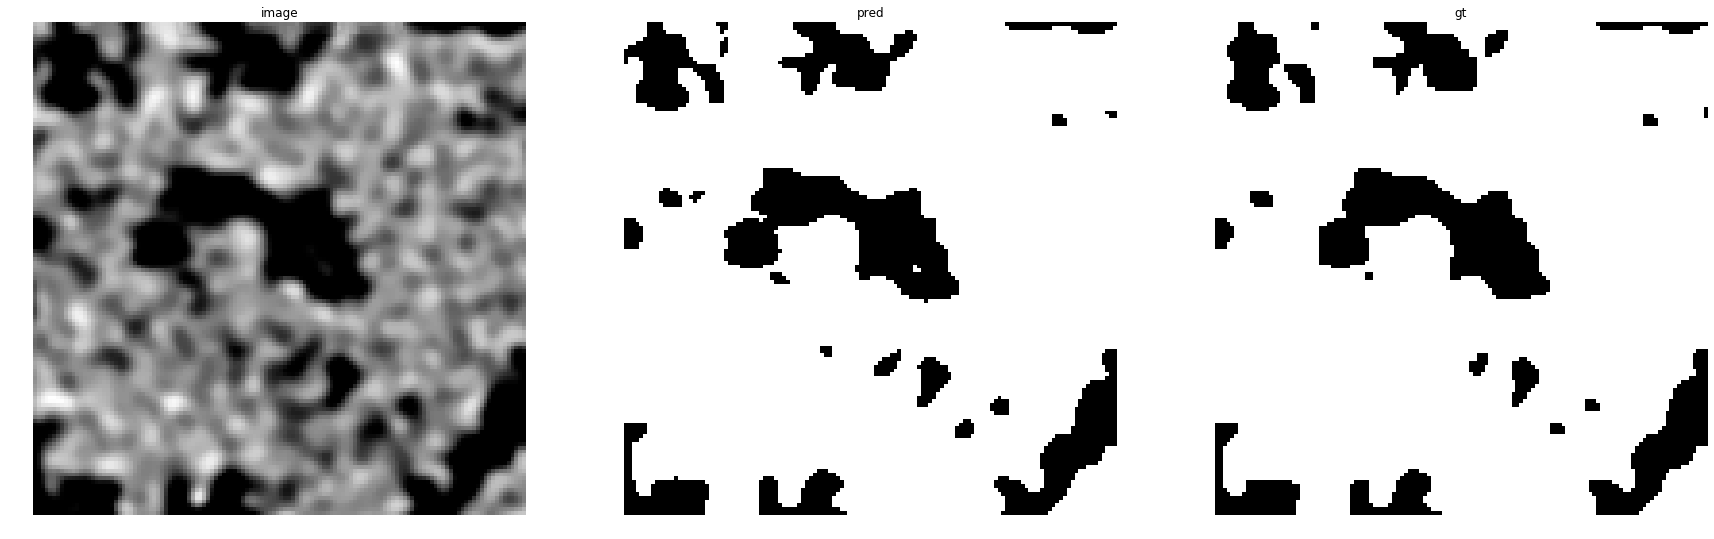

accuracy    : 0.986572265625
precision   : 0.9974181174387725
recall      : 0.9865022617831607
f1          : 0.9919301591959504
pr_auc      : 0.9998482149088486
iou         : 0.9839895204133615


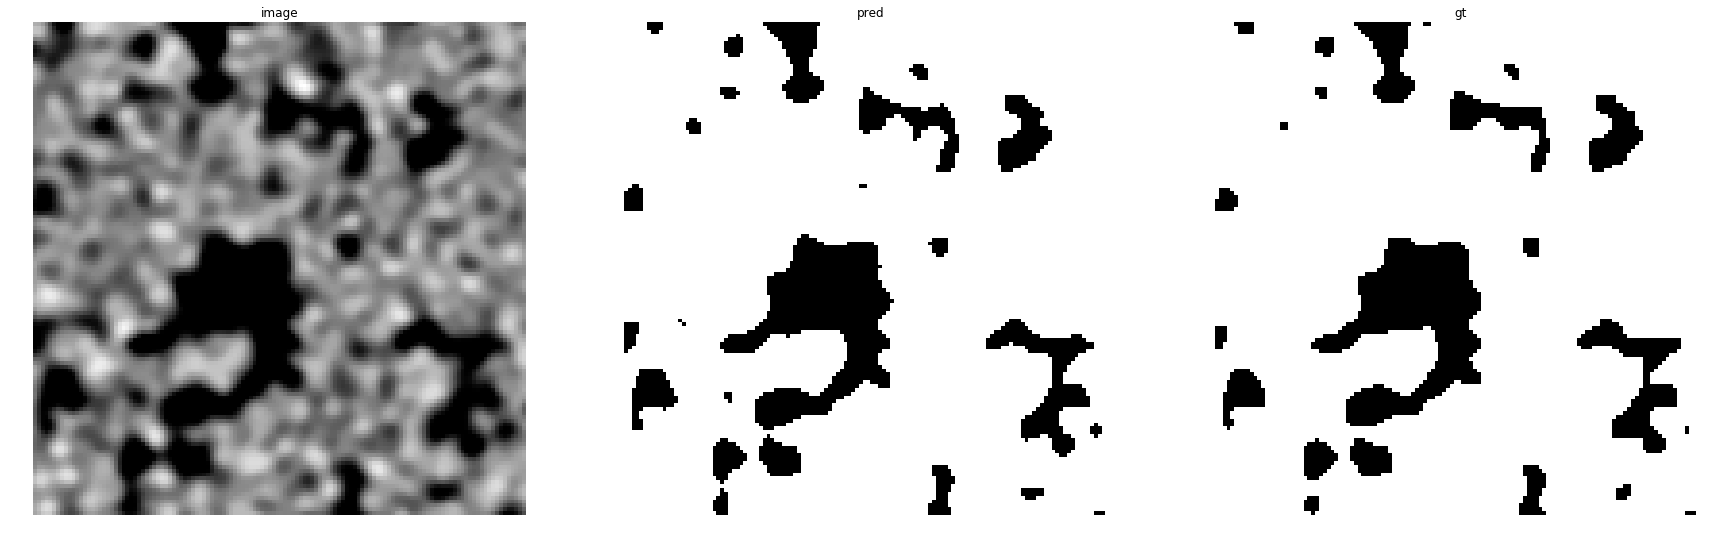

accuracy    : 0.98870849609375
precision   : 0.9960556511761331
recall      : 0.9907268706755118
f1          : 0.9933841147230269
pr_auc      : 0.9998874305563592
iou         : 0.9868551939747051


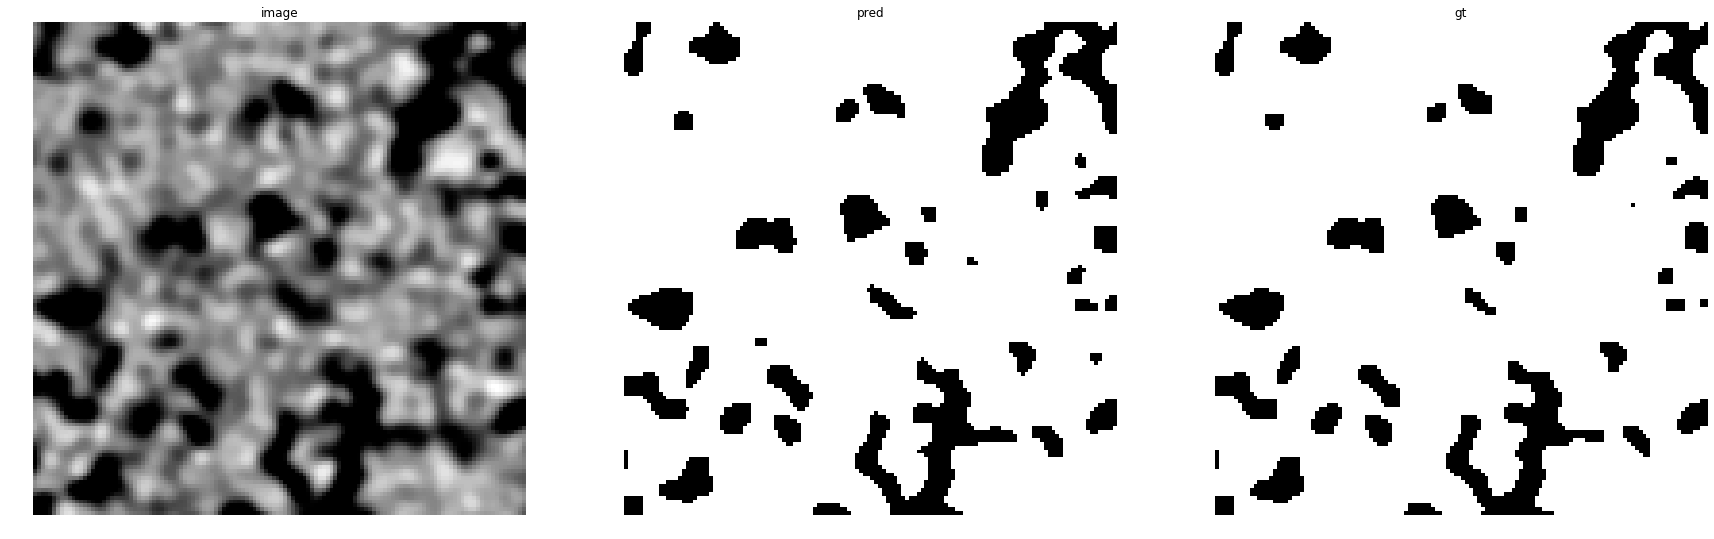

accuracy    : 0.98565673828125
precision   : 0.9981851179673321
recall      : 0.9849570200573066
f1          : 0.9915269515053181
pr_auc      : 0.9998177871892185
iou         : 0.9831962817304255


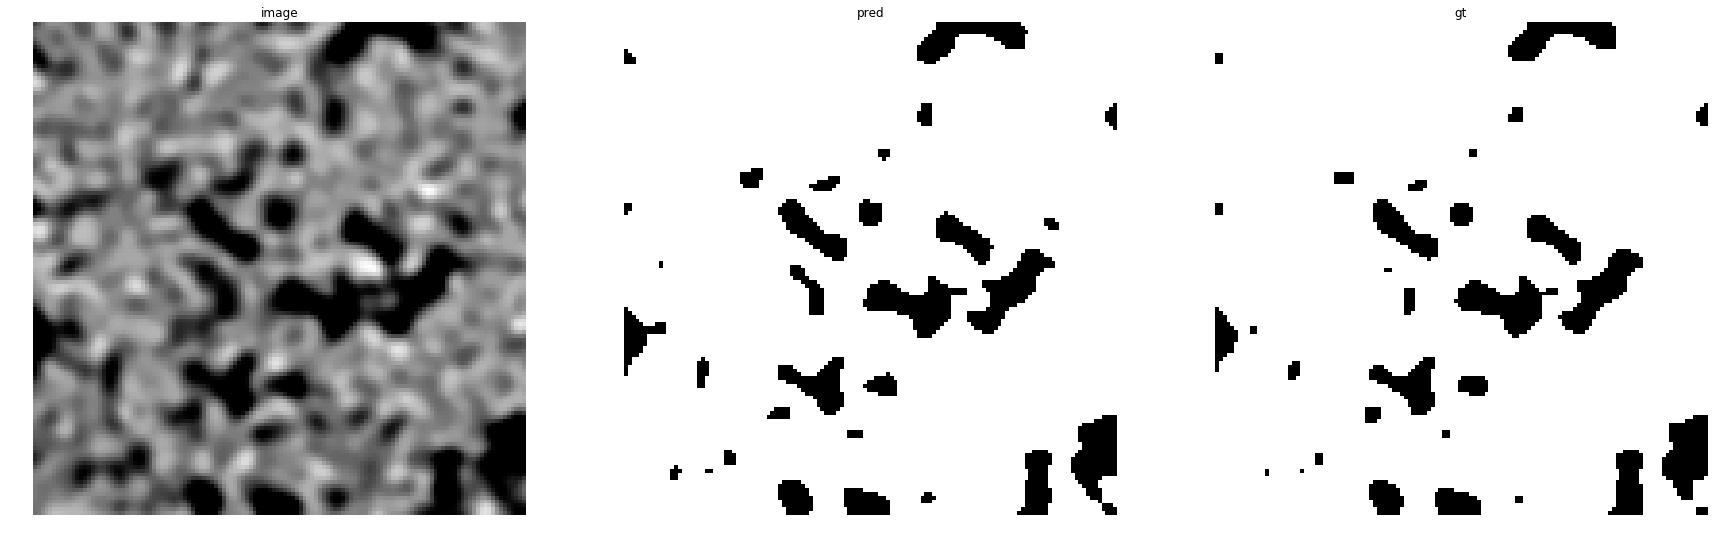

accuracy    : 0.987548828125
precision   : 0.9977472865041982
recall      : 0.9884357881923311
f1          : 0.9930697105584998
pr_auc      : 0.9998800339779828
iou         : 0.9862348178137652


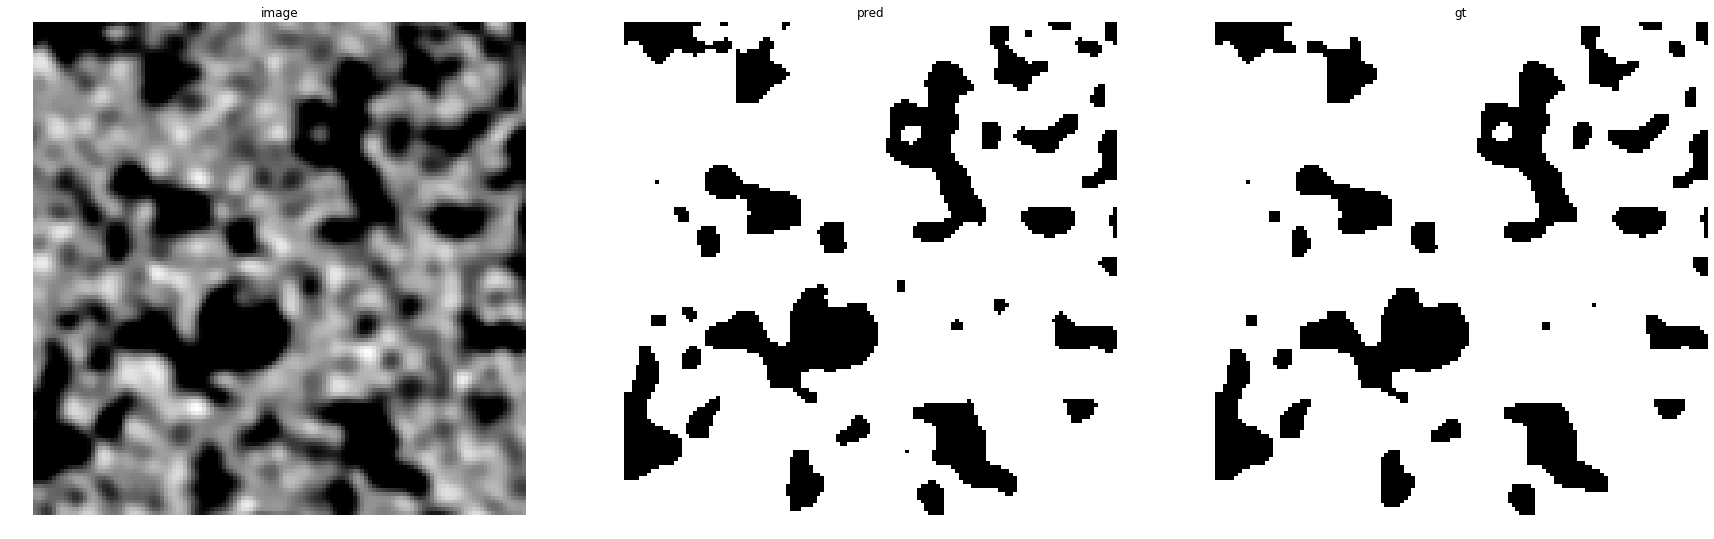

accuracy    : 0.98443603515625
precision   : 0.9967682363804248
recall      : 0.9838231943495102
f1          : 0.9902534113060429
pr_auc      : 0.9997609861039355
iou         : 0.9806949806949807


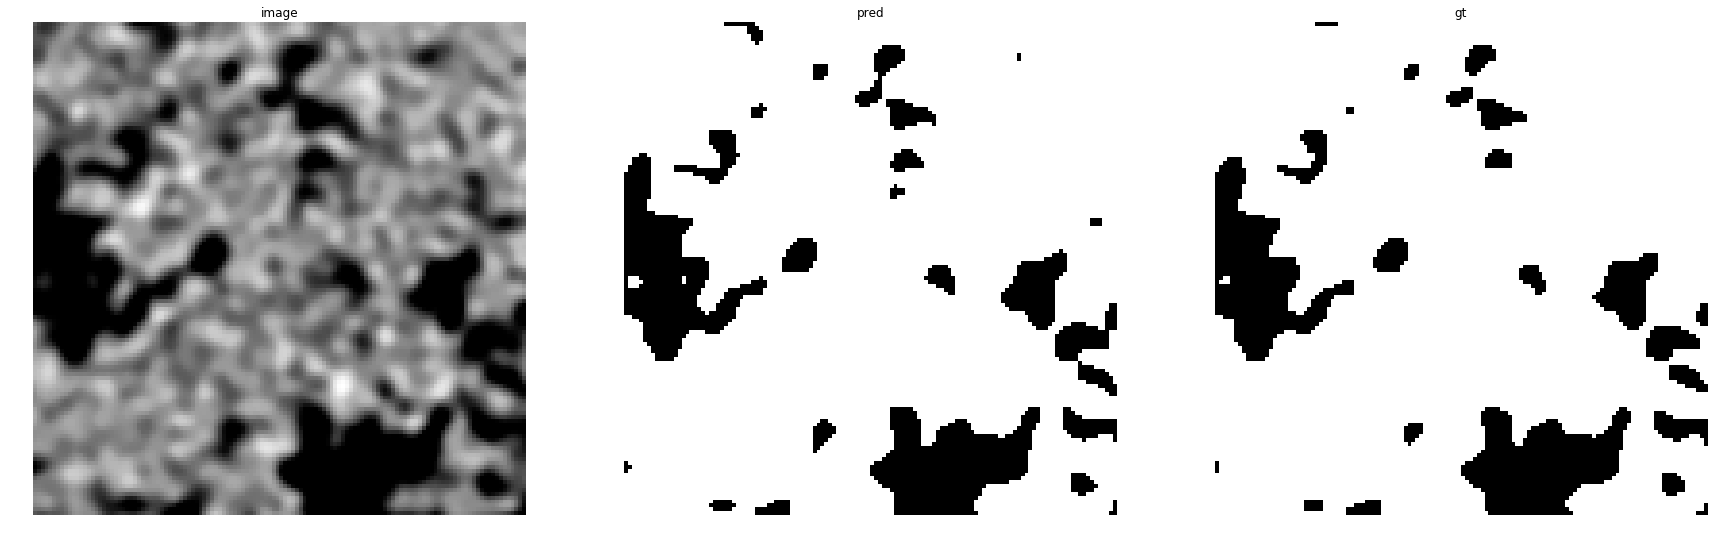

accuracy    : 0.9884033203125
precision   : 0.9973937595019184
recall      : 0.9889455171918743
f1          : 0.9931516724336793
pr_auc      : 0.9998750793636058
iou         : 0.986396506049975


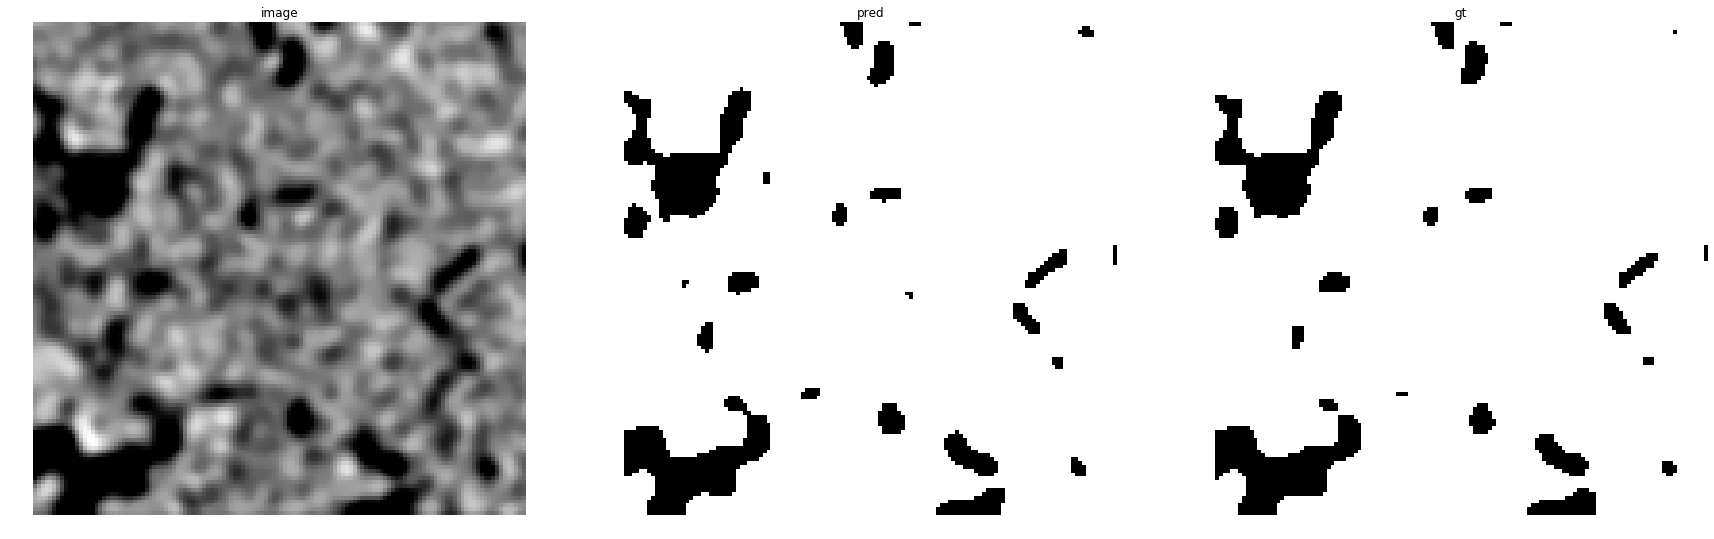

accuracy    : 0.9918212890625
precision   : 0.9979776189834165
recall      : 0.9930238797960826
f1          : 0.9954945867796382
pr_auc      : 0.9999516932005147
iou         : 0.9910295889677333


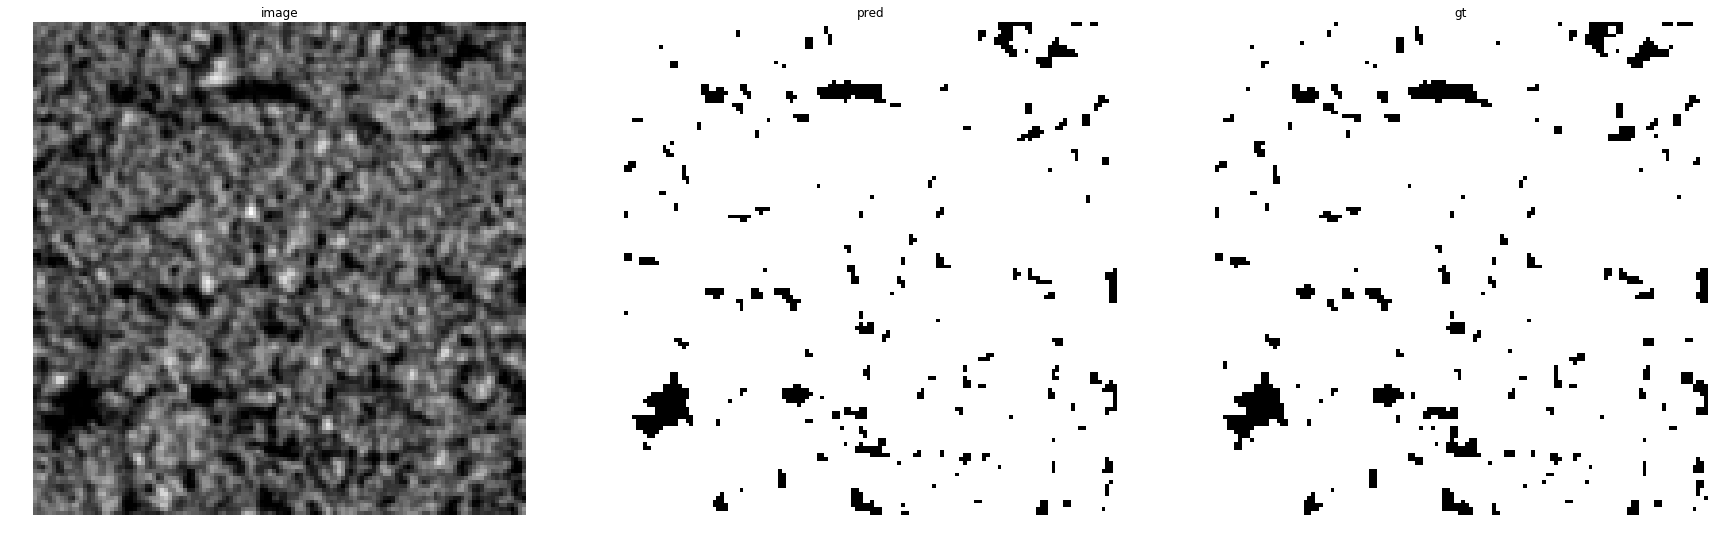

accuracy    : 0.98876953125
precision   : 0.9888278979657733
recall      : 0.9992821249102656
f1          : 0.9940275253180991
pr_auc      : 0.9999098813275374
iou         : 0.9881259679917398


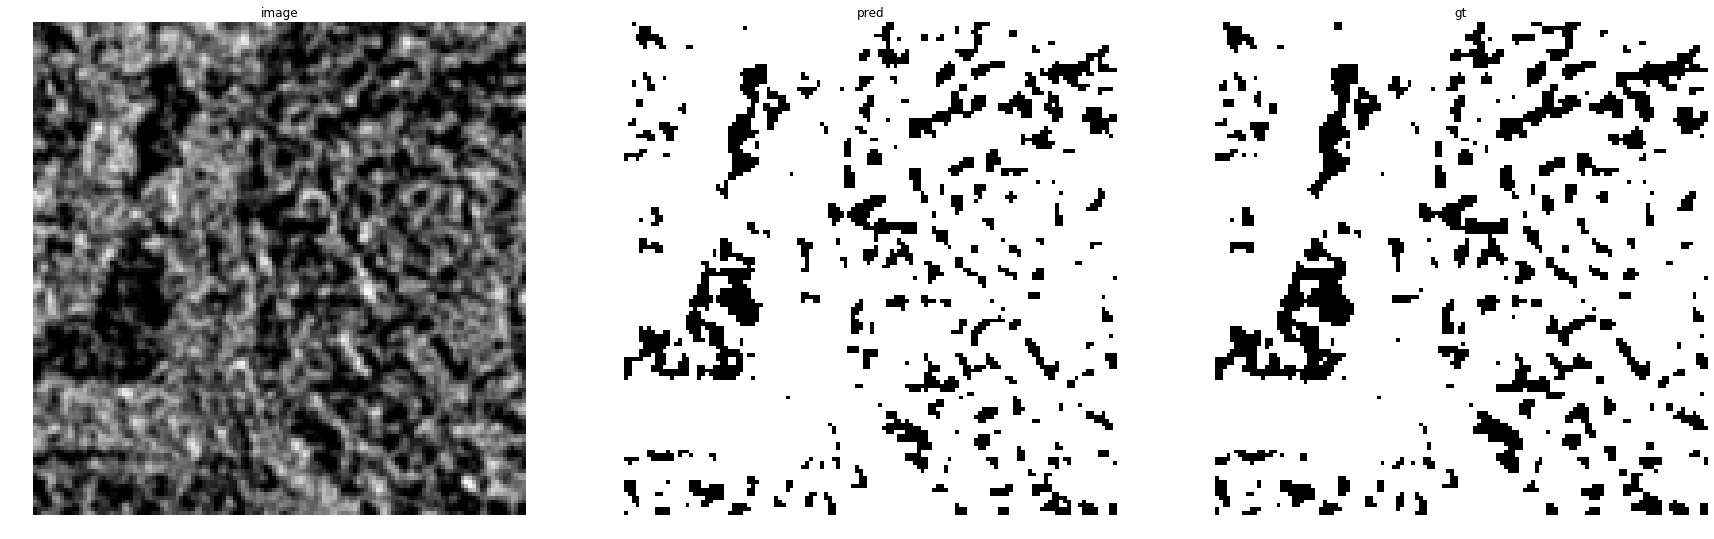

accuracy    : 0.9654541015625
precision   : 0.9631875579653278
recall      : 0.996310235406981
f1          : 0.9794689495066743
pr_auc      : 0.9990263741172547
iou         : 0.9597639866353878


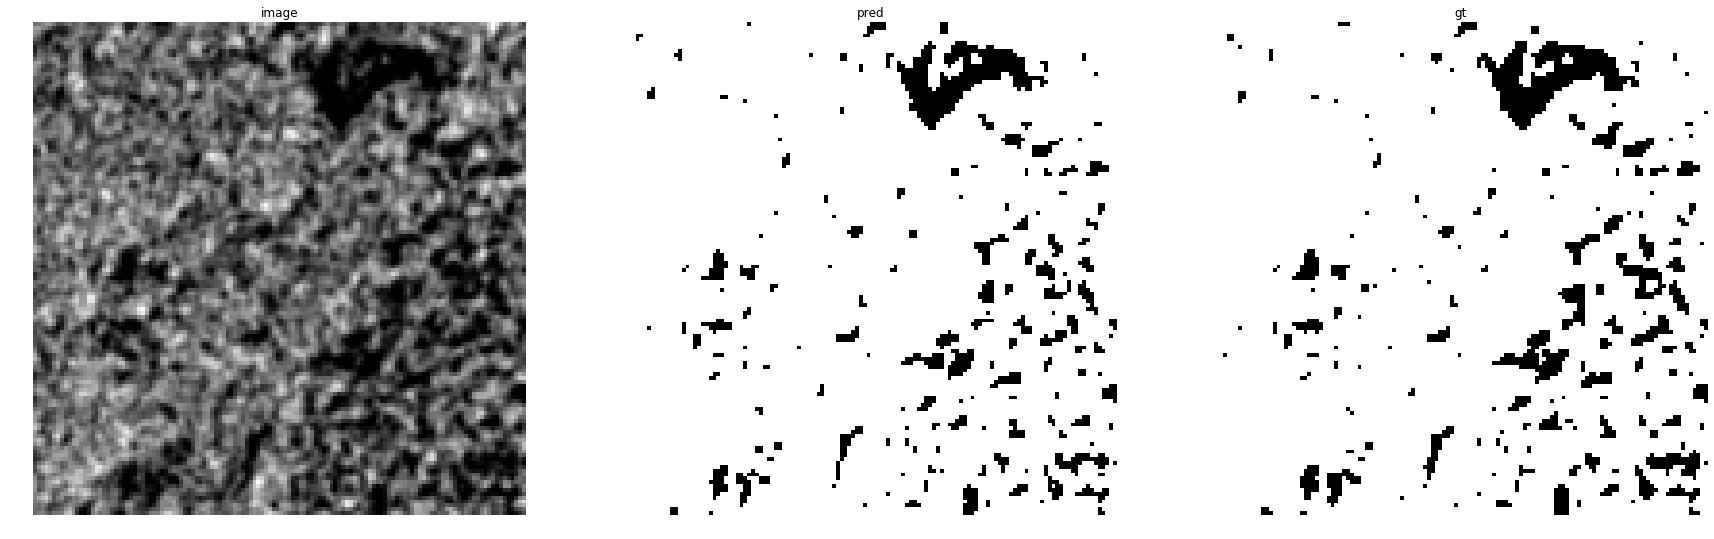

accuracy    : 0.98046875
precision   : 0.9807794626230381
recall      : 0.9979022871836514
f1          : 0.9892667874153082
pr_auc      : 0.9997108056269453
iou         : 0.9787615318245172


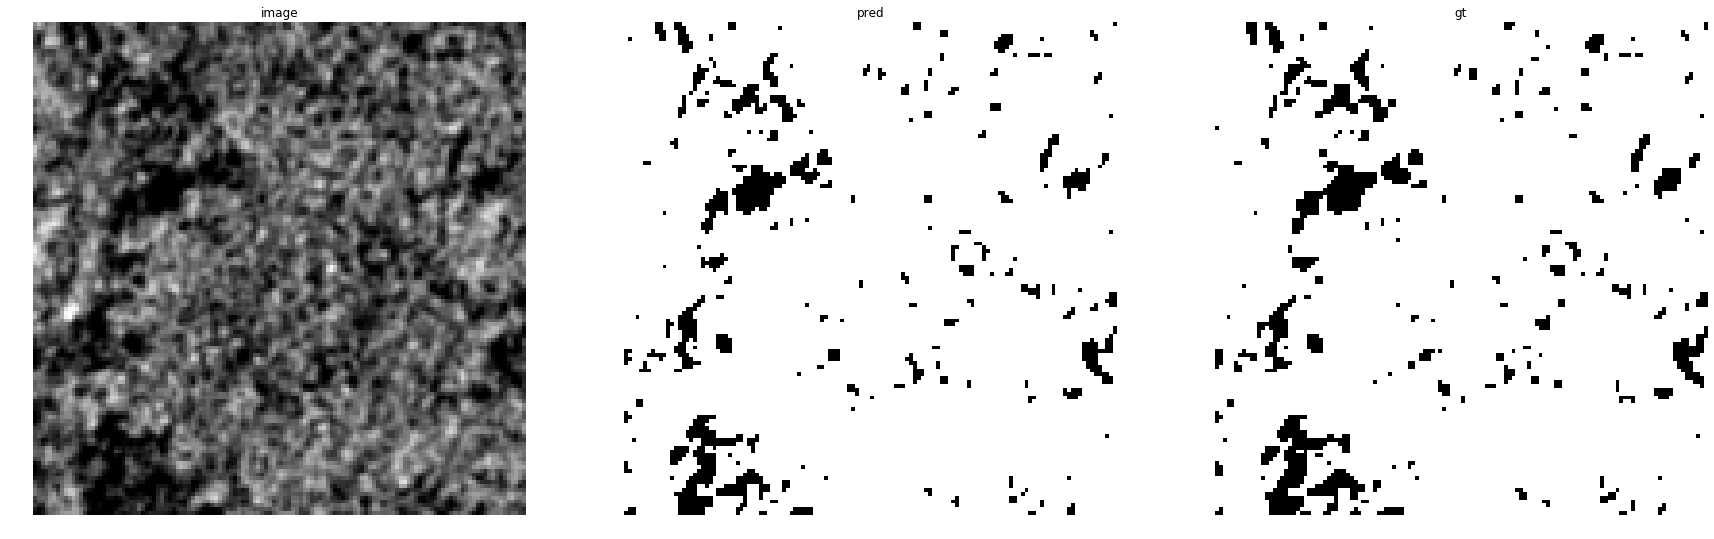

accuracy    : 0.98480224609375
precision   : 0.9857641863837079
recall      : 0.9977985323549032
f1          : 0.9917448529655538
pr_auc      : 0.9998225616508297
iou         : 0.9836248849138498


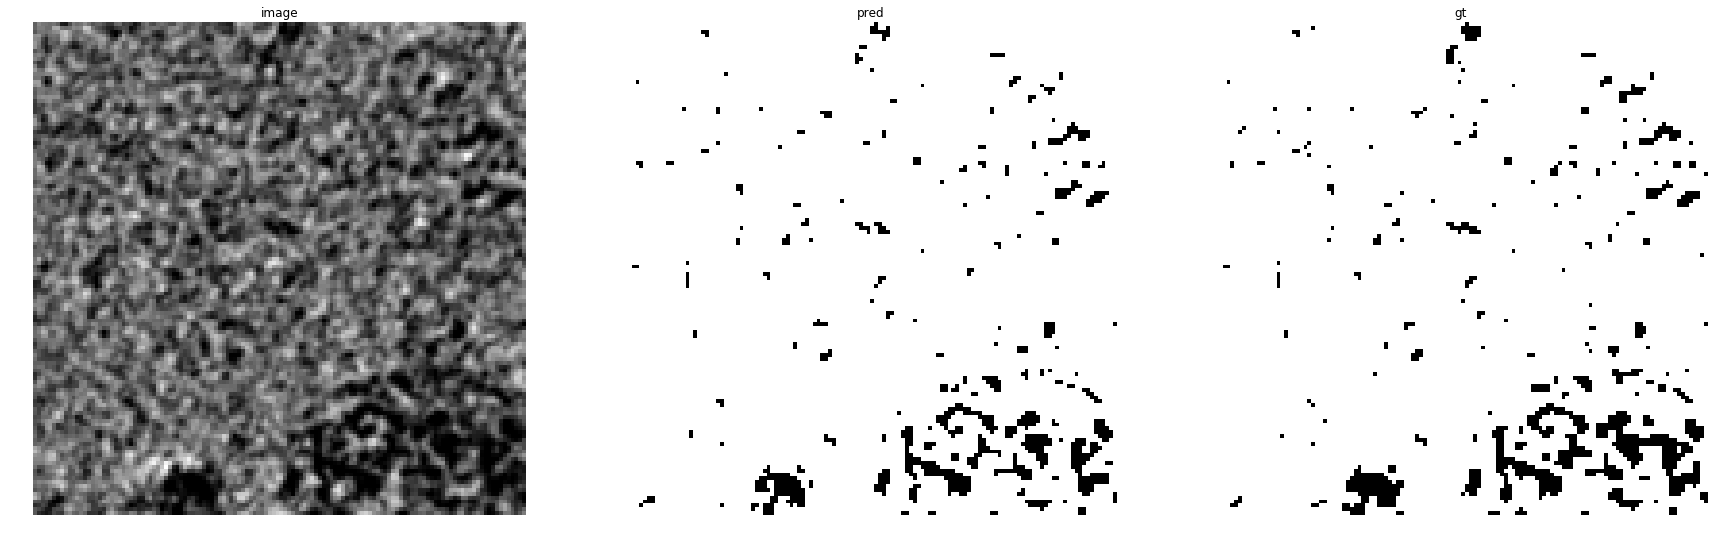

accuracy    : 0.98553466796875
precision   : 0.9860423232778028
recall      : 0.9986970684039088
f1          : 0.9923293523643072
pr_auc      : 0.9998052537645379
iou         : 0.9847754866062826


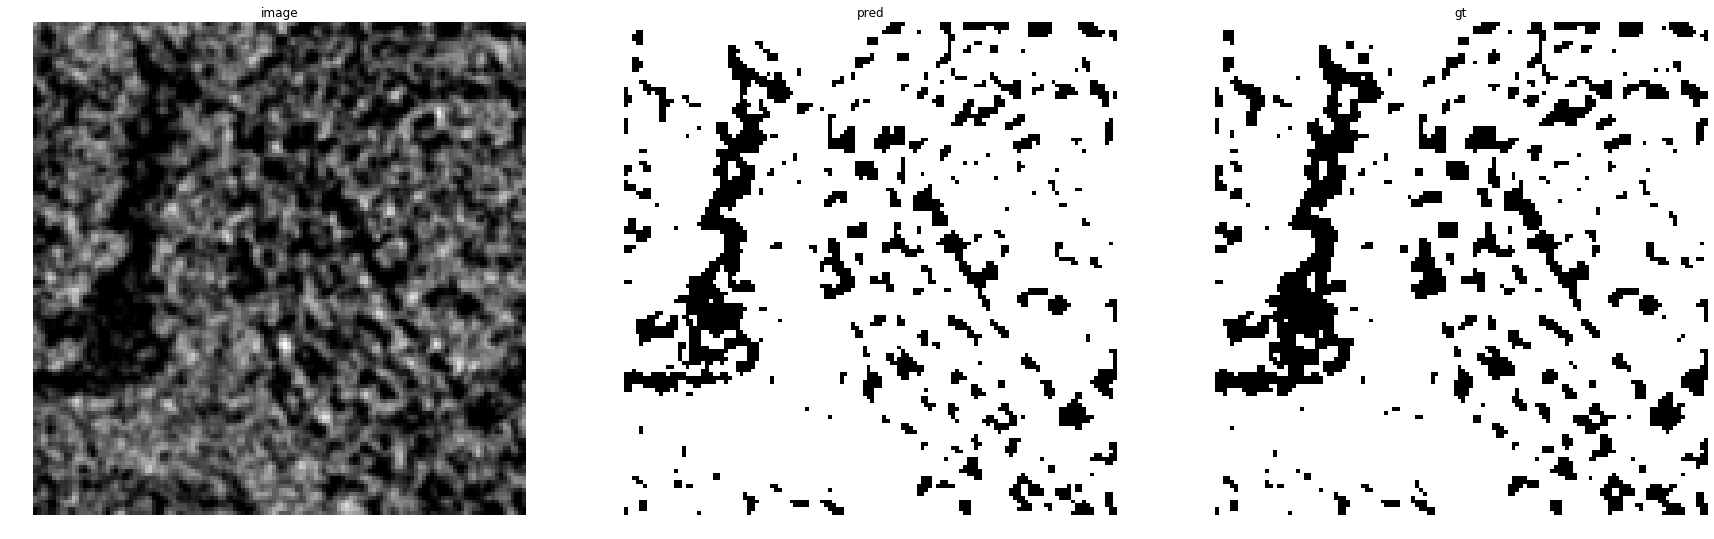

accuracy    : 0.96588134765625
precision   : 0.9615830675558132
recall      : 0.9978187288454307
f1          : 0.9793658410542246
pr_auc      : 0.9991562639042106
iou         : 0.9595660036166366


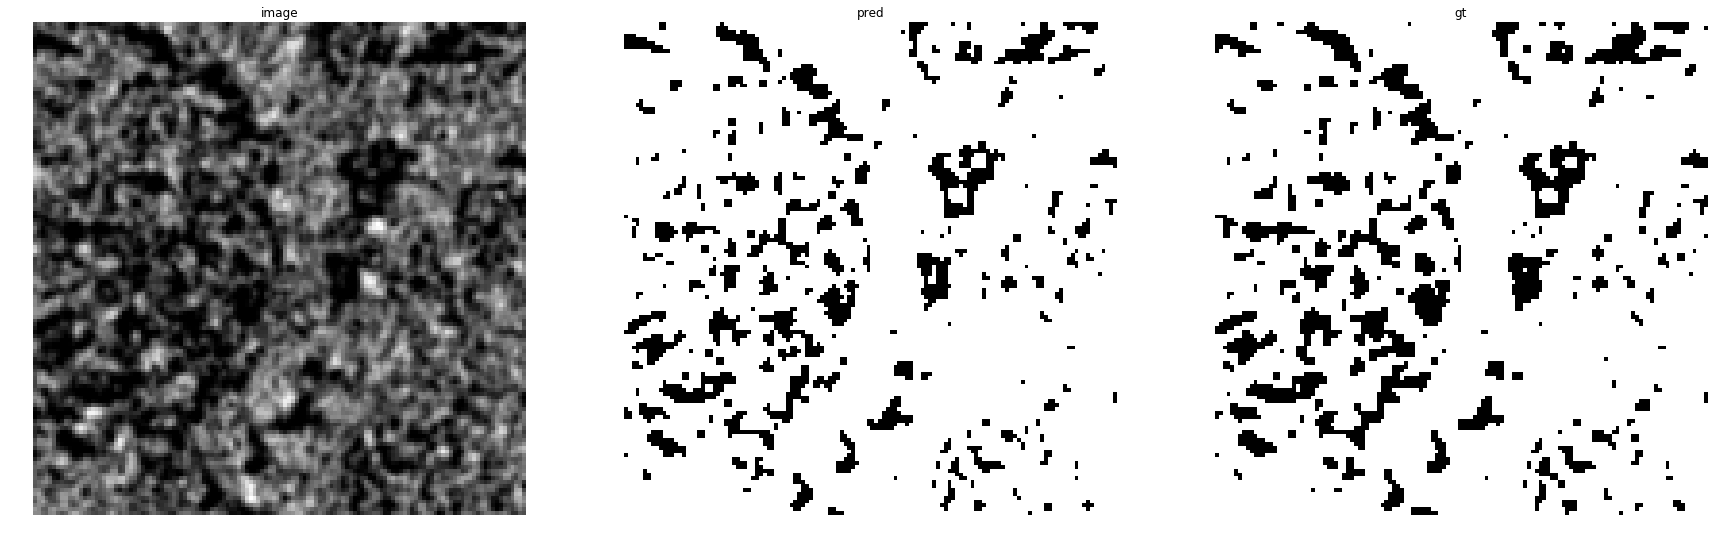

accuracy    : 0.9708251953125
precision   : 0.9686180692372642
recall      : 0.9976808233077258
f1          : 0.9829346661906463
pr_auc      : 0.9994051195196804
iou         : 0.9664420106711598


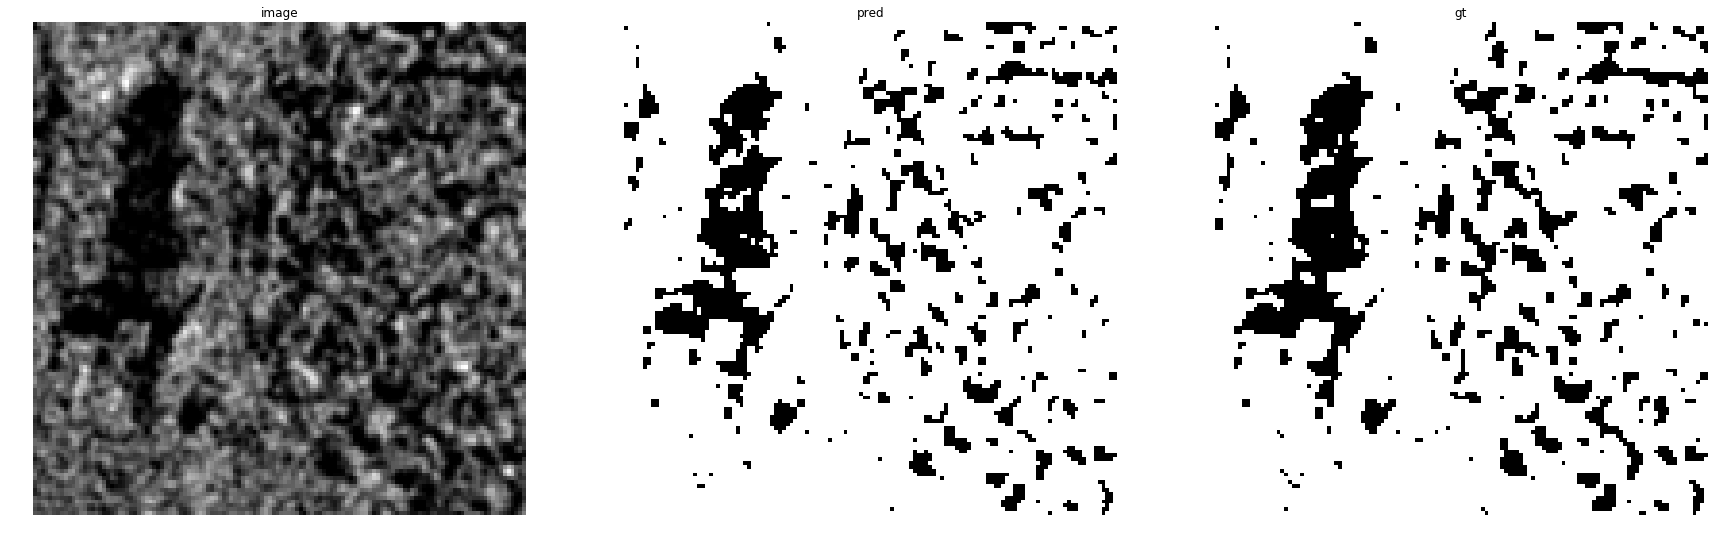

accuracy    : 0.969482421875
precision   : 0.9659246451984728
recall      : 0.9979903237811686
f1          : 0.9816957094743008
pr_auc      : 0.9992646125492599
iou         : 0.9640494679321254


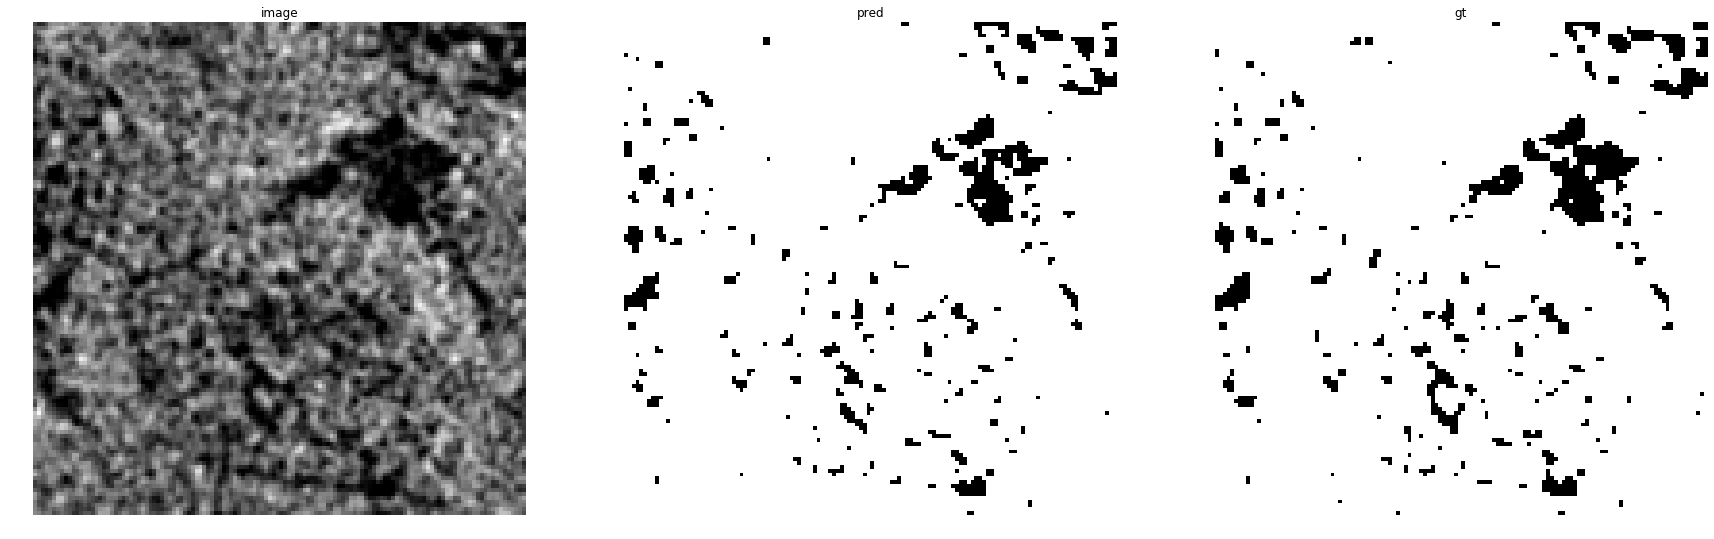

accuracy    : 0.9837646484375
precision   : 0.9844230643366713
recall      : 0.9981418806821952
f1          : 0.9912350072492422
pr_auc      : 0.9997974516117636
iou         : 0.9826223296530999


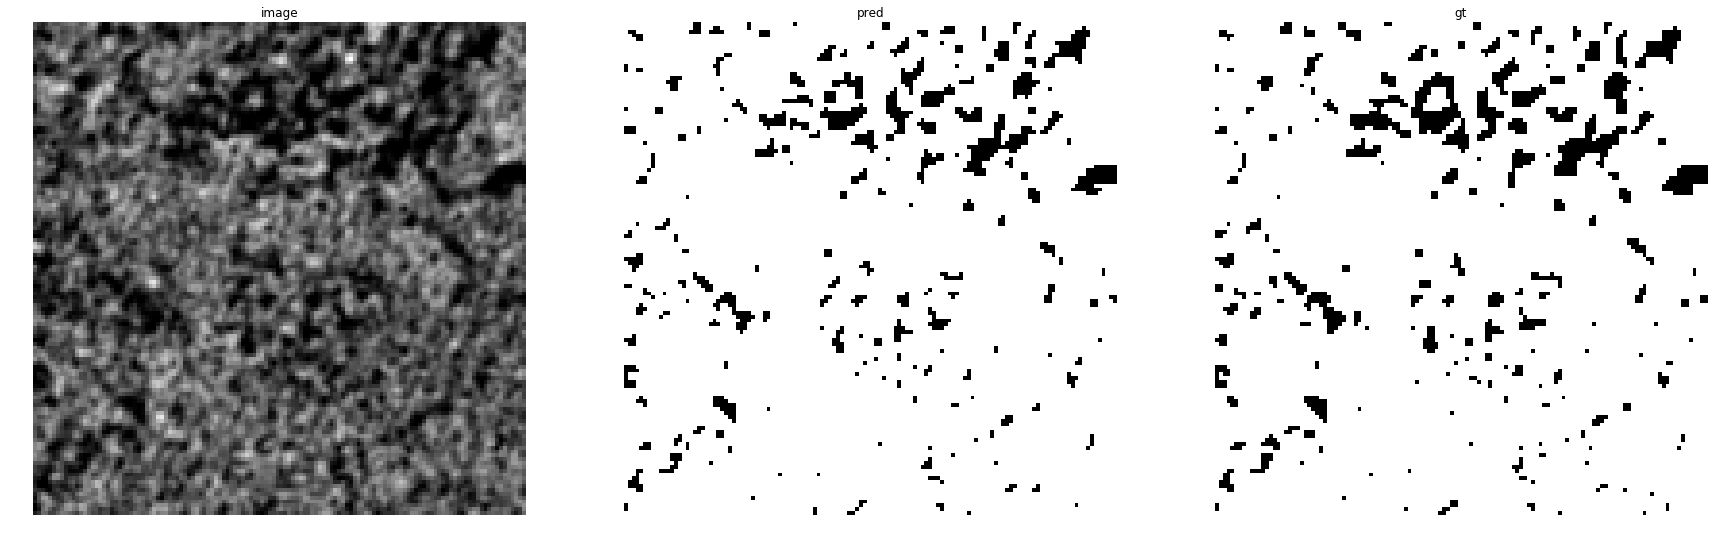

accuracy    : 0.97967529296875
precision   : 0.9798160280590299
recall      : 0.9981124443845221
f1          : 0.9888796126231424
pr_auc      : 0.9997226903085826
iou         : 0.9780038311645419


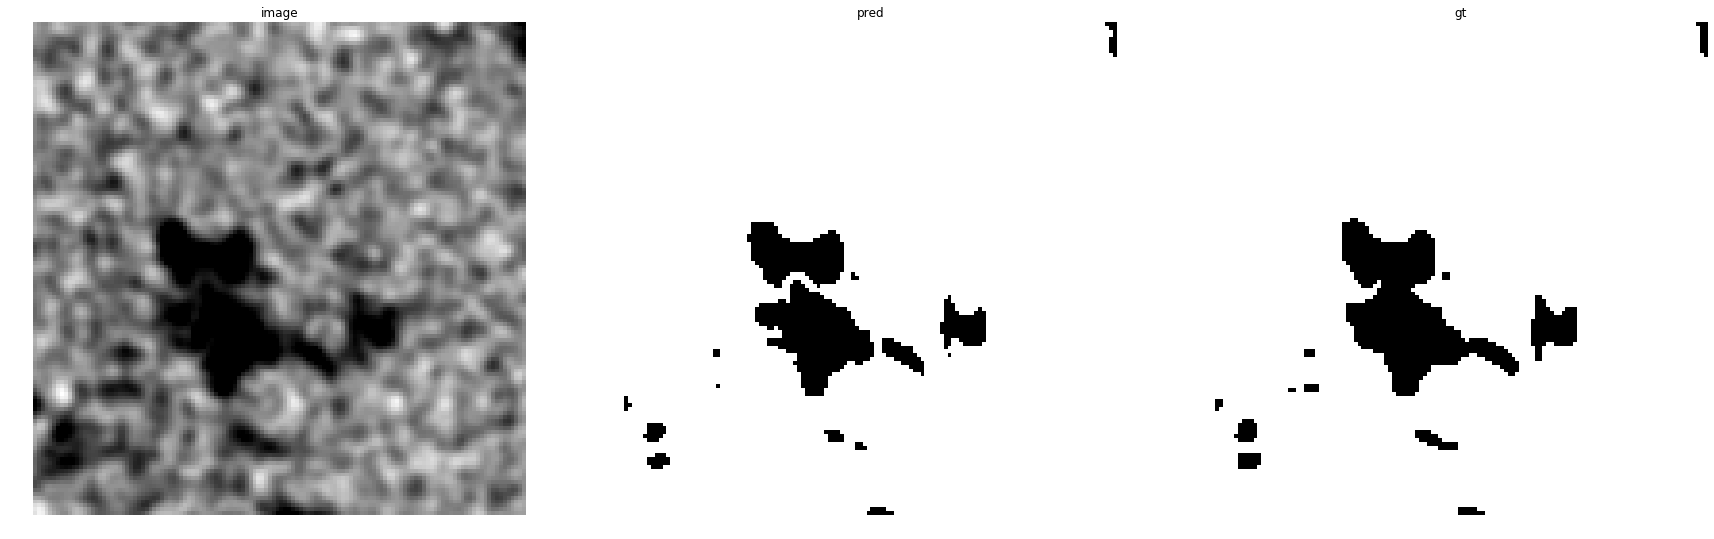

accuracy    : 0.990966796875
precision   : 0.9906973718449128
recall      : 0.9996717867927005
f1          : 0.9951643468600927
pr_auc      : 0.9999745582698114
iou         : 0.9903752357416922


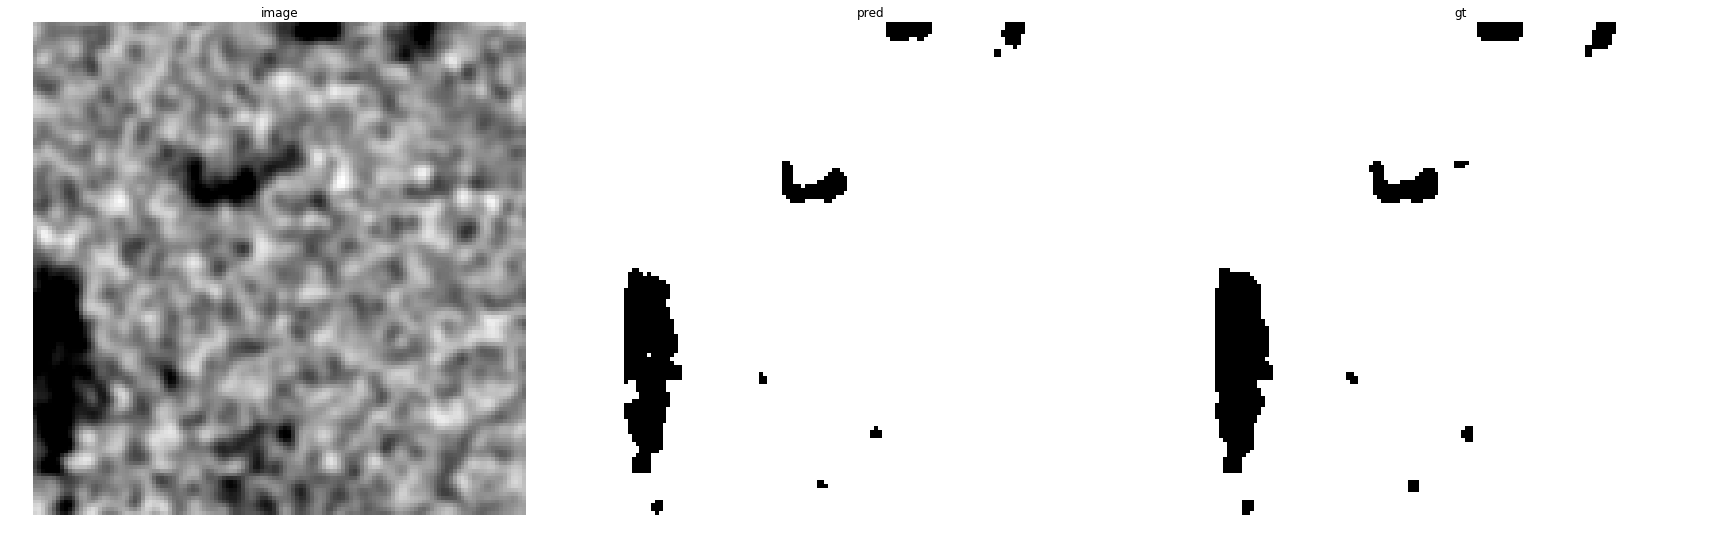

accuracy    : 0.9951171875
precision   : 0.99488
recall      : 1.0
f1          : 0.9974334295797241
pr_auc      : 0.9999861676290487
iou         : 0.99488


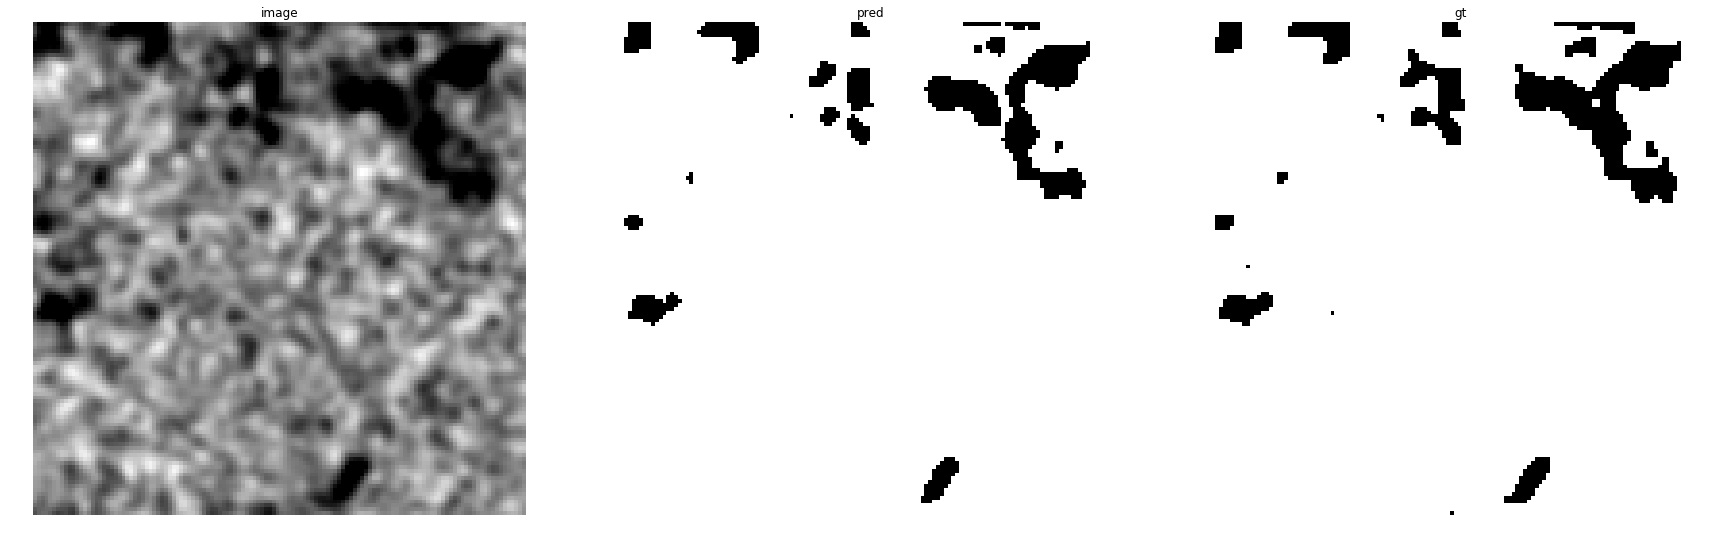

accuracy    : 0.98681640625
precision   : 0.9860477246055548
recall      : 0.9998677773370356
f1          : 0.9929096638655461
pr_auc      : 0.9999491799399832
iou         : 0.9859191655801826


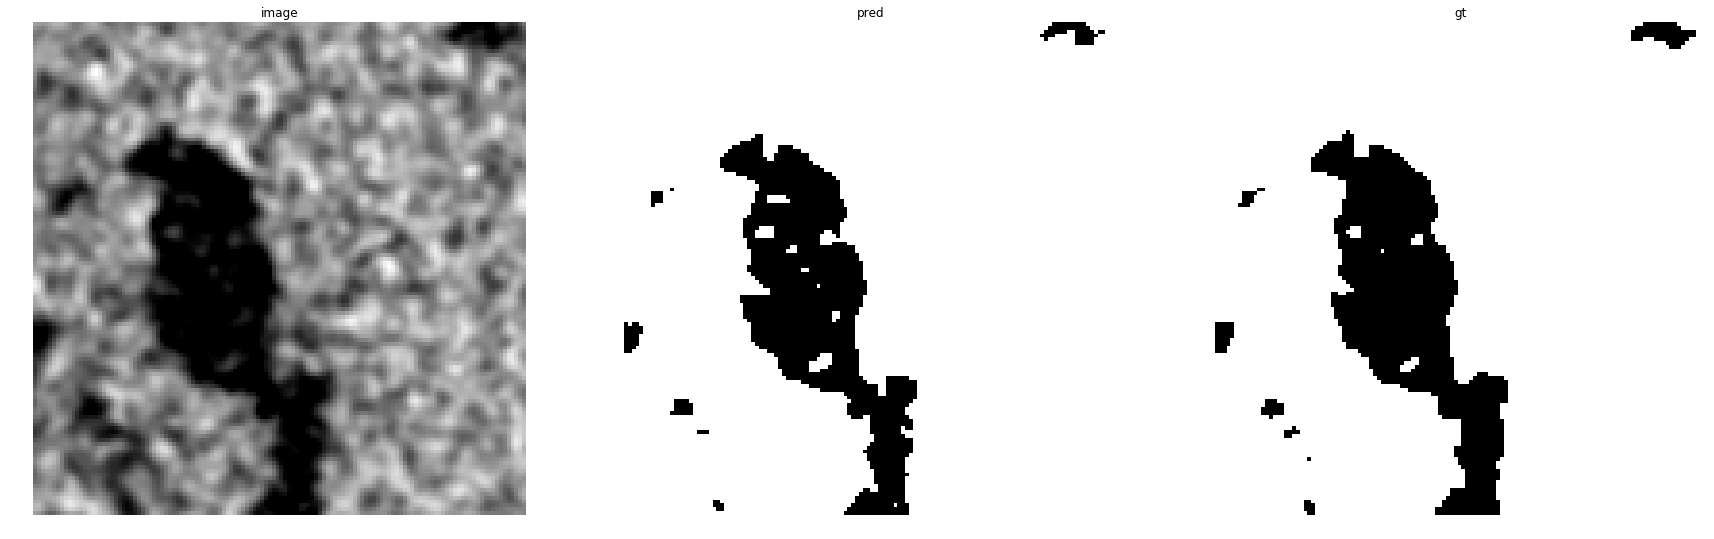

accuracy    : 0.989501953125
precision   : 0.9882123177791727
recall      : 0.9997883000493967
f1          : 0.9939666058650204
pr_auc      : 0.9999637442022884
iou         : 0.9880055788005578


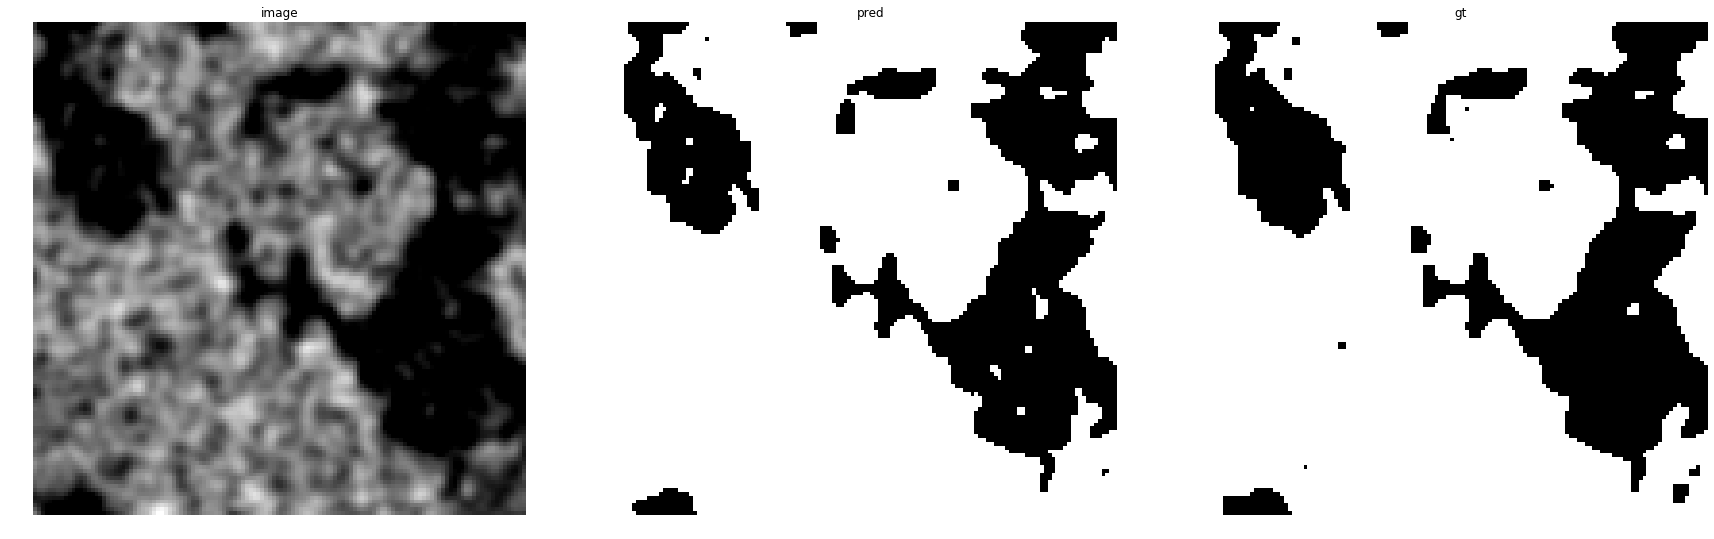

accuracy    : 0.981689453125
precision   : 0.9753044939101218
recall      : 0.9994835155375742
f1          : 0.9872459824844826
pr_auc      : 0.9997877186147246
iou         : 0.9748131978843086


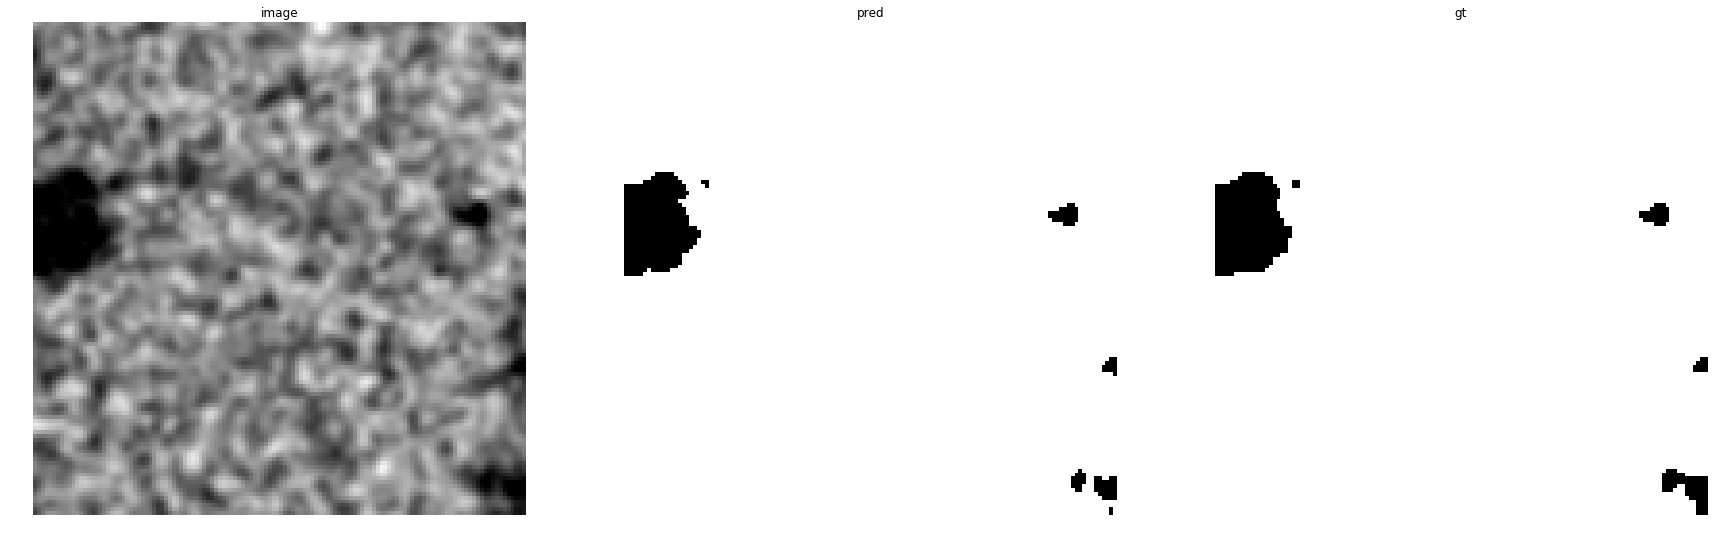

accuracy    : 0.9970703125
precision   : 0.9970399294621489
recall      : 0.9999368367862557
f1          : 0.9984862819299906
pr_auc      : 0.9999985960111006
iou         : 0.9969771396183639


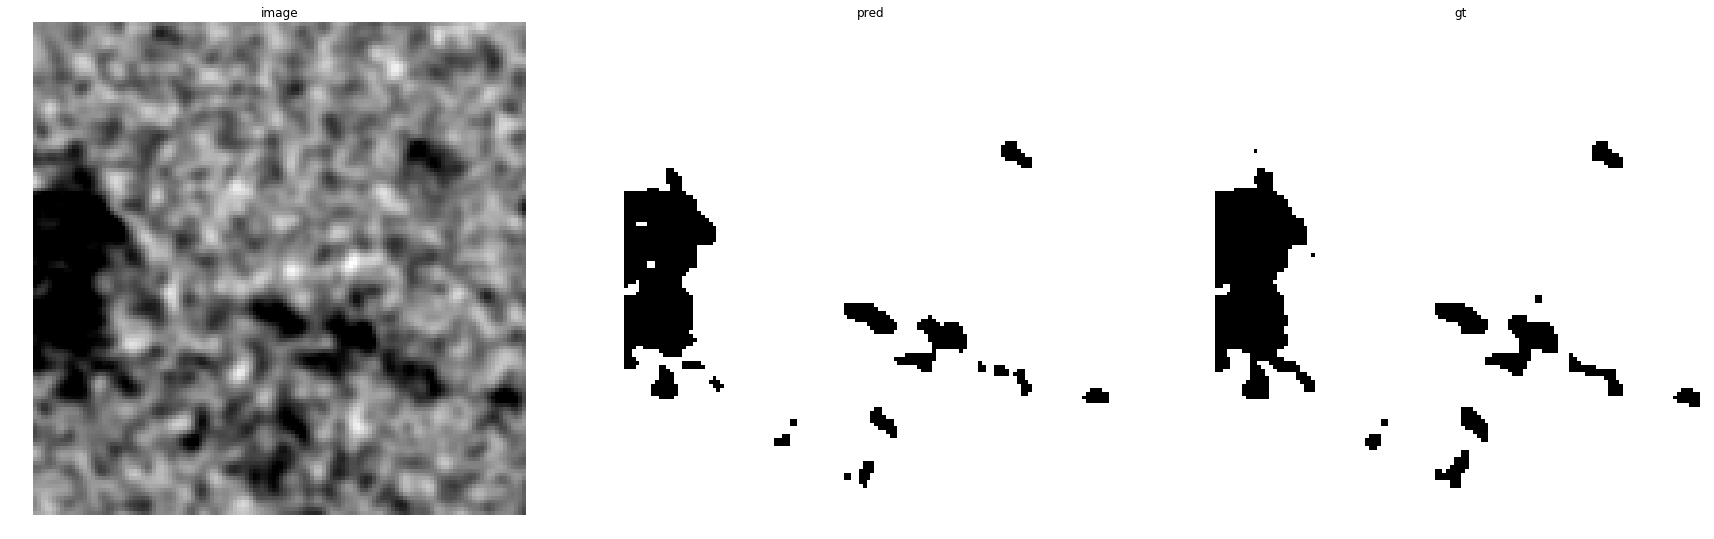

accuracy    : 0.98944091796875
precision   : 0.9886094284961812
recall      : 1.0
f1          : 0.9942720921762739
pr_auc      : 0.9999755525471853
iou         : 0.9886094284961812


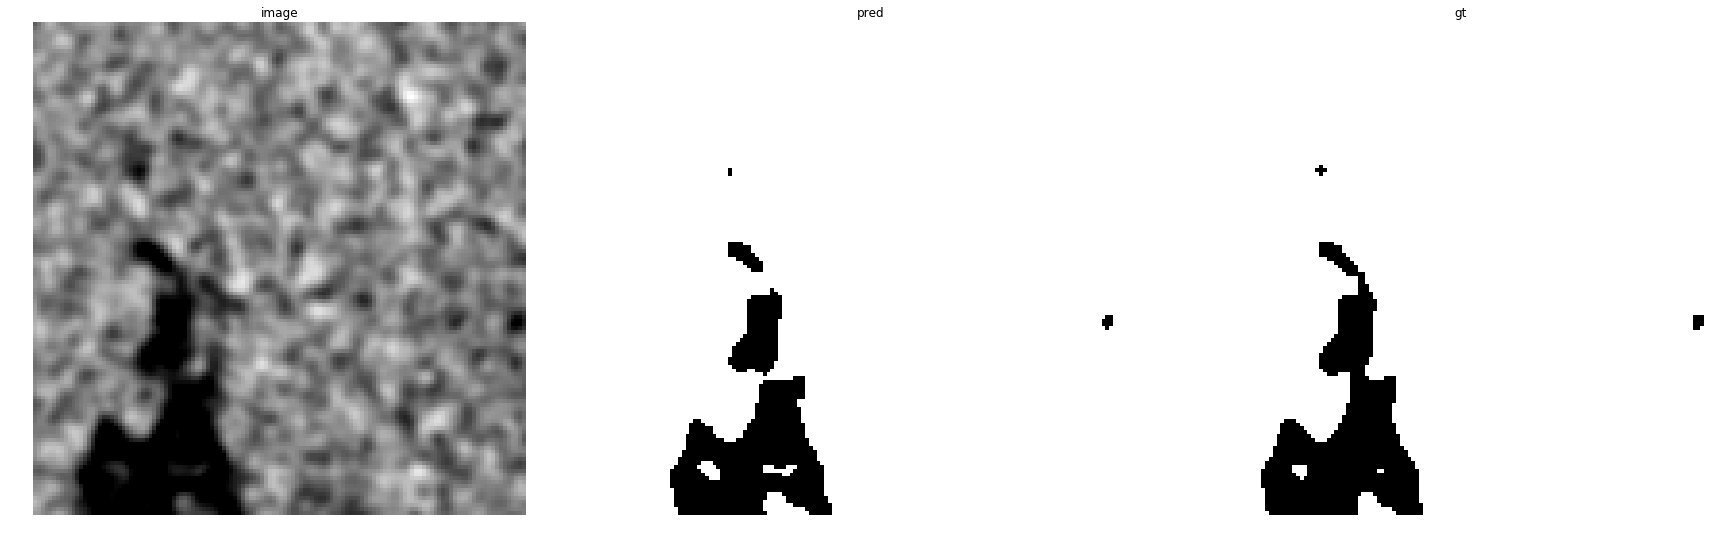

accuracy    : 0.9935302734375
precision   : 0.9930446194225722
recall      : 1.0
f1          : 0.9965101731744255
pr_auc      : 0.9999832600676793
iou         : 0.9930446194225722


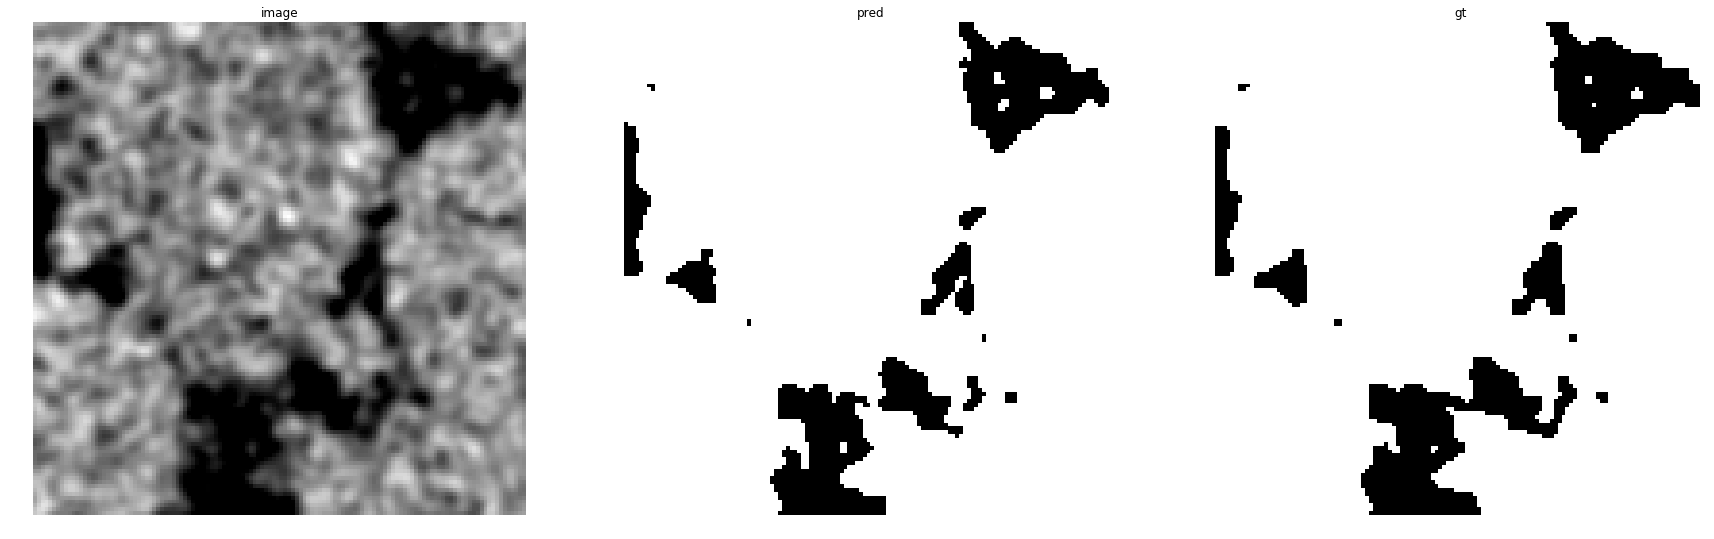

accuracy    : 0.98736572265625
precision   : 0.9860134994085311
recall      : 0.9995767494356659
f1          : 0.9927488002241918
pr_auc      : 0.9999241030799223
iou         : 0.9856020031995548


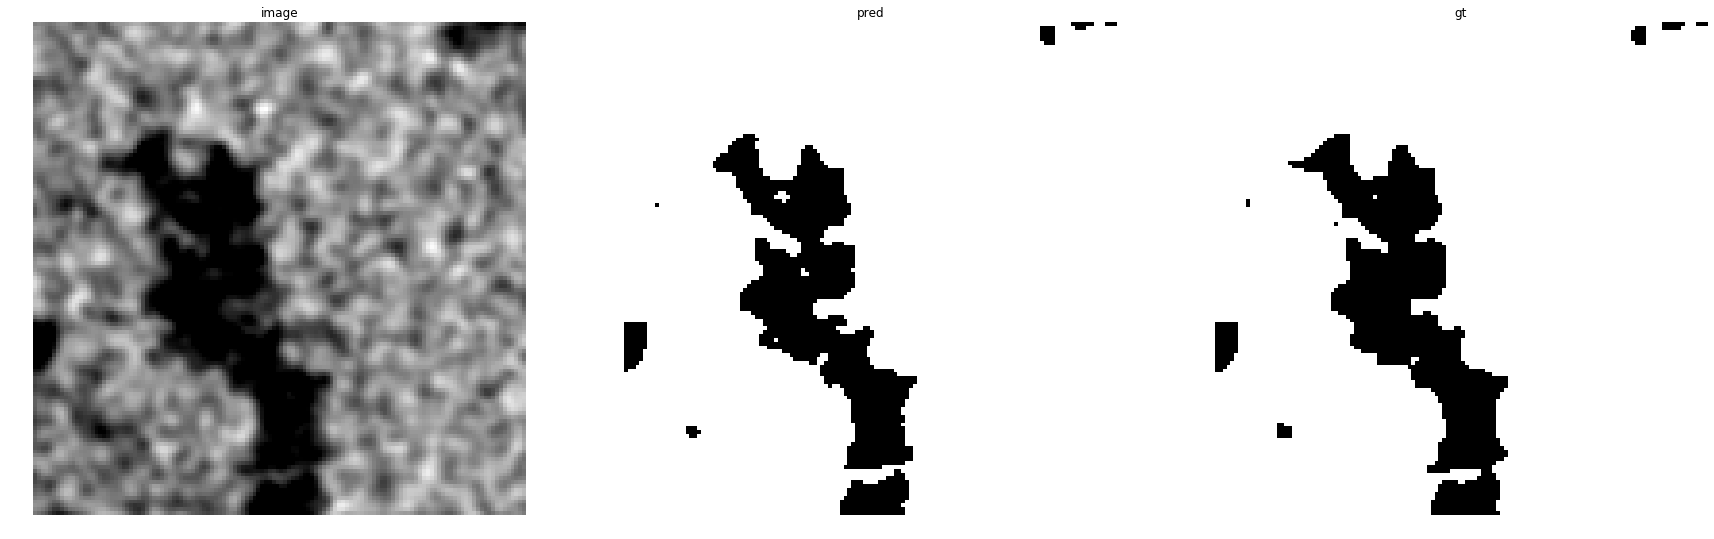

accuracy    : 0.9898681640625
precision   : 0.9887337572573957
recall      : 0.99979032708974
f1          : 0.9942313038643315
pr_auc      : 0.9999672404126044
iou         : 0.9885287817013337


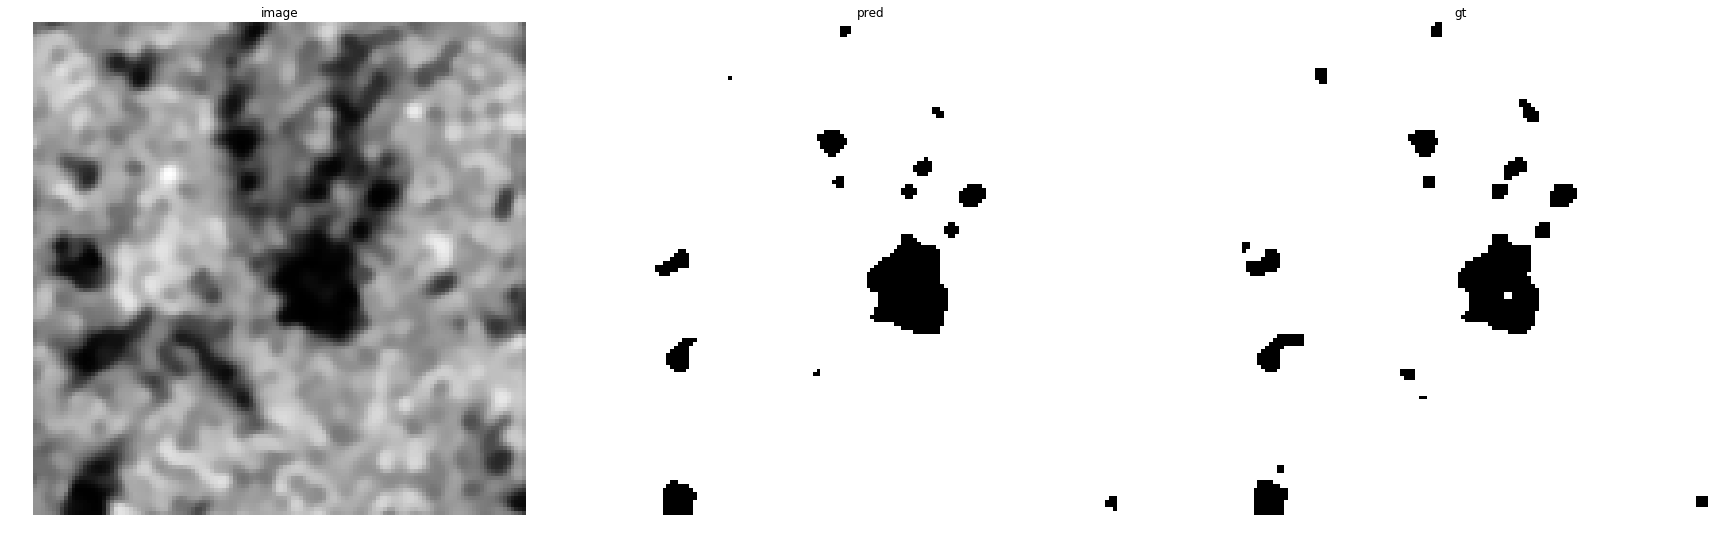

accuracy    : 0.99346923828125
precision   : 0.9940142638818136
recall      : 0.9991678934903667
f1          : 0.9965844159989785
pr_auc      : 0.9999650099542734
iou         : 0.9931920850034994


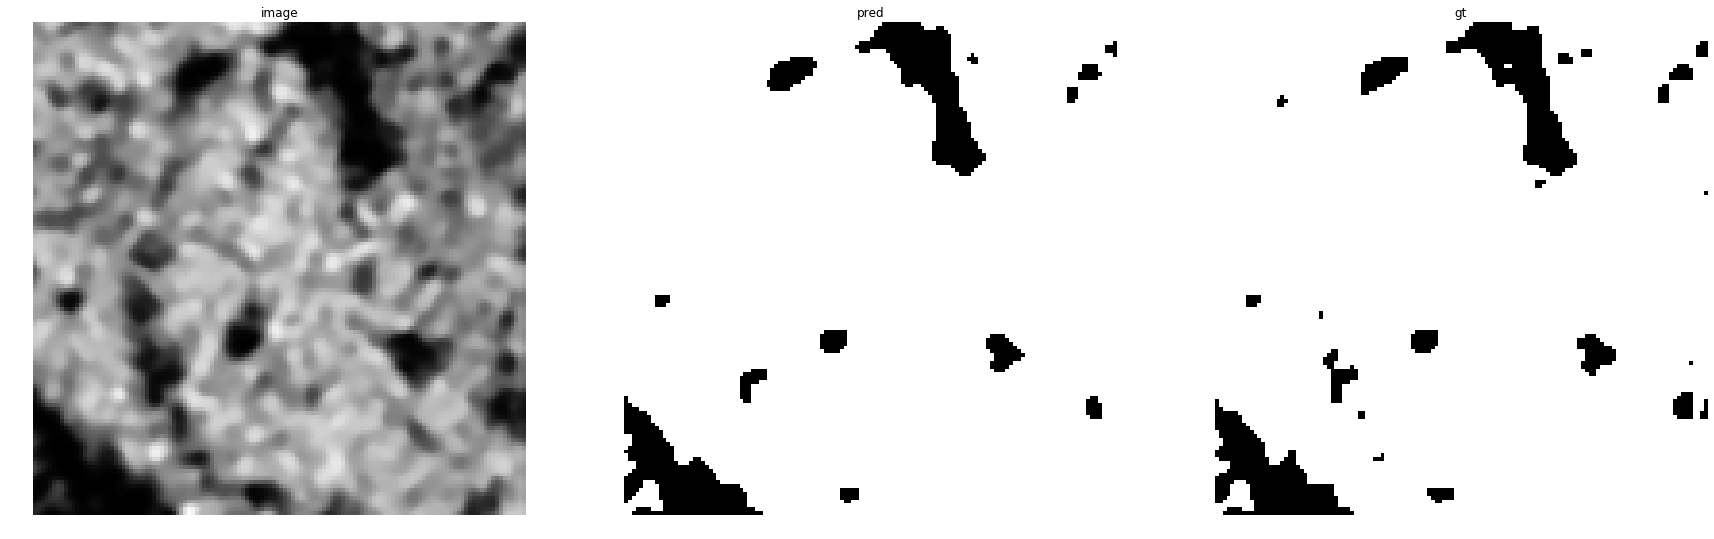

accuracy    : 0.99090576171875
precision   : 0.9920645417272848
recall      : 0.998070653981771
f1          : 0.9950585348058236
pr_auc      : 0.999909913170283
iou         : 0.9901656656326315


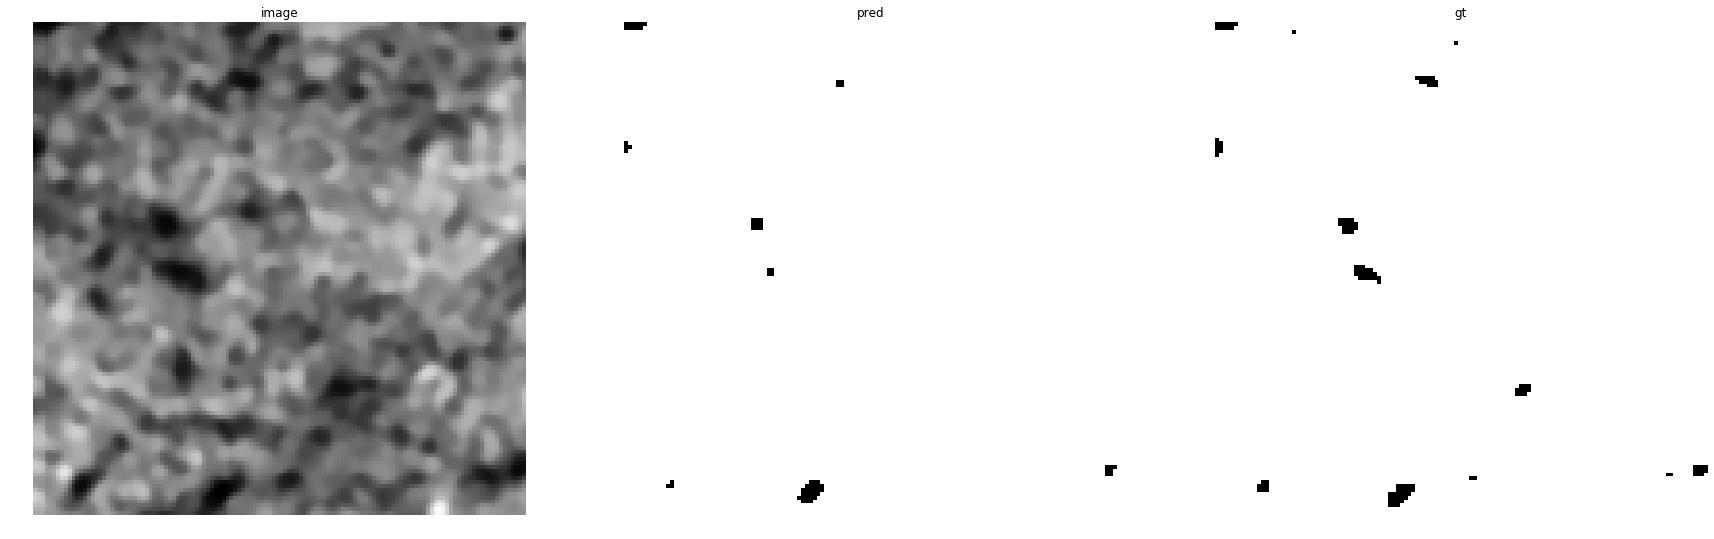

accuracy    : 0.99566650390625
precision   : 0.9958933496782102
recall      : 0.9997538764459759
f1          : 0.9978198790186386
pr_auc      : 0.999987267343587
iou         : 0.9956492432134322


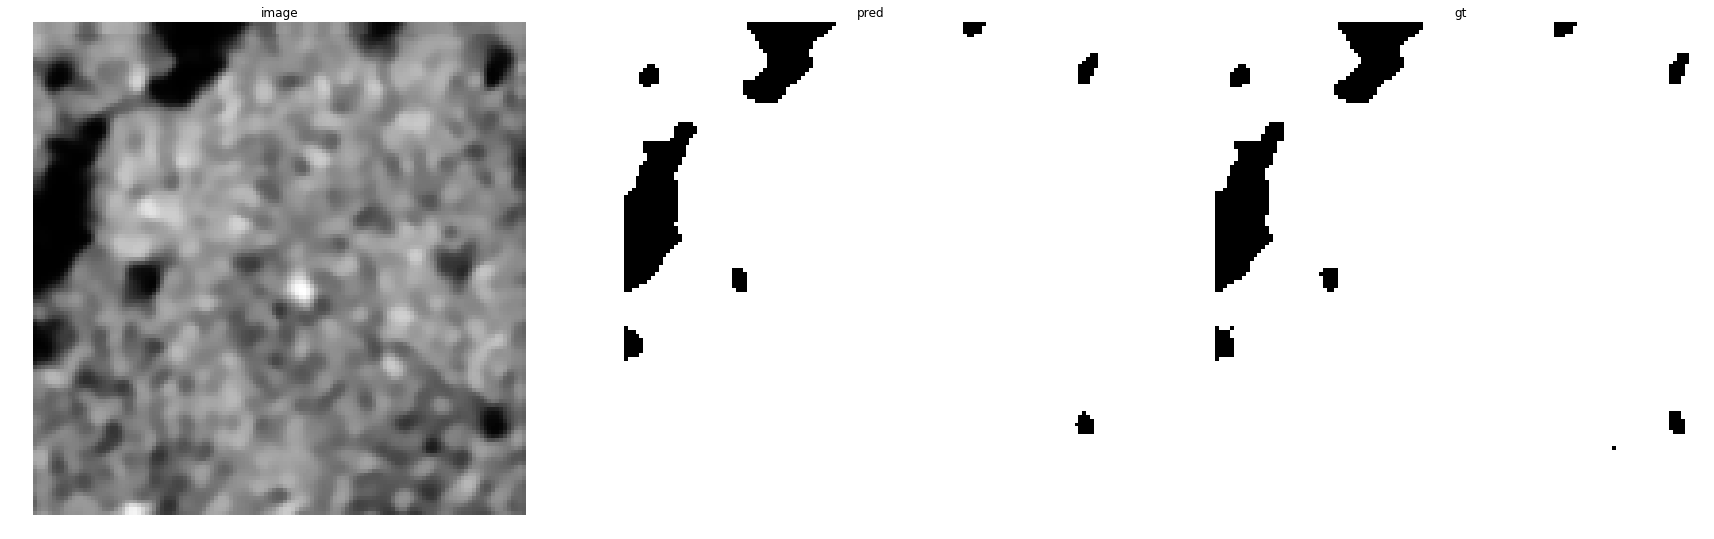

accuracy    : 0.99786376953125
precision   : 0.9990964827363665
recall      : 0.9986453360856664
f1          : 0.9988708584701745
pr_auc      : 0.9999945598145547
iou         : 0.9977442639855633


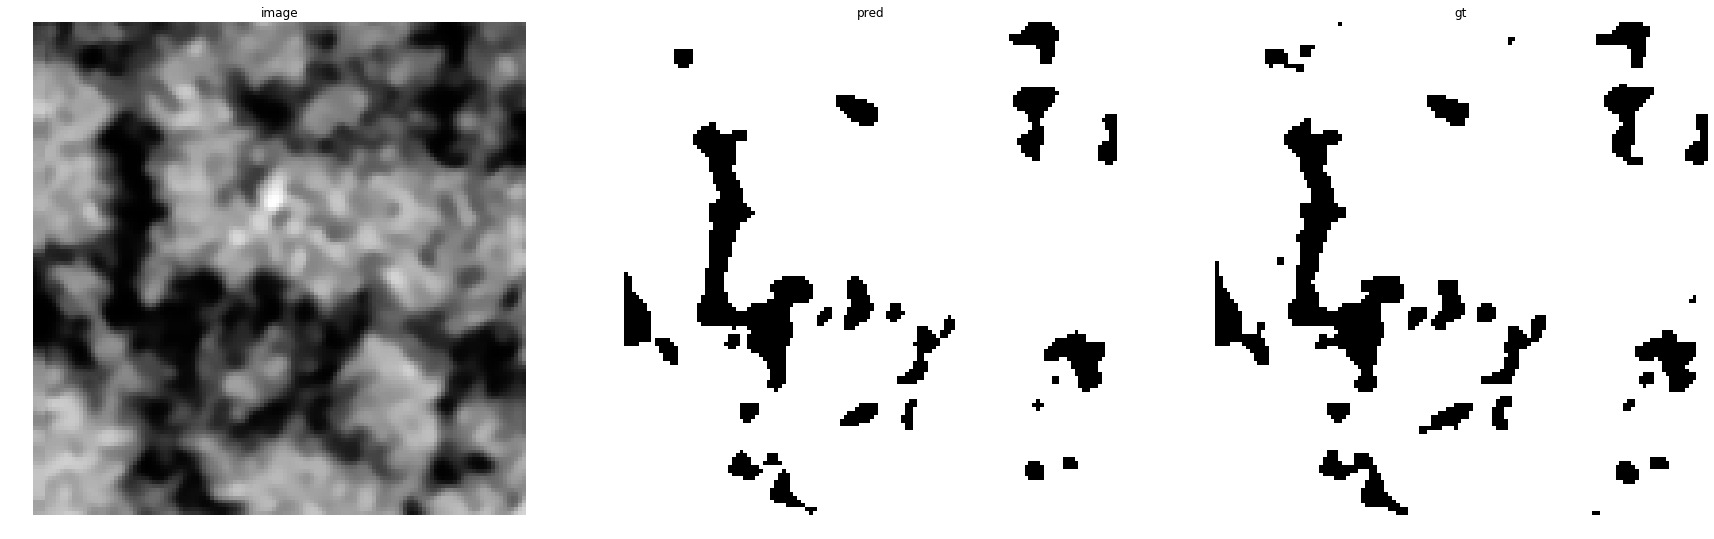

accuracy    : 0.9825439453125
precision   : 0.9833525854454033
recall      : 0.9971749465996004
f1          : 0.990215531987684
pr_auc      : 0.9997336961194561
iou         : 0.980620680308985


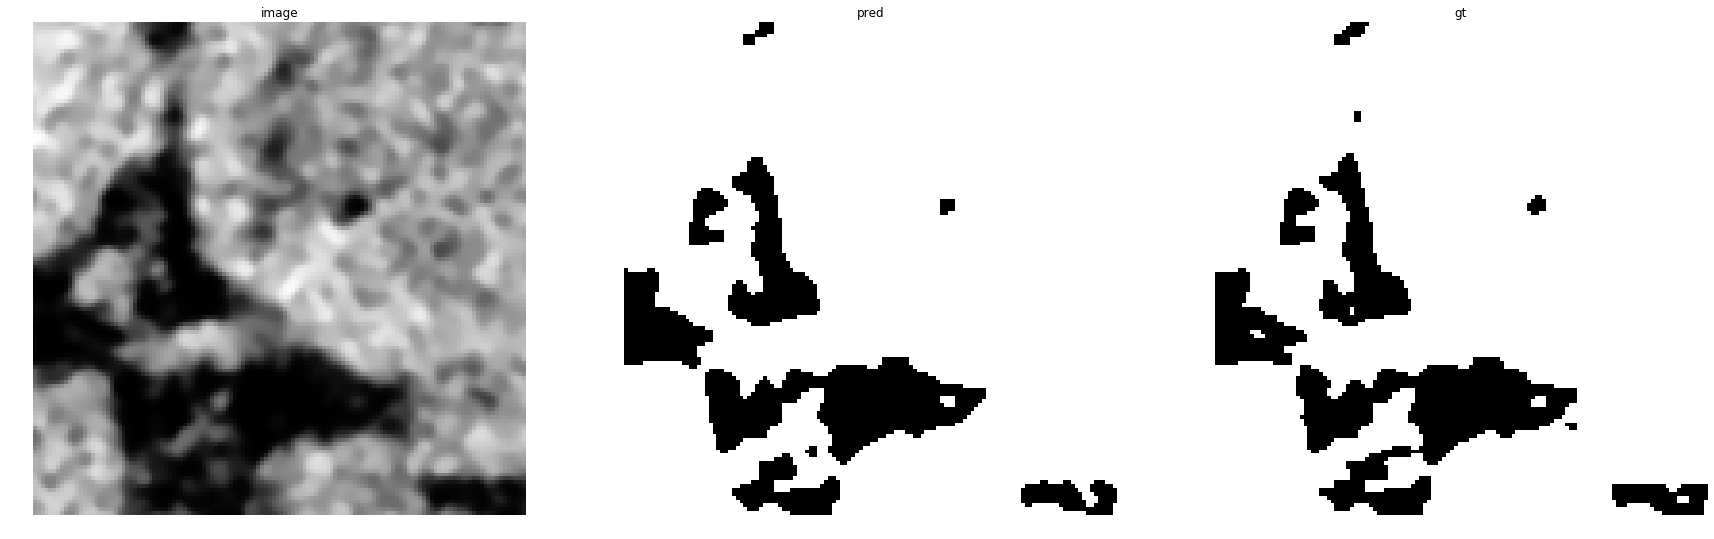

accuracy    : 0.99005126953125
precision   : 0.9927210447441661
recall      : 0.9956341253936445
f1          : 0.9941754511345363
pr_auc      : 0.9998710980169632
iou         : 0.9884183600966321


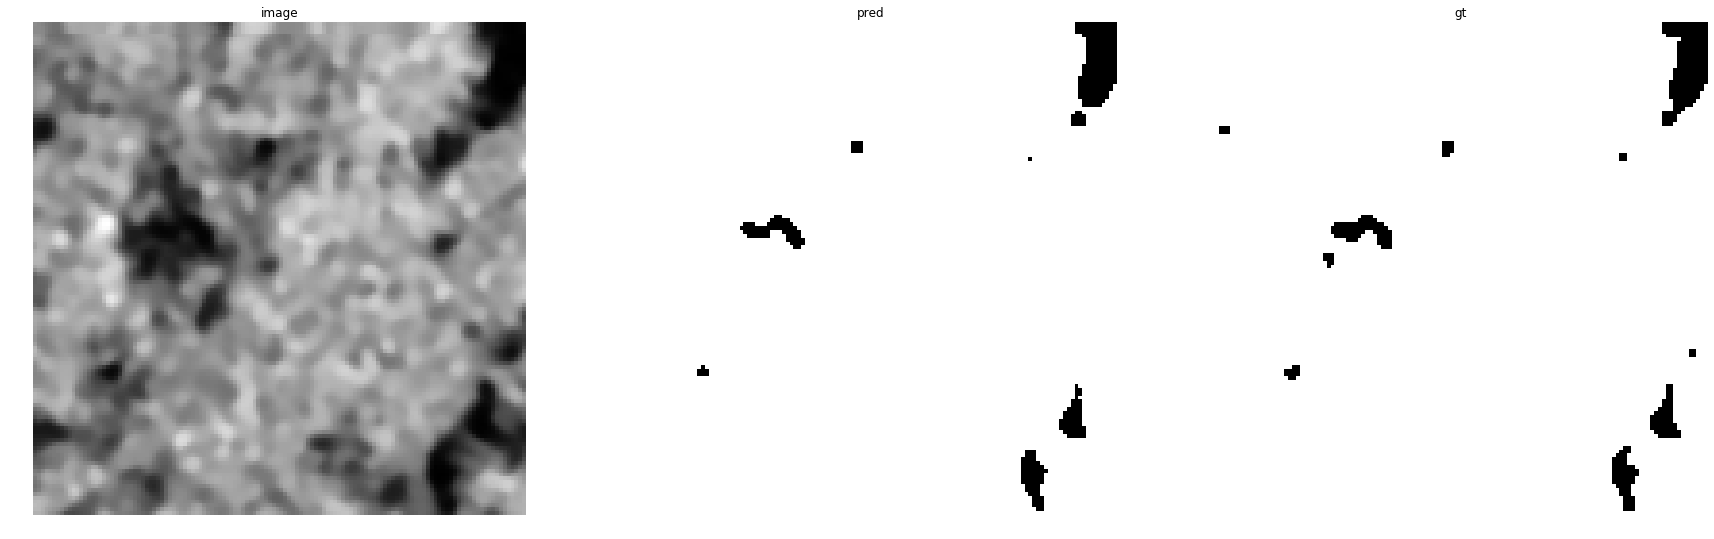

accuracy    : 0.9954833984375
precision   : 0.995993489420308
recall      : 0.9993718592964824
f1          : 0.9976798143851507
pr_auc      : 0.9999875973990279
iou         : 0.9953703703703703


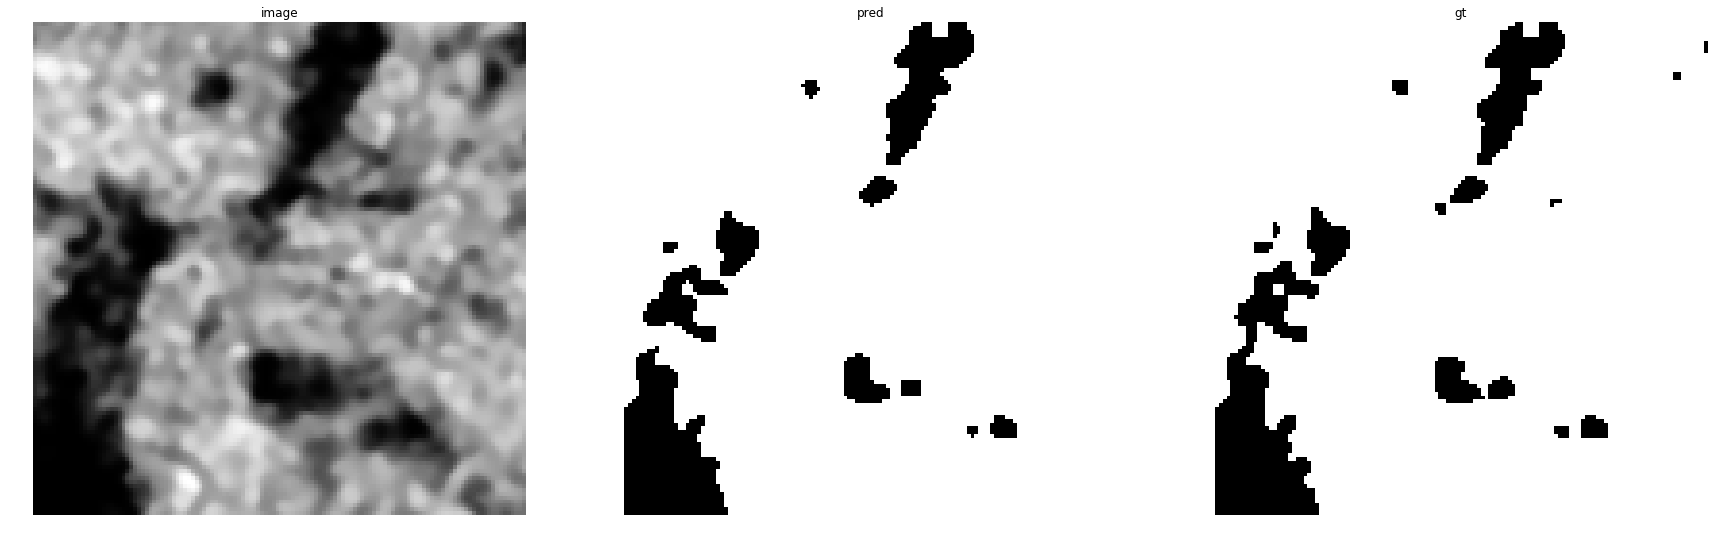

accuracy    : 0.991943359375
precision   : 0.9929053823589604
recall      : 0.9980799561132826
f1          : 0.9954859448738118
pr_auc      : 0.9999245224900423
iou         : 0.9910124599986383


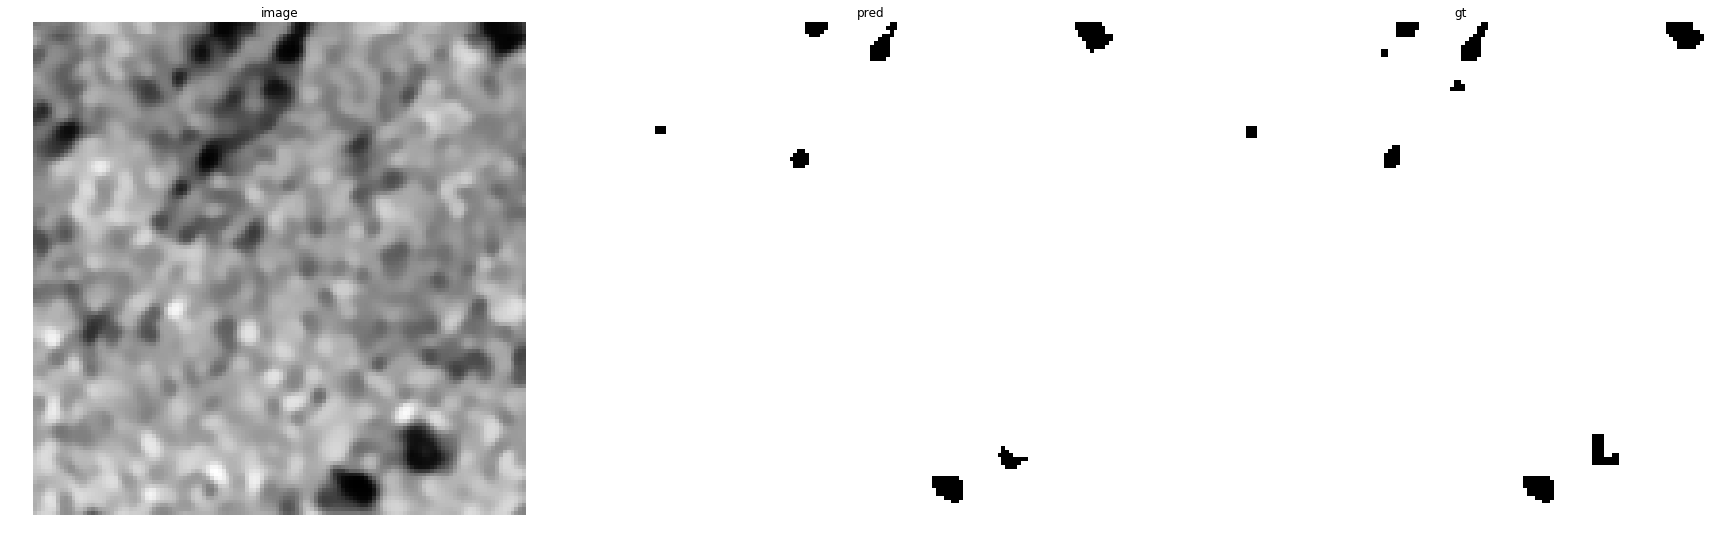

accuracy    : 0.99713134765625
precision   : 0.9975290338522362
recall      : 0.9995666976168369
f1          : 0.9985468262065981
pr_auc      : 0.9999935240371944
iou         : 0.9970978697128744


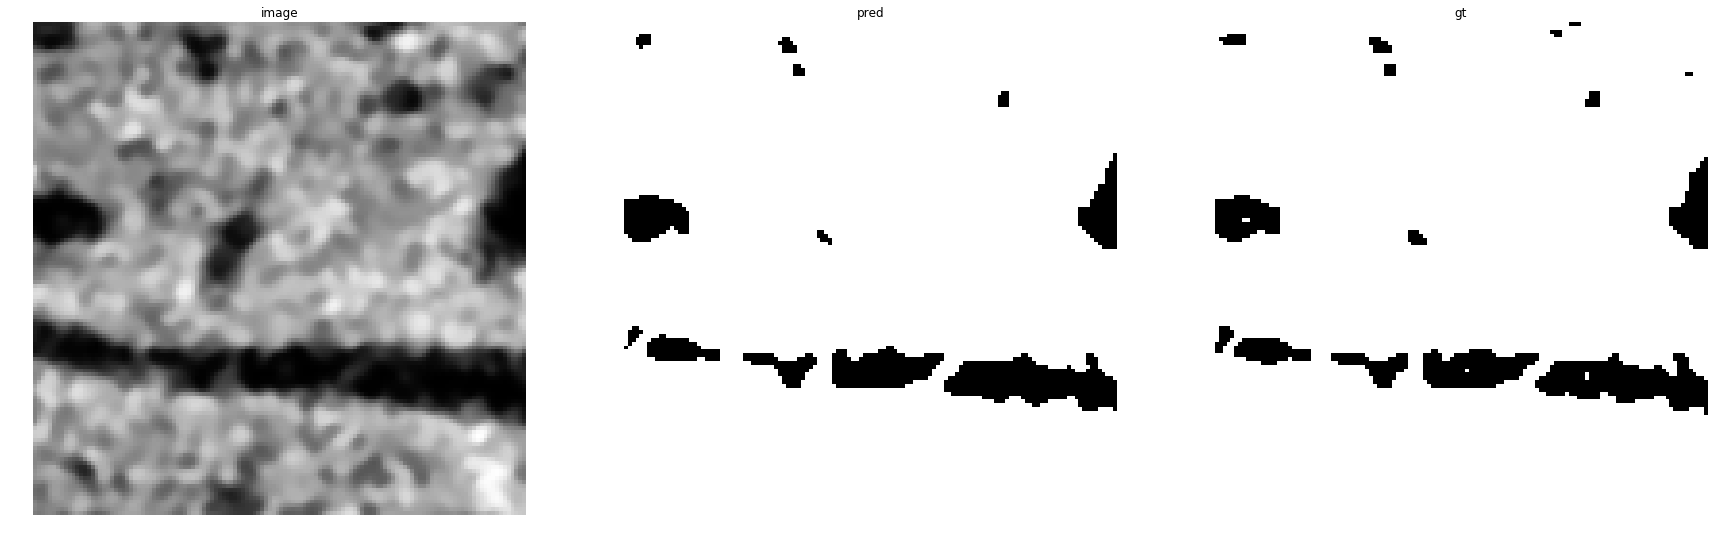

accuracy    : 0.9931640625
precision   : 0.9951951556637926
recall      : 0.9974272709281615
f1          : 0.996309963099631
pr_auc      : 0.9999457949767647
iou         : 0.9926470588235294


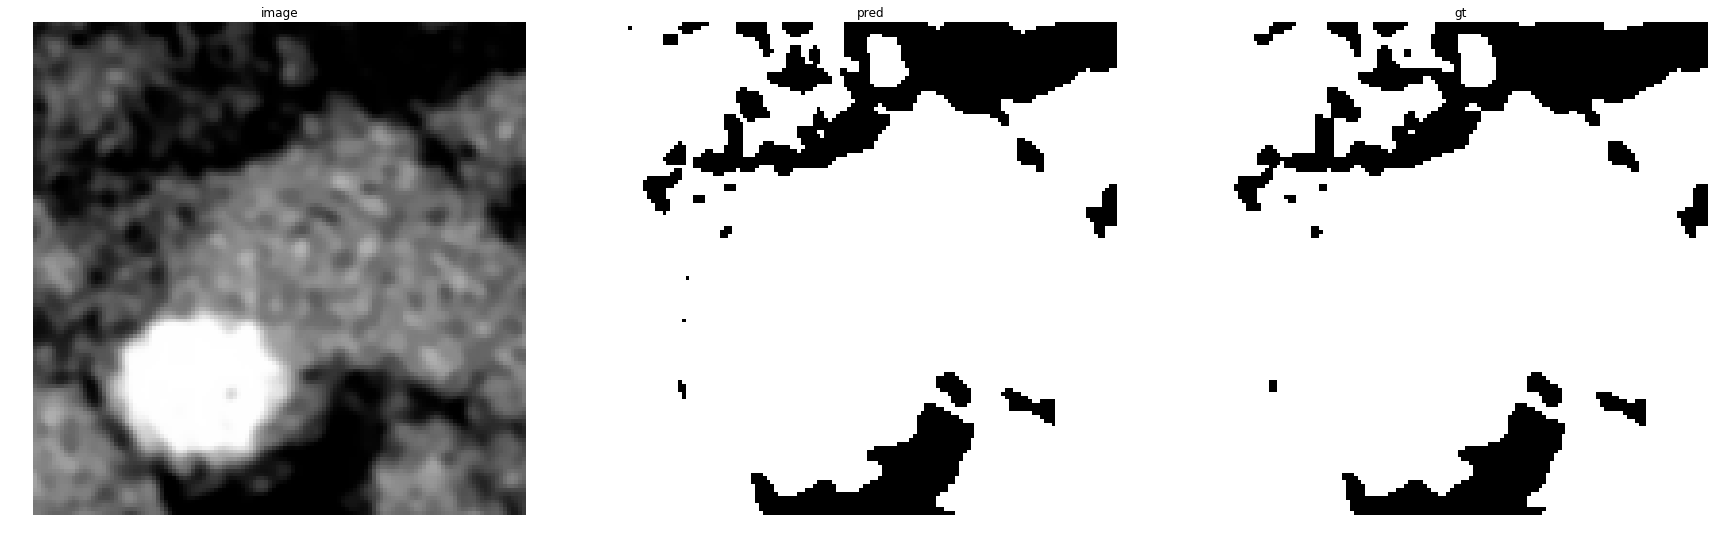

accuracy    : 0.99005126953125
precision   : 0.9944627357078719
recall      : 0.9933477838403468
f1          : 0.9939049470889578
pr_auc      : 0.9998801161835924
iou         : 0.9878837434029585


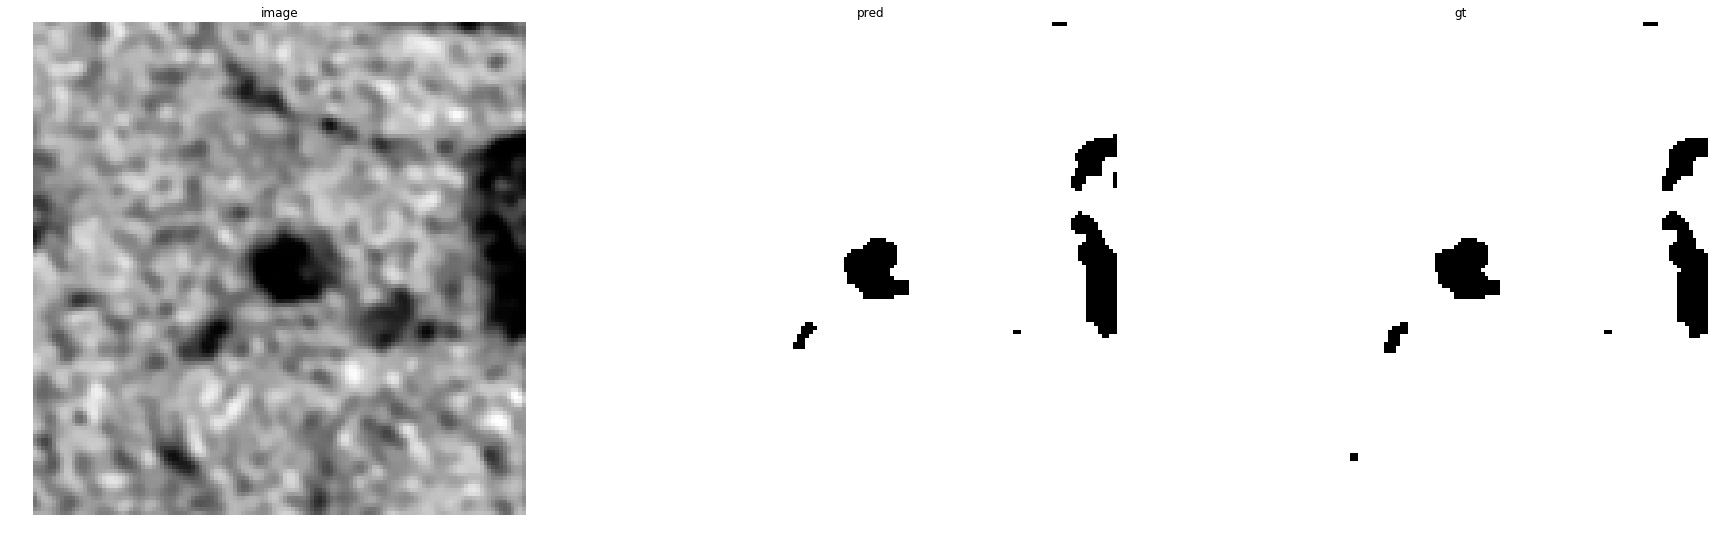

accuracy    : 0.99798583984375
precision   : 0.9987379314696788
recall      : 0.999179292929293
f1          : 0.998958563448733
pr_auc      : 0.9999943625948021
iou         : 0.9979192938209331


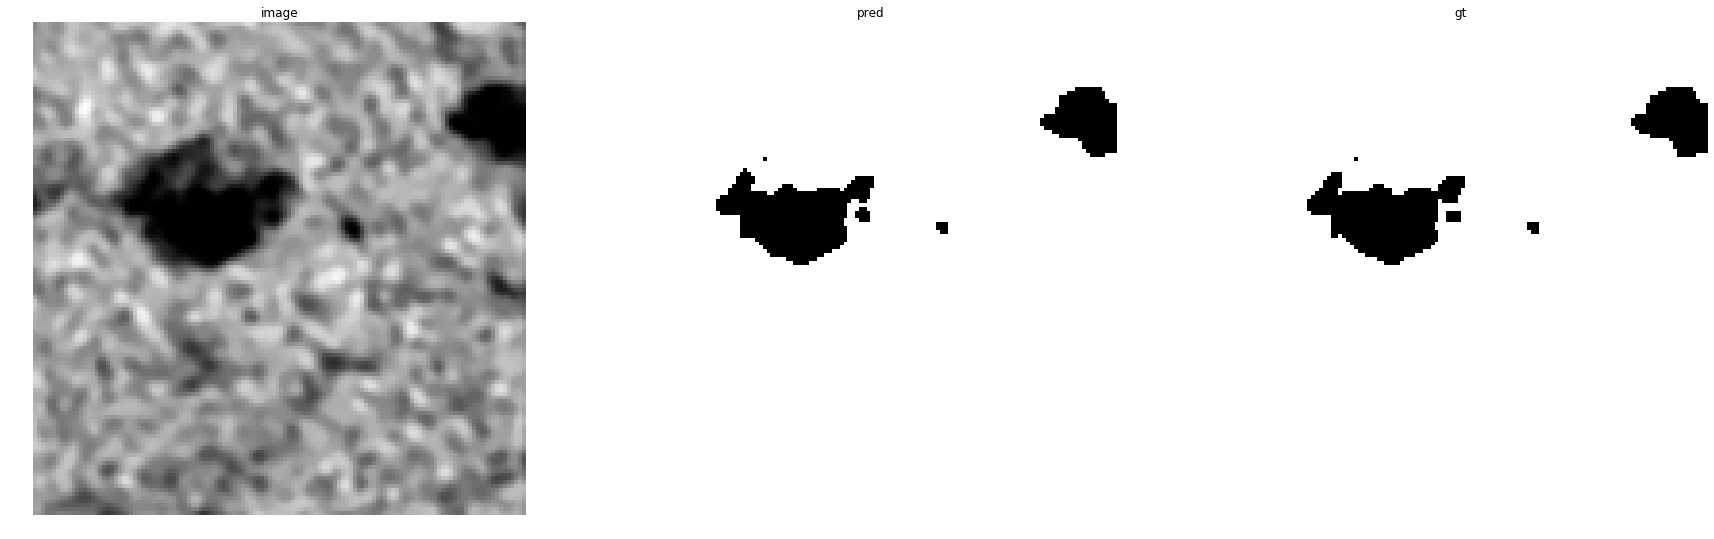

accuracy    : 0.99822998046875
precision   : 0.9992293860775752
recall      : 0.9989086473647044
f1          : 0.9990689909788437
pr_auc      : 0.9999973376052707
iou         : 0.9981397139008275


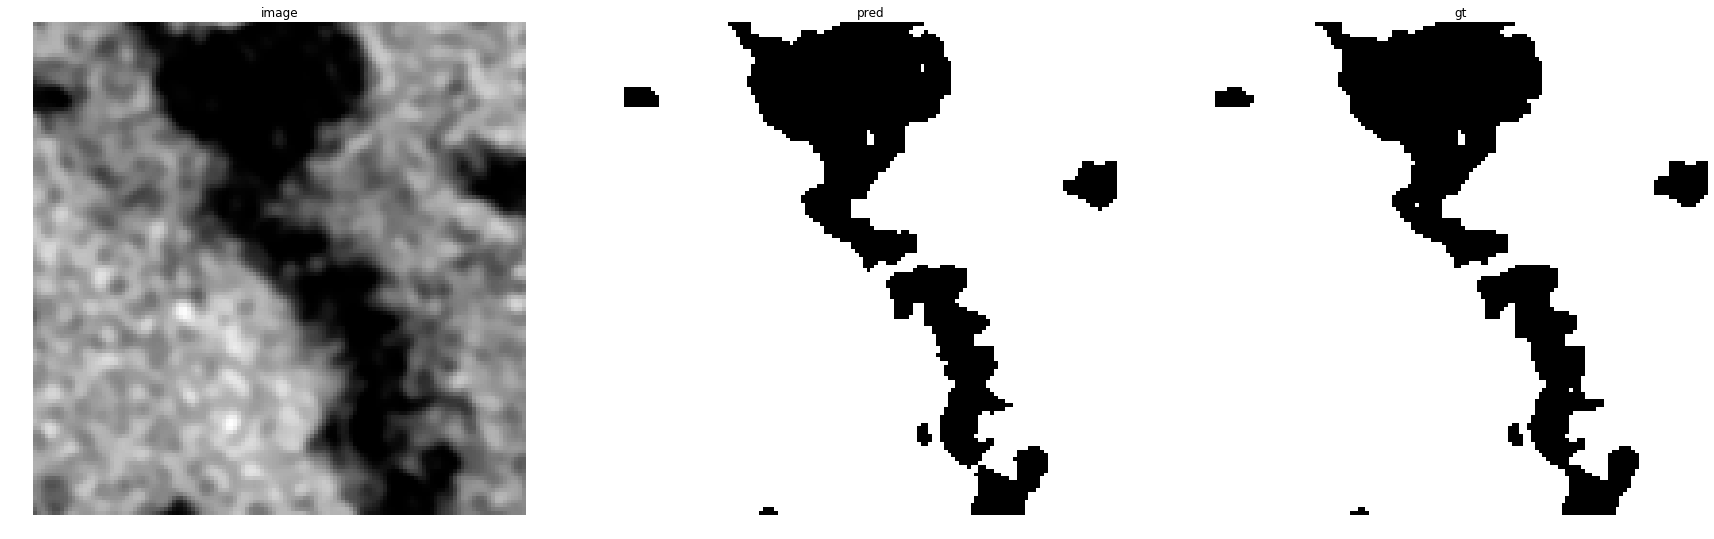

accuracy    : 0.99334716796875
precision   : 0.9958199596924685
recall      : 0.9960430043302971
f1          : 0.9959314695233474
pr_auc      : 0.9999464401013374
iou         : 0.9918959107806692


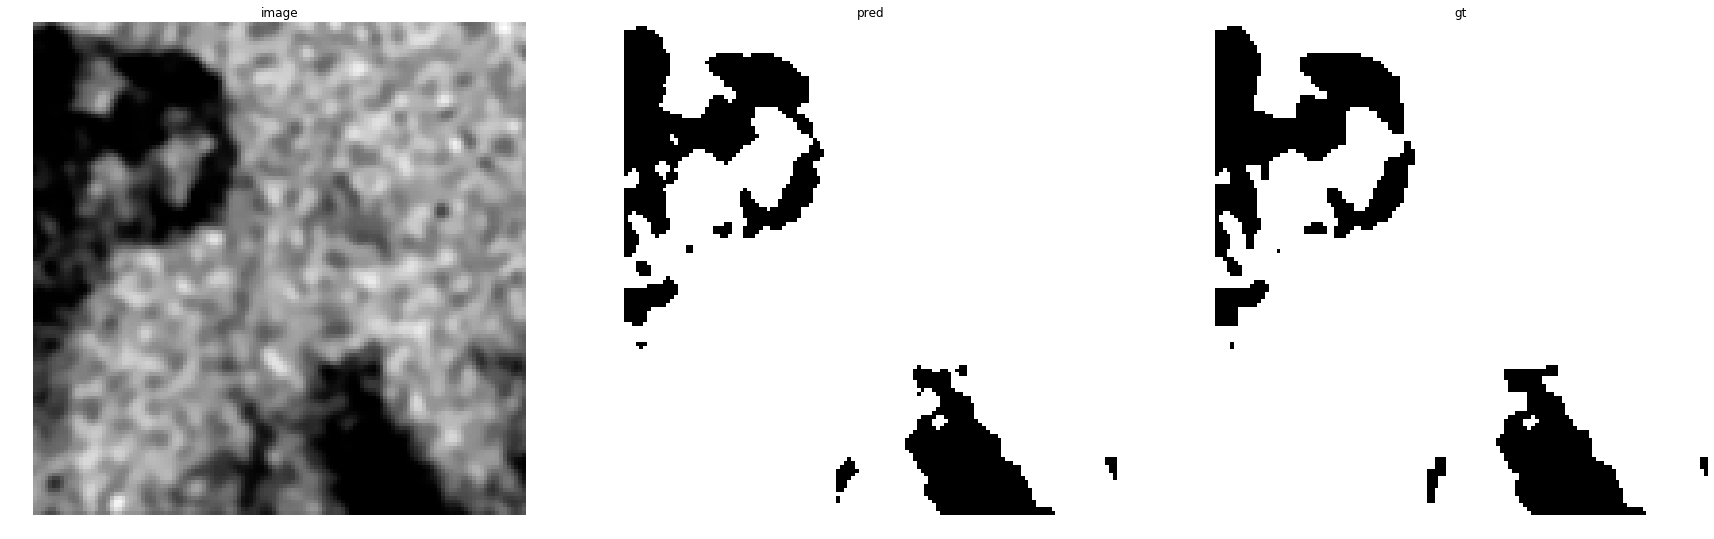

accuracy    : 0.99017333984375
precision   : 0.9921310080816673
recall      : 0.996440014239943
f1          : 0.994280842598842
pr_auc      : 0.999900032153889
iou         : 0.9886267307148913


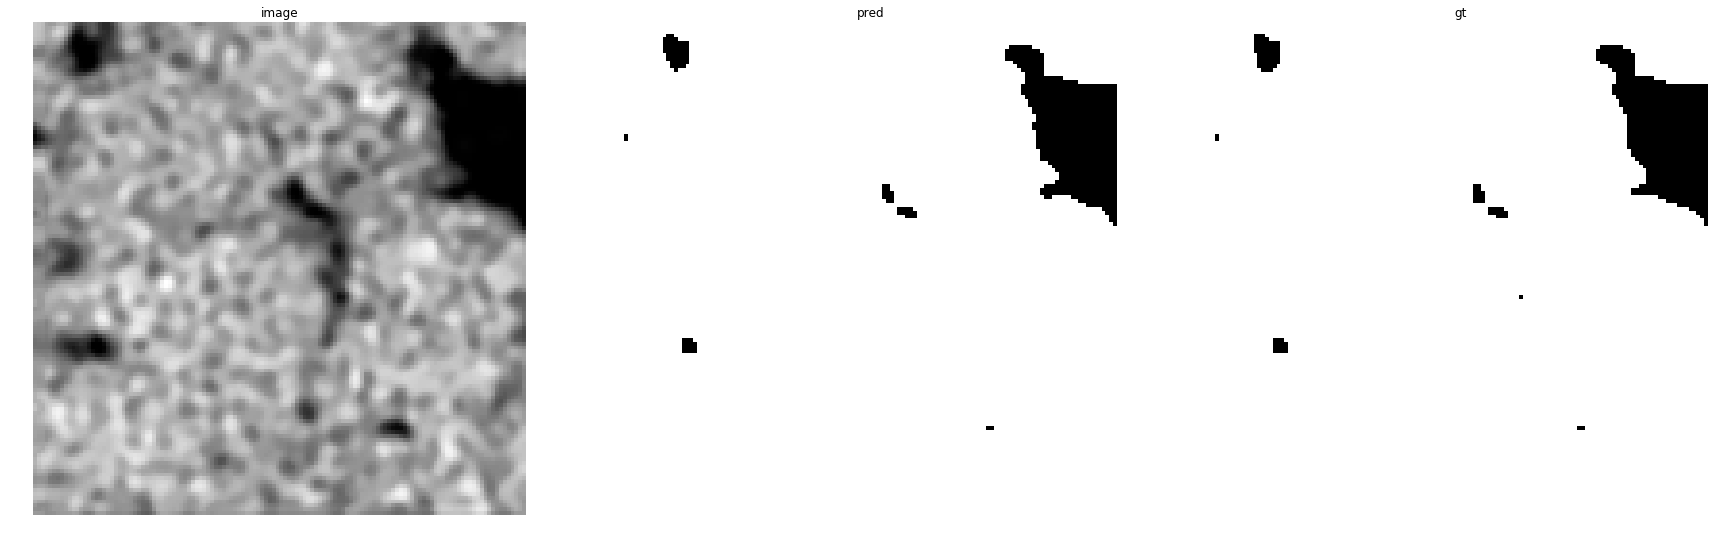

accuracy    : 0.99871826171875
precision   : 0.9991649001092053
recall      : 0.9994859272587071
f1          : 0.9993253879019564
pr_auc      : 0.9999984719829146
iou         : 0.9986516853932584


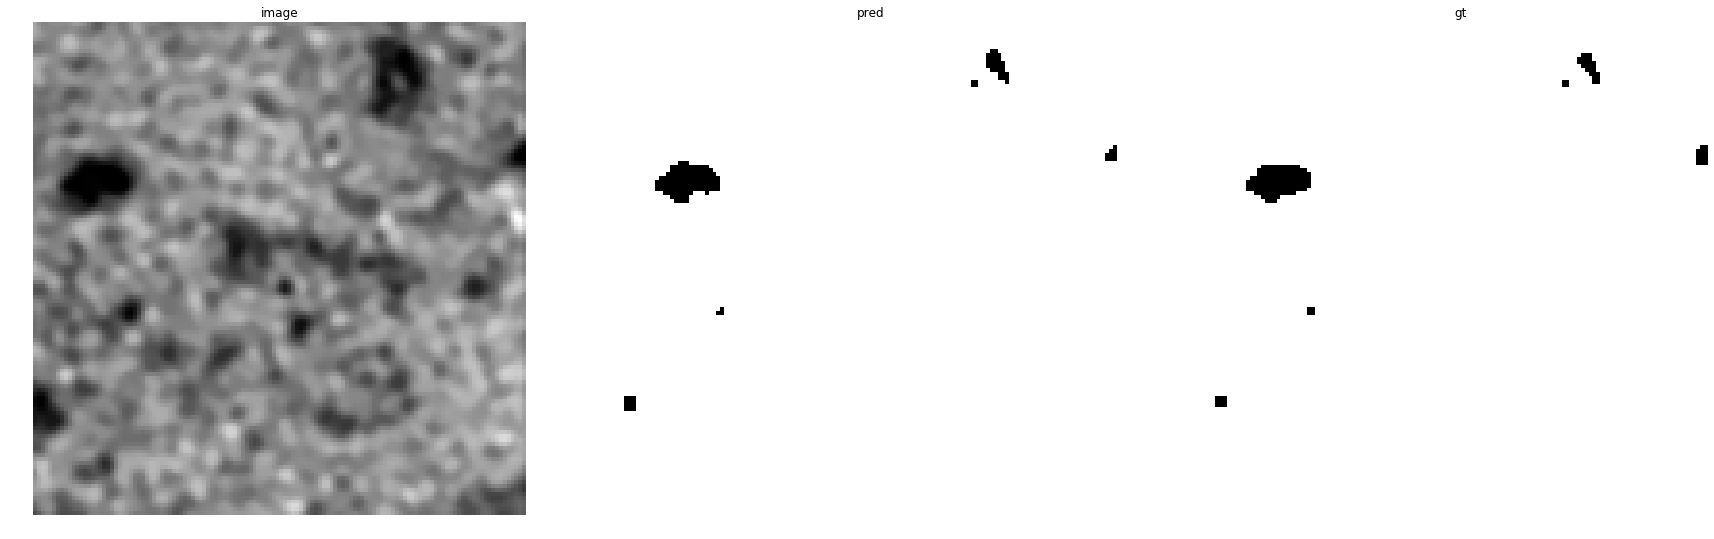

accuracy    : 0.998291015625
precision   : 0.9991976794420786
recall      : 0.9990743597655045
f1          : 0.9991360157985683
pr_auc      : 0.9999984202041005
iou         : 0.9982735232457763


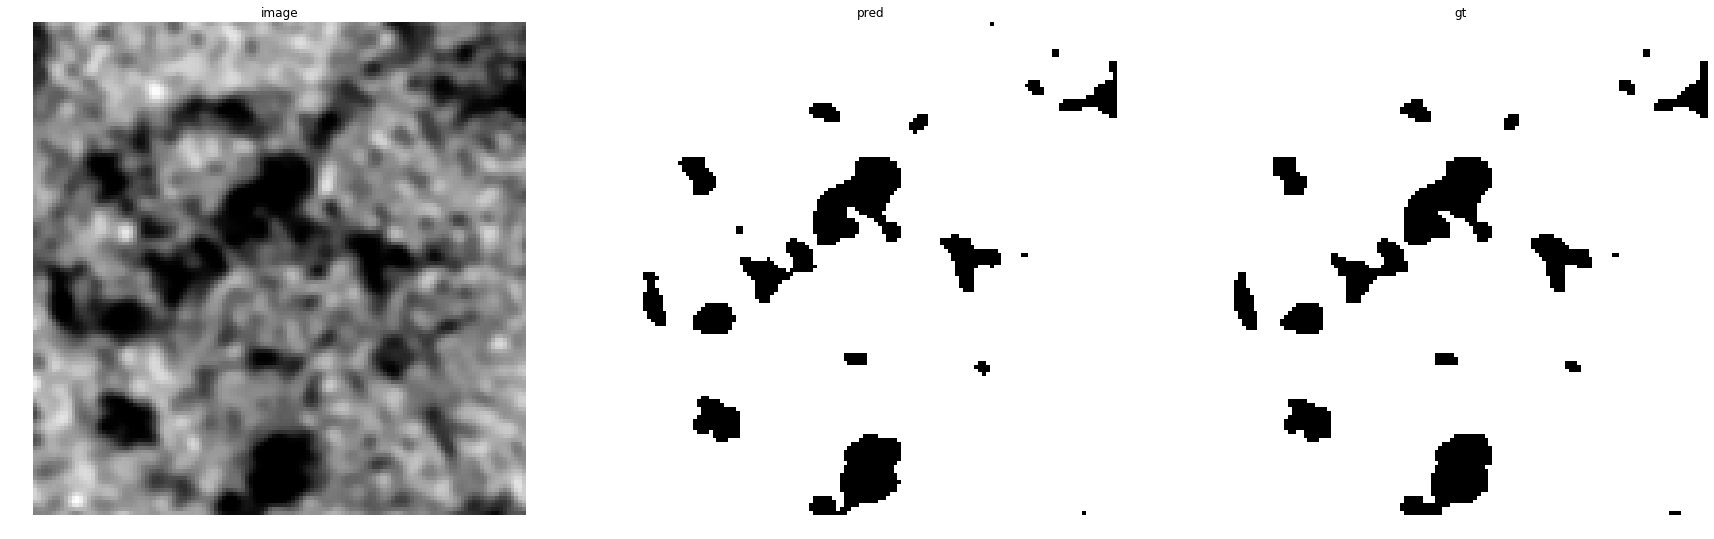

accuracy    : 0.99365234375
precision   : 0.9957523063649034
recall      : 0.9973409559263445
f1          : 0.9965459980073066
pr_auc      : 0.9999628901727495
iou         : 0.9931157741444363


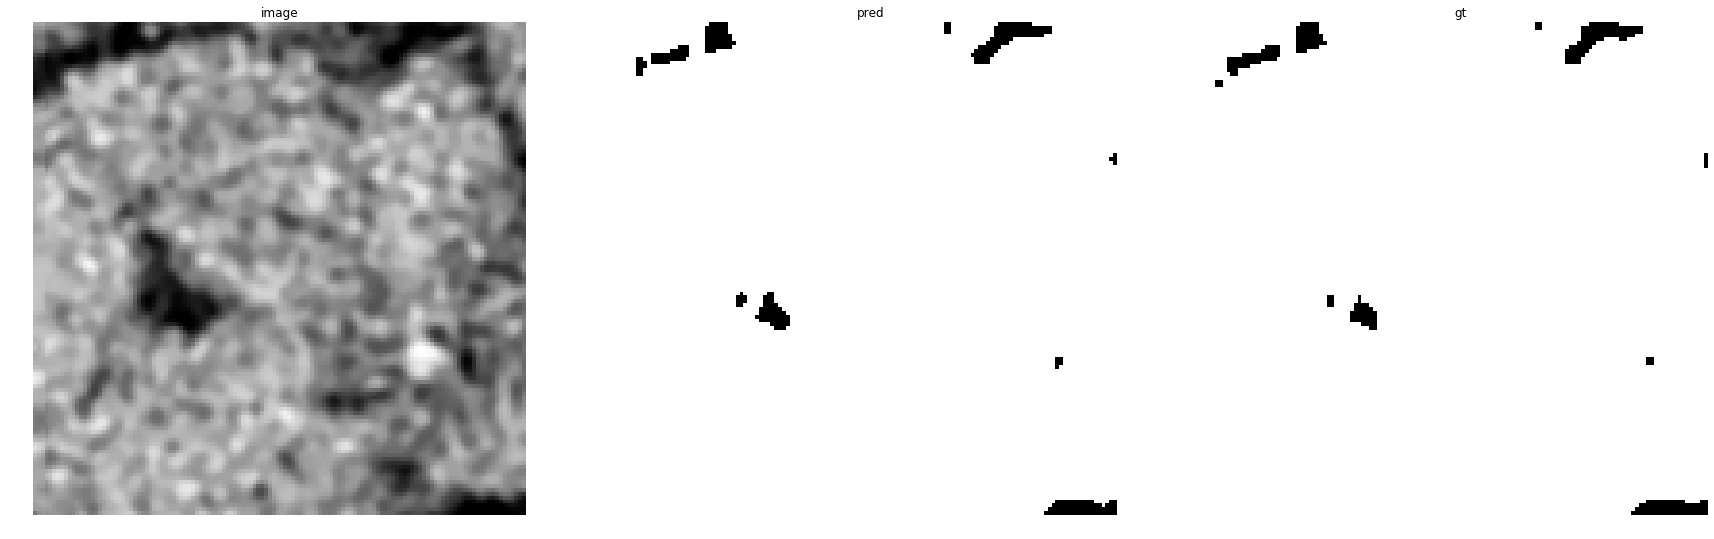

accuracy    : 0.99713134765625
precision   : 0.9985680488108579
recall      : 0.9985058830853514
f1          : 0.9985369649805447
pr_auc      : 0.9999922579058834
iou         : 0.9970782046500062


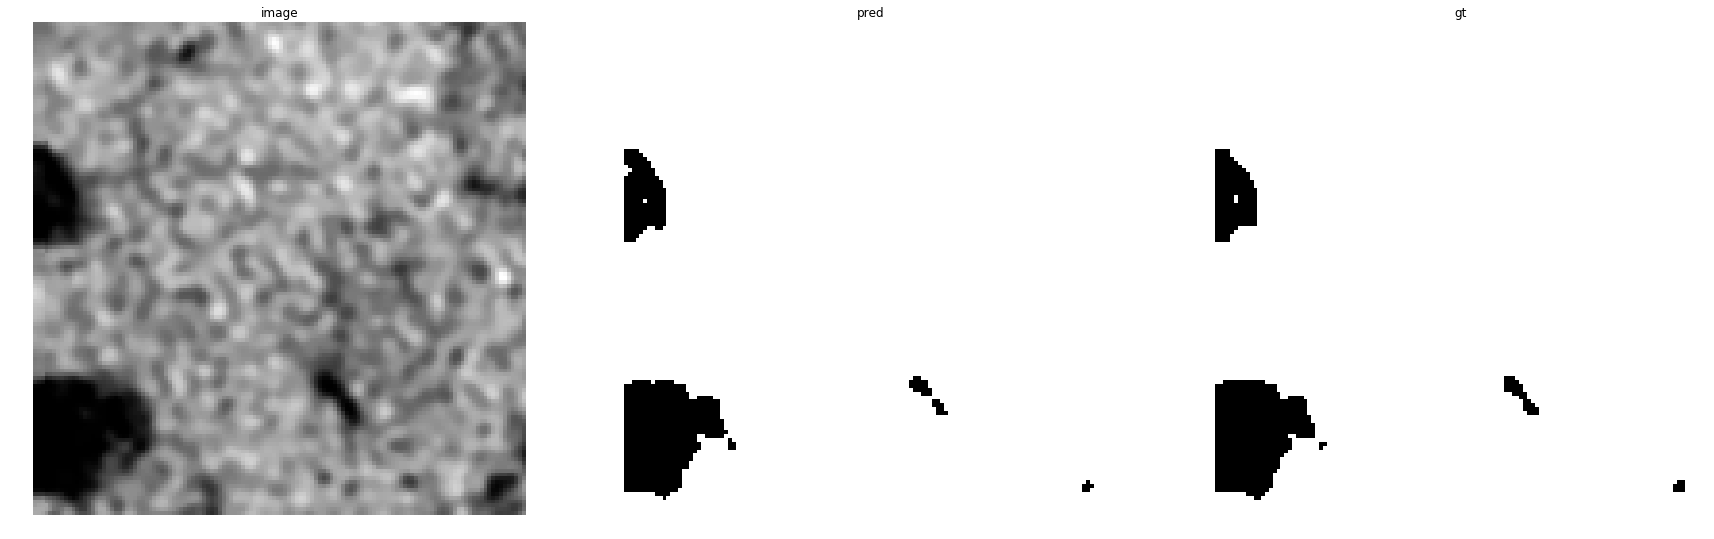

accuracy    : 0.99774169921875
precision   : 0.9987153134635149
recall      : 0.9989078059749438
f1          : 0.9988115504448656
pr_auc      : 0.9999960454536098
iou         : 0.9976259223612448


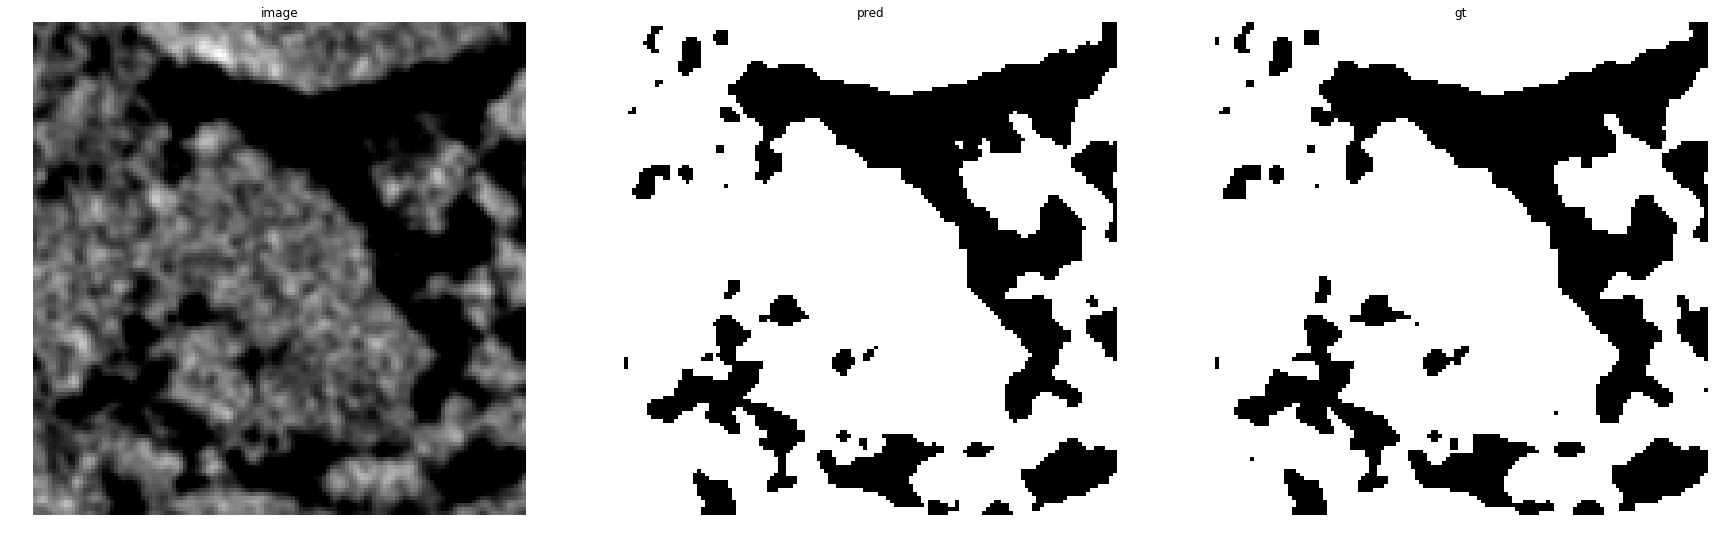

accuracy    : 0.978759765625
precision   : 0.9711440245148111
recall      : 0.9992117708880714
f1          : 0.9849779849779849
pr_auc      : 0.9996329865745341
iou         : 0.9704006124011227


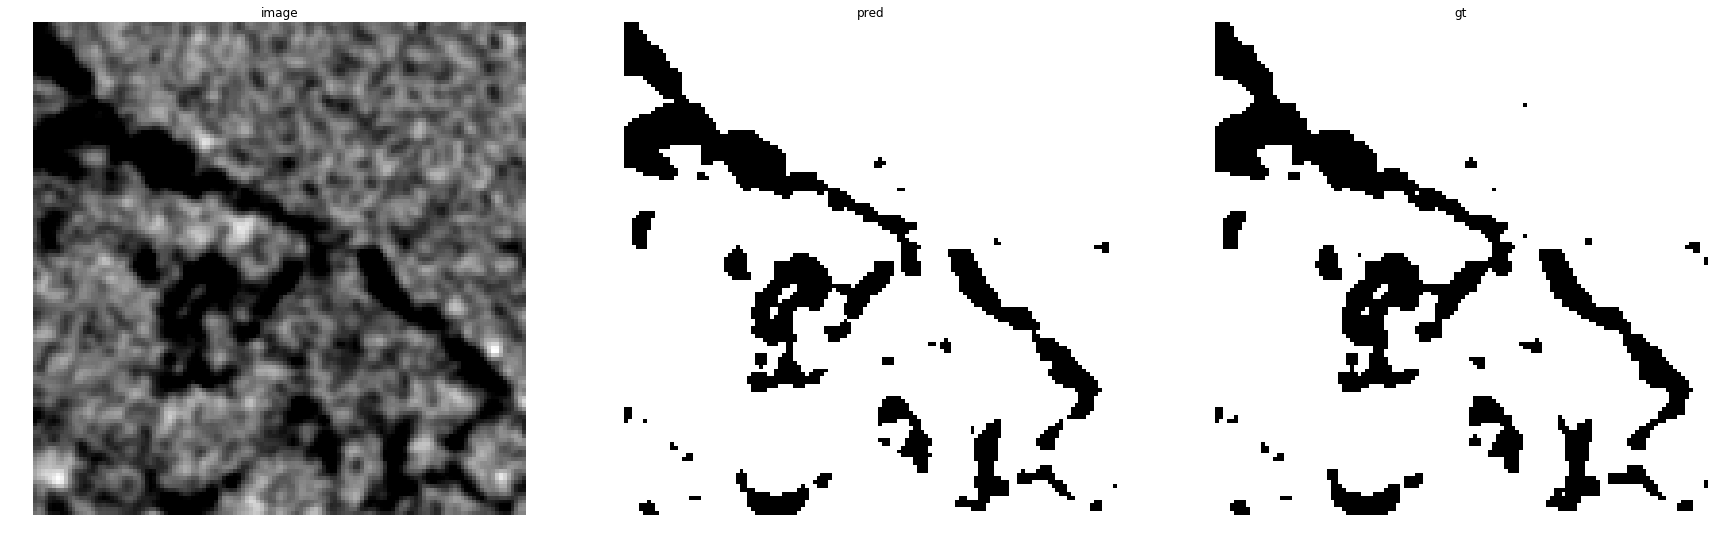

accuracy    : 0.98516845703125
precision   : 0.9833297560277598
recall      : 0.9992729387814454
f1          : 0.9912372435180845
pr_auc      : 0.9998505629791226
iou         : 0.9826267248159005


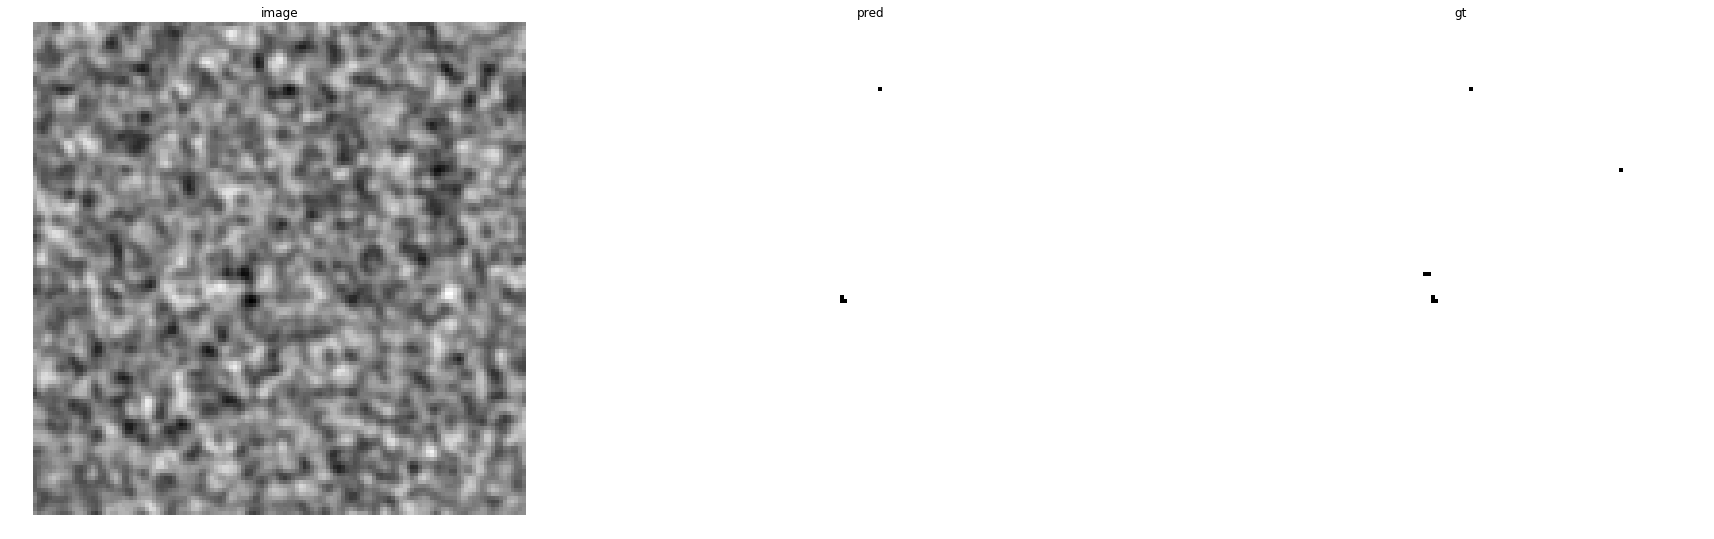

accuracy    : 0.99981689453125
precision   : 0.9998168498168498
recall      : 1.0
f1          : 0.9999084165216595
pr_auc      : 0.9999999850856423
iou         : 0.9998168498168498


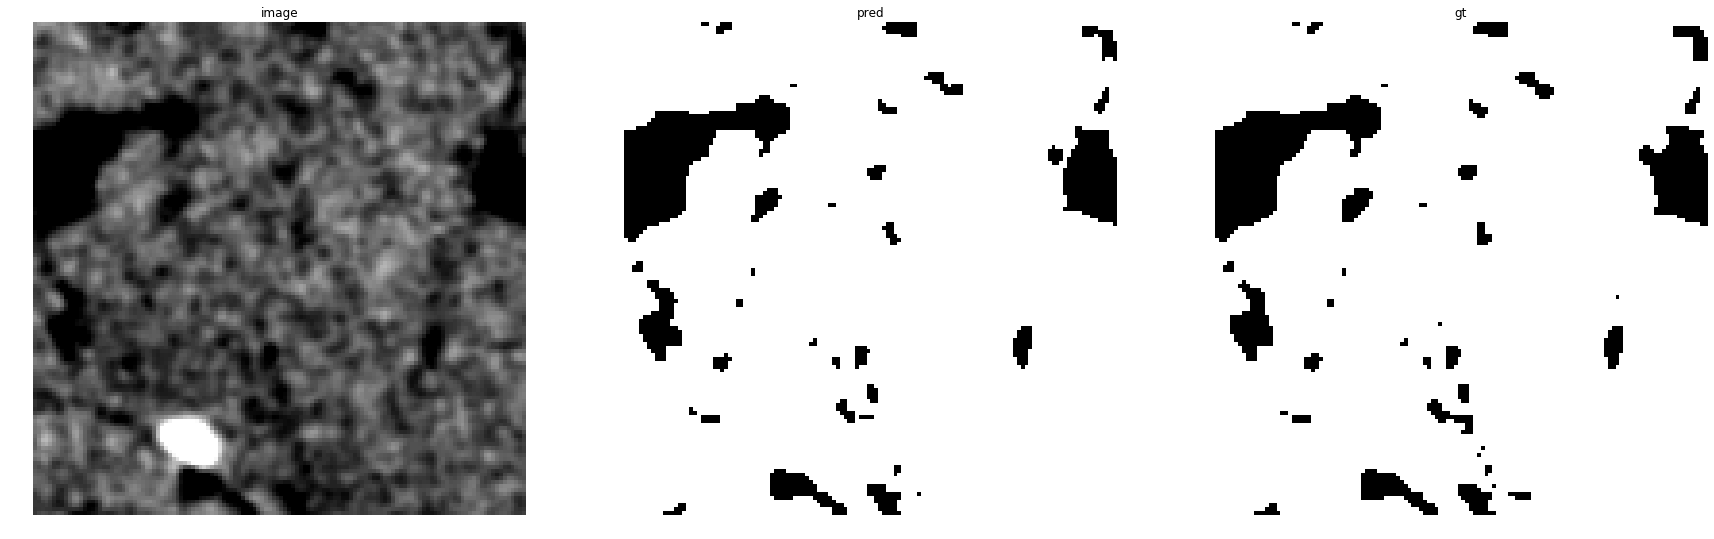

accuracy    : 0.99163818359375
precision   : 0.9915920802820721
recall      : 0.9991118398578944
f1          : 0.9953377573591968
pr_auc      : 0.9999367094048265
iou         : 0.9907187859901091


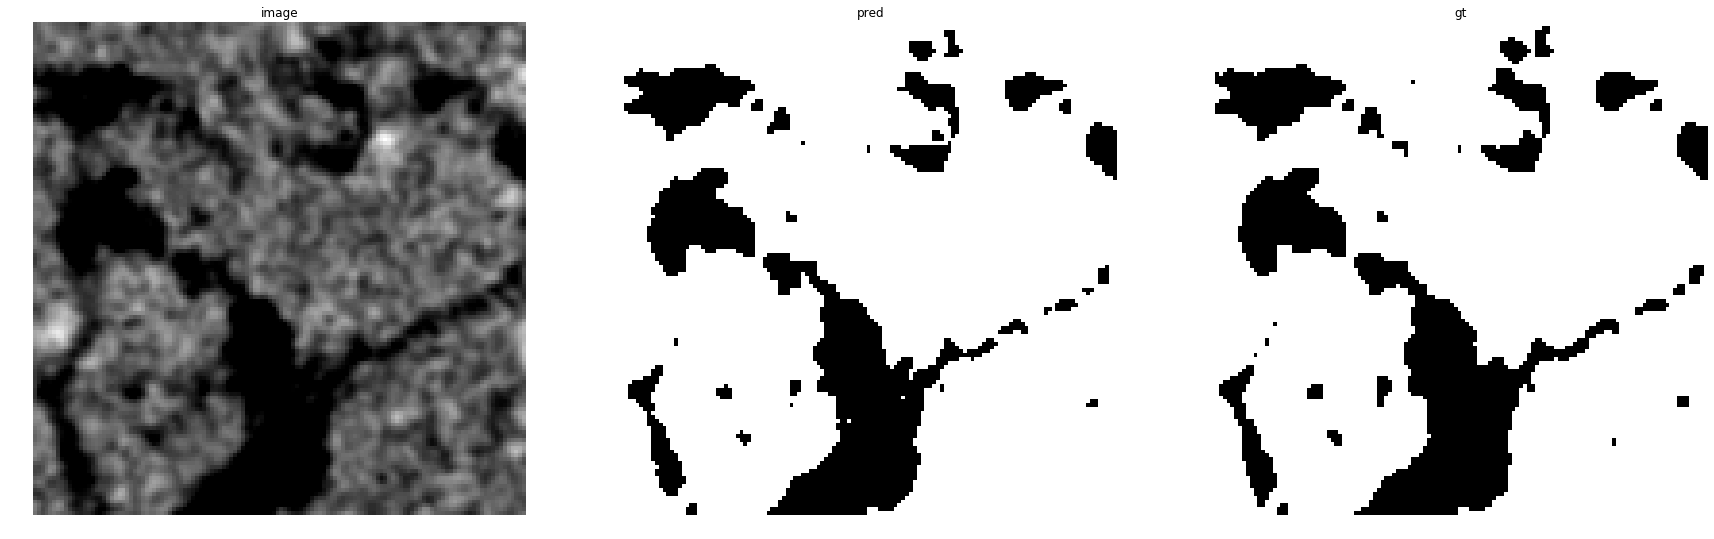

accuracy    : 0.984375
precision   : 0.9813273340832396
recall      : 0.9994653631711602
f1          : 0.9903133040714395
pr_auc      : 0.9998467164649991
iou         : 0.9808124718932694


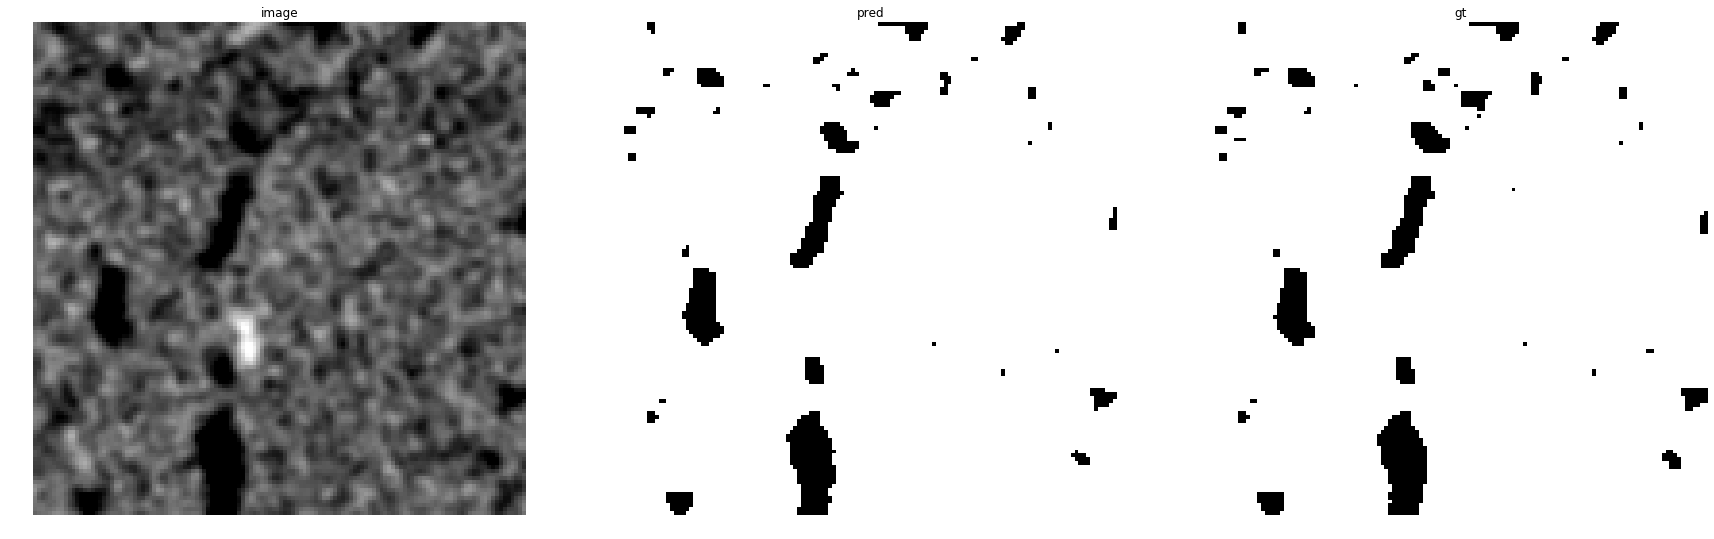

accuracy    : 0.9951171875
precision   : 0.9952276538114279
recall      : 0.9996113486202876
f1          : 0.9974146845915202
pr_auc      : 0.9999753743988112
iou         : 0.9948427024239299


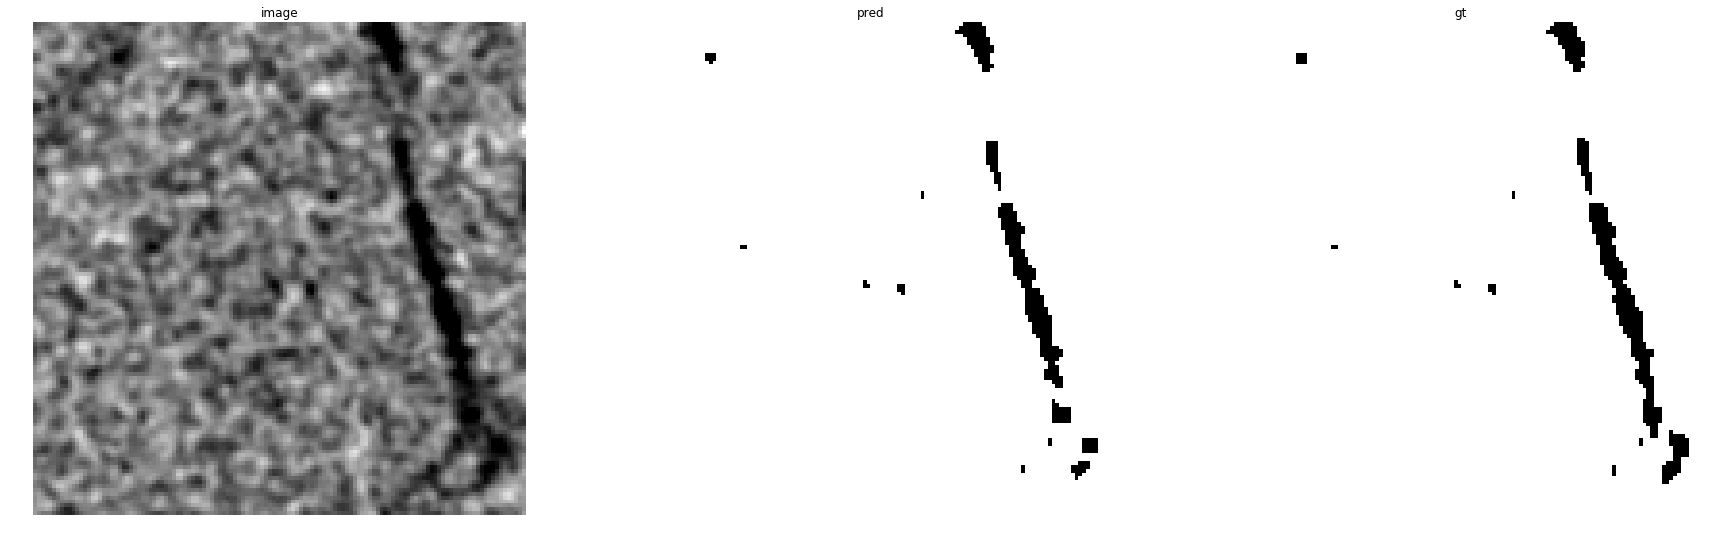

accuracy    : 0.99566650390625
precision   : 0.9956252734204112
recall      : 0.9999372332412754
f1          : 0.9977765947452478
pr_auc      : 0.9999827452317662
iou         : 0.9955630546181727


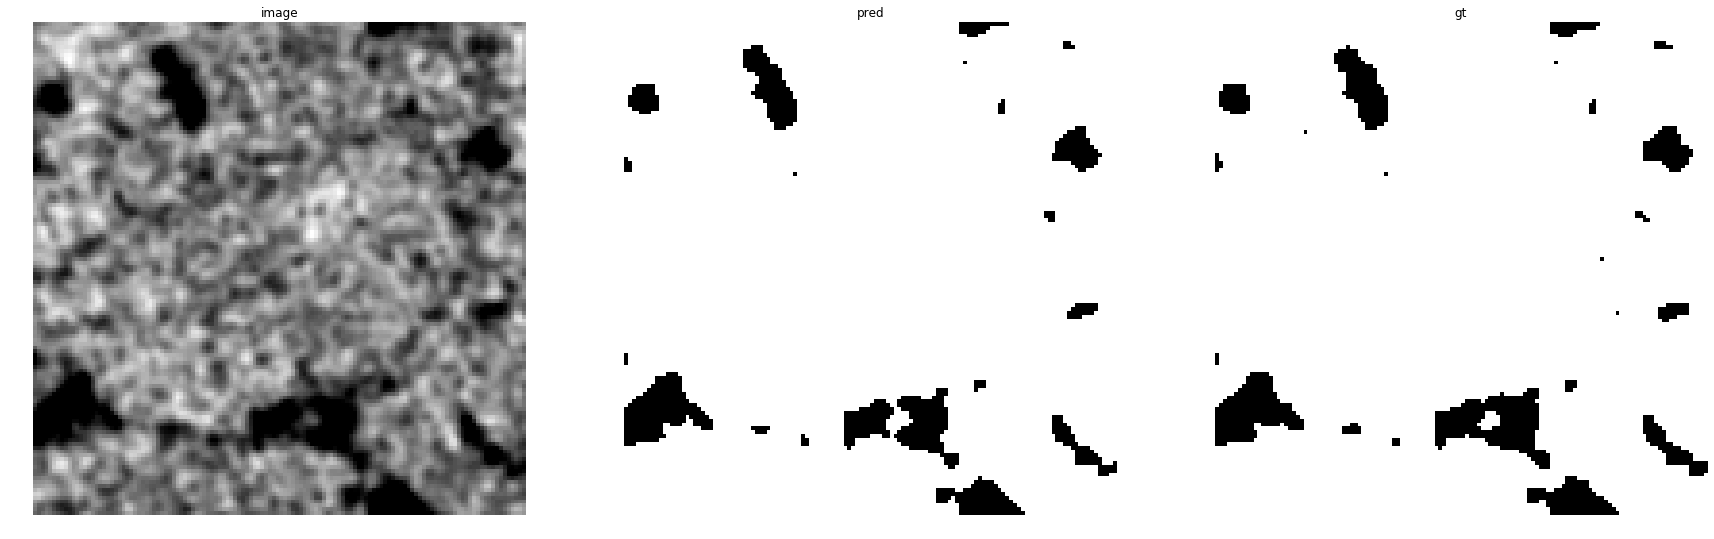

accuracy    : 0.99273681640625
precision   : 0.9927217887351649
recall      : 0.9994718774755743
f1          : 0.9960853975459718
pr_auc      : 0.9999774726511158
iou         : 0.9922013238088997


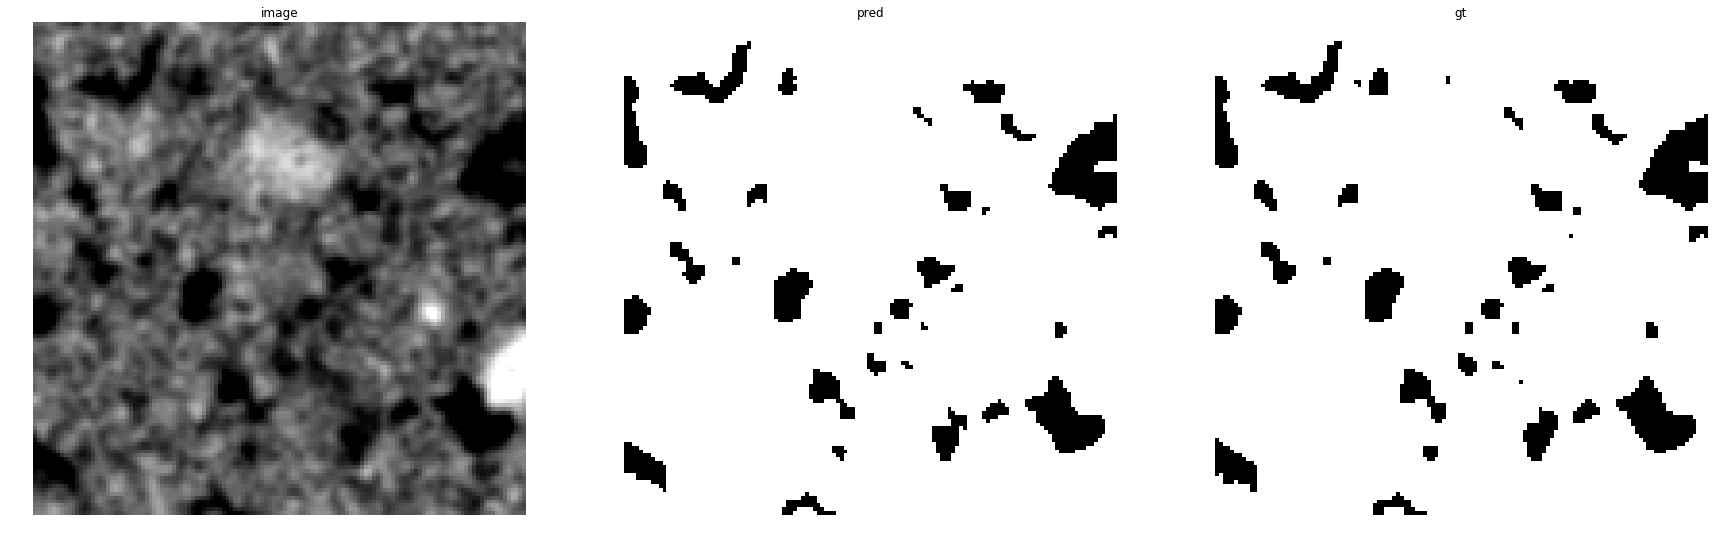

accuracy    : 0.9913330078125
precision   : 0.9911968281701499
recall      : 0.9992547930357022
f1          : 0.9952095000337359
pr_auc      : 0.9999578514365864
iou         : 0.9904646790222938


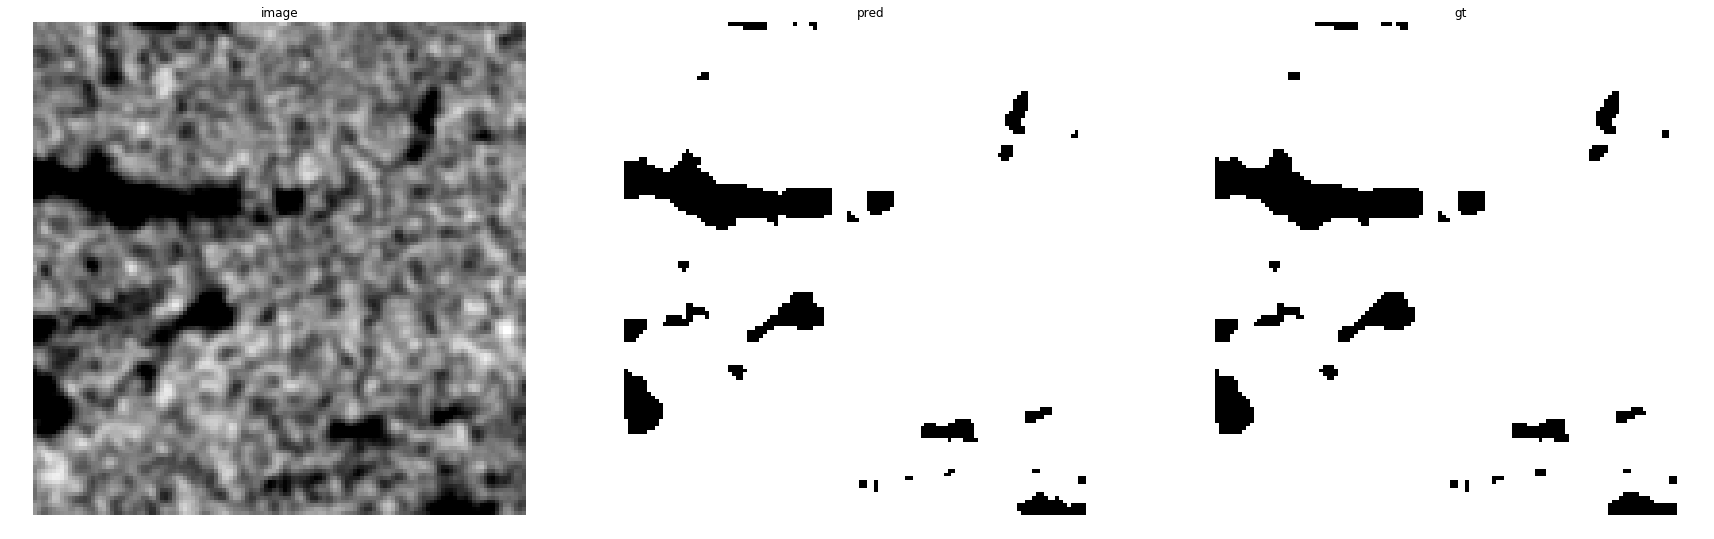

accuracy    : 0.99542236328125
precision   : 0.9955412759819028
recall      : 0.9995391705069124
f1          : 0.9975362176012614
pr_auc      : 0.9999871938538523
iou         : 0.995084545812033


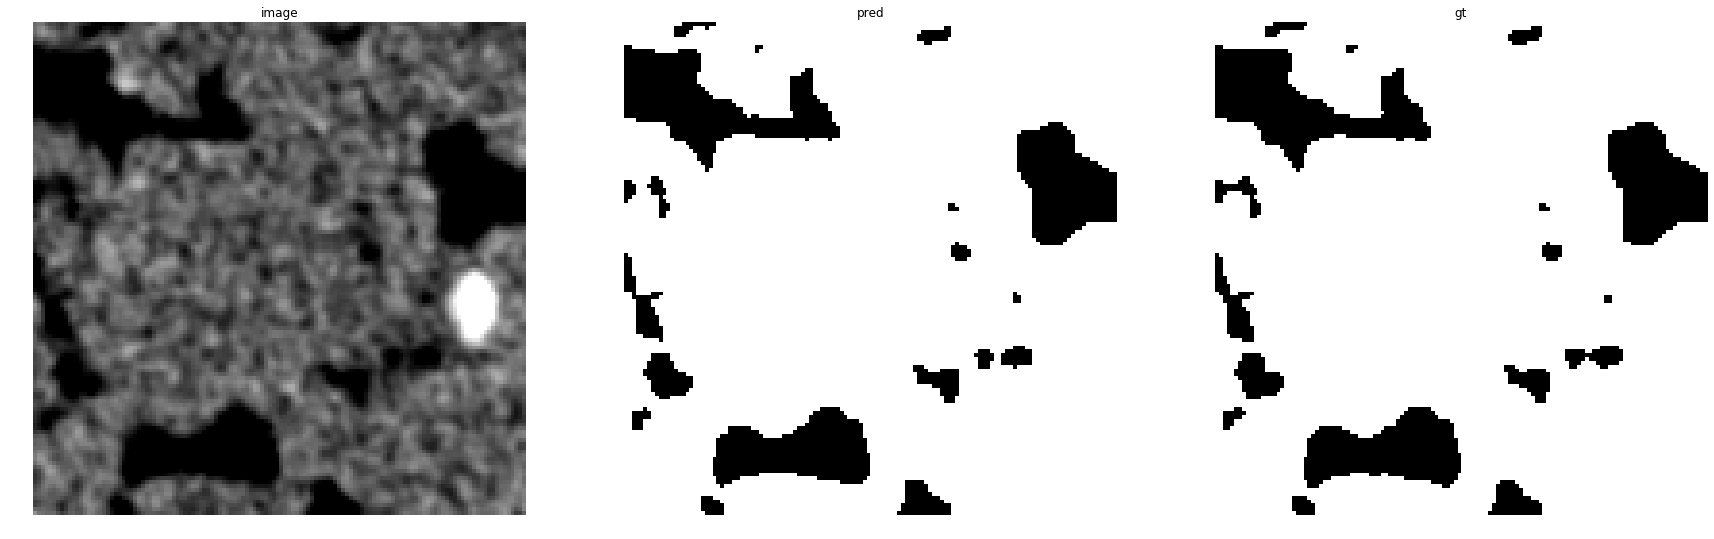

accuracy    : 0.99334716796875
precision   : 0.9929678530424799
recall      : 0.9992057188244639
f1          : 0.9960770199748066
pr_auc      : 0.9999587596226182
iou         : 0.99218469921847


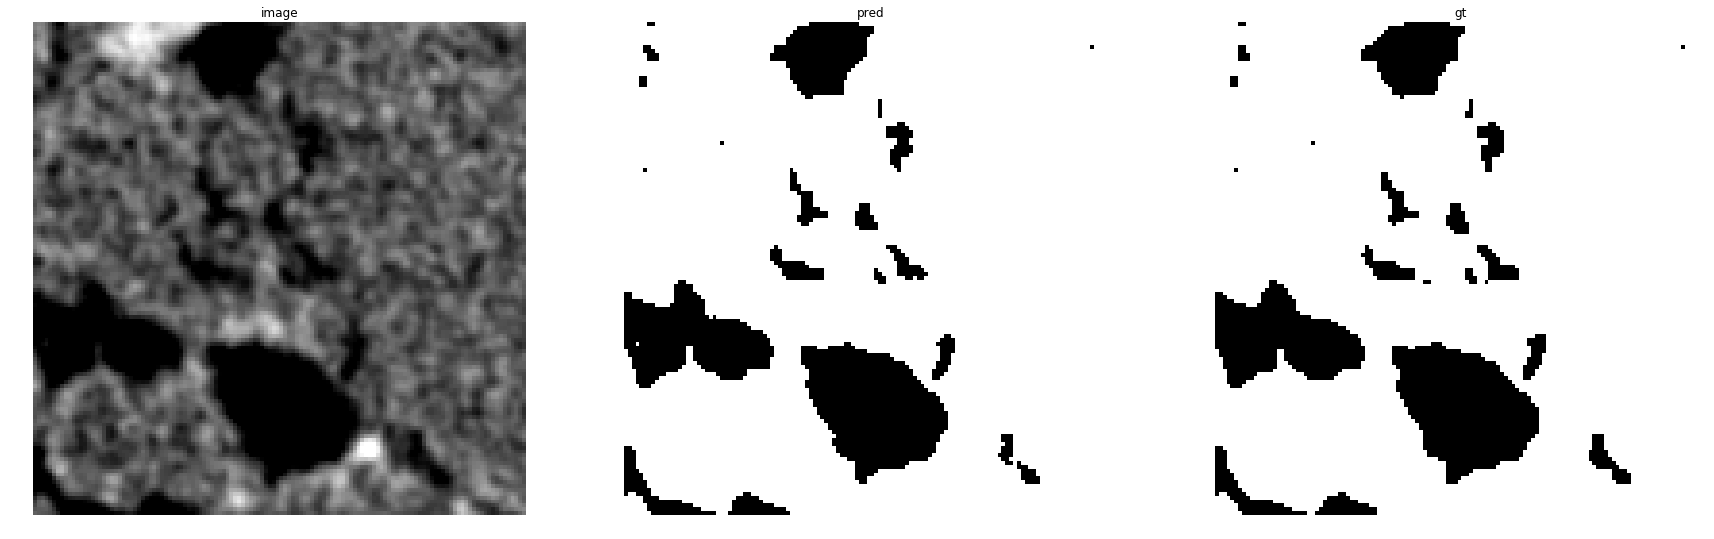

accuracy    : 0.99298095703125
precision   : 0.9931418774110587
recall      : 0.9986351555204368
f1          : 0.995880941294459
pr_auc      : 0.9999615186605257
iou         : 0.9917956766783191


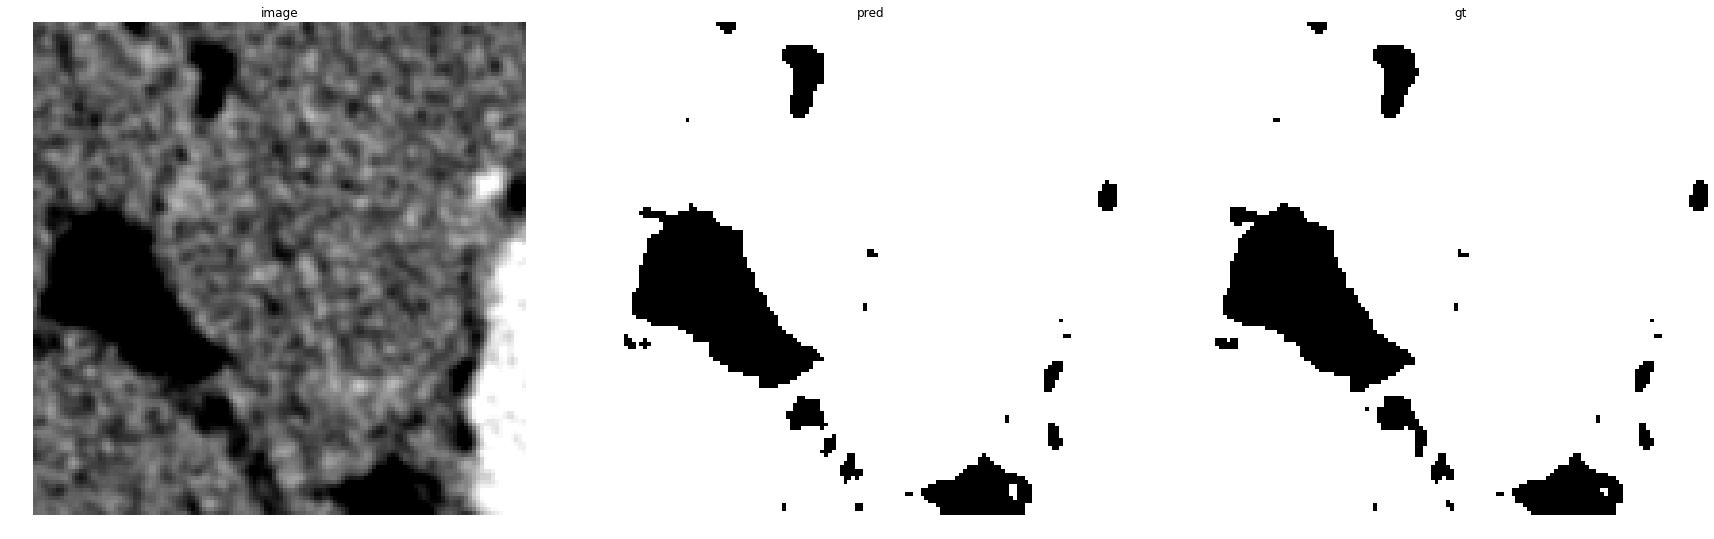

accuracy    : 0.99407958984375
precision   : 0.9940869086908691
recall      : 0.9992397539567351
f1          : 0.9966566711474167
pr_auc      : 0.9999768961679613
iou         : 0.99333562349708


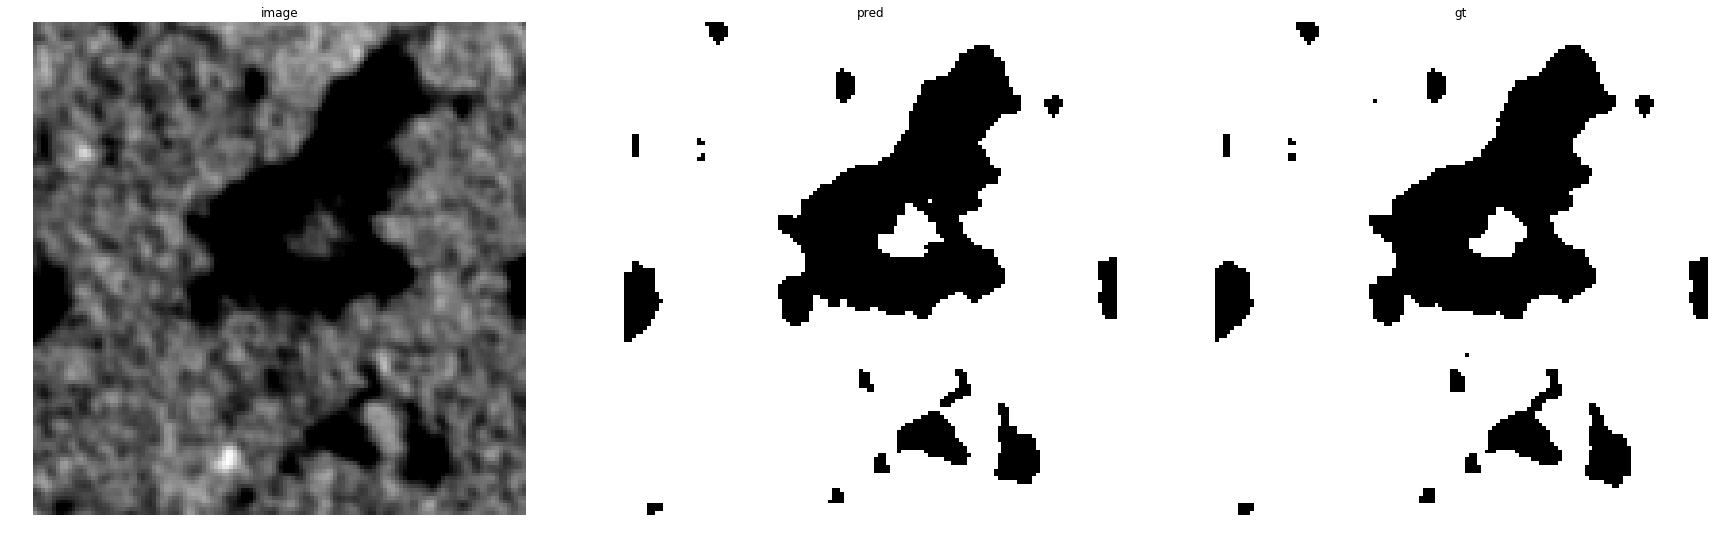

accuracy    : 0.99249267578125
precision   : 0.9916292974588938
recall      : 0.999171624369305
f1          : 0.9953861735248883
pr_auc      : 0.9999608576895098
iou         : 0.9908147263087148


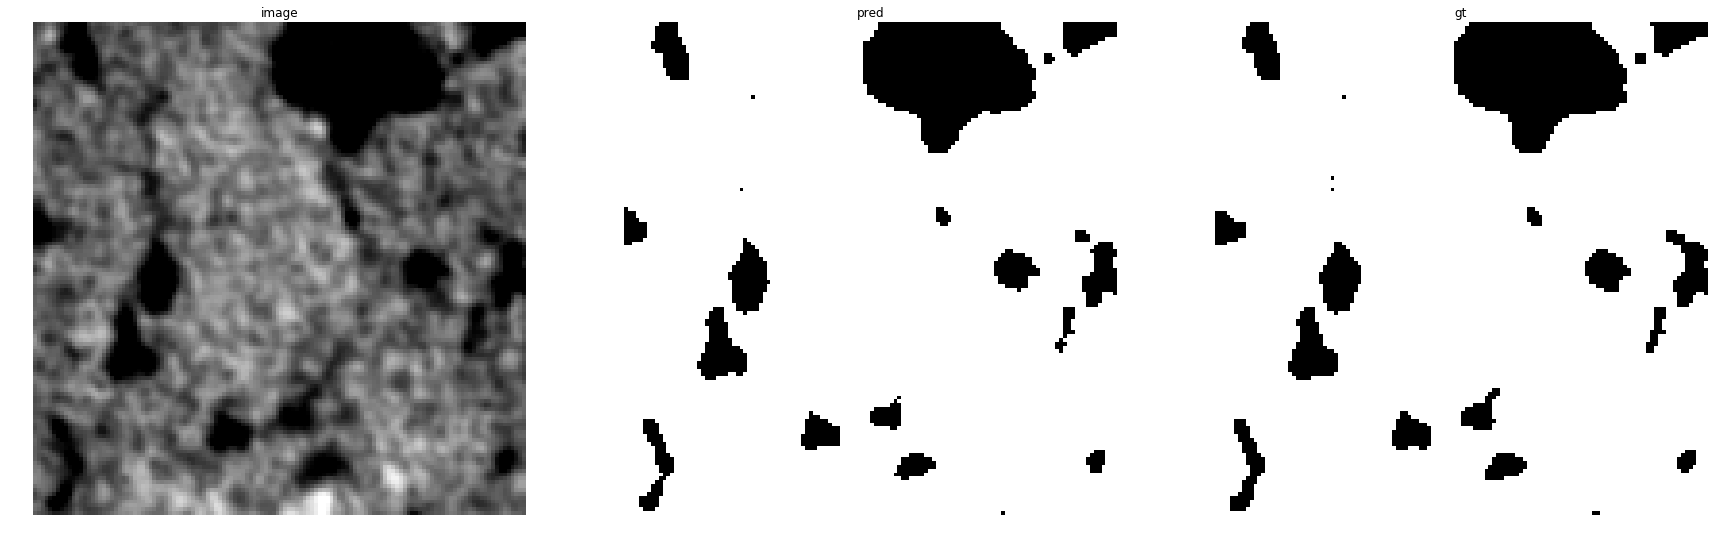

accuracy    : 0.9930419921875
precision   : 0.9925910393513665
recall      : 0.9994369765641495
f1          : 0.996002244354047
pr_auc      : 0.9999702624055926
iou         : 0.9920363255326581


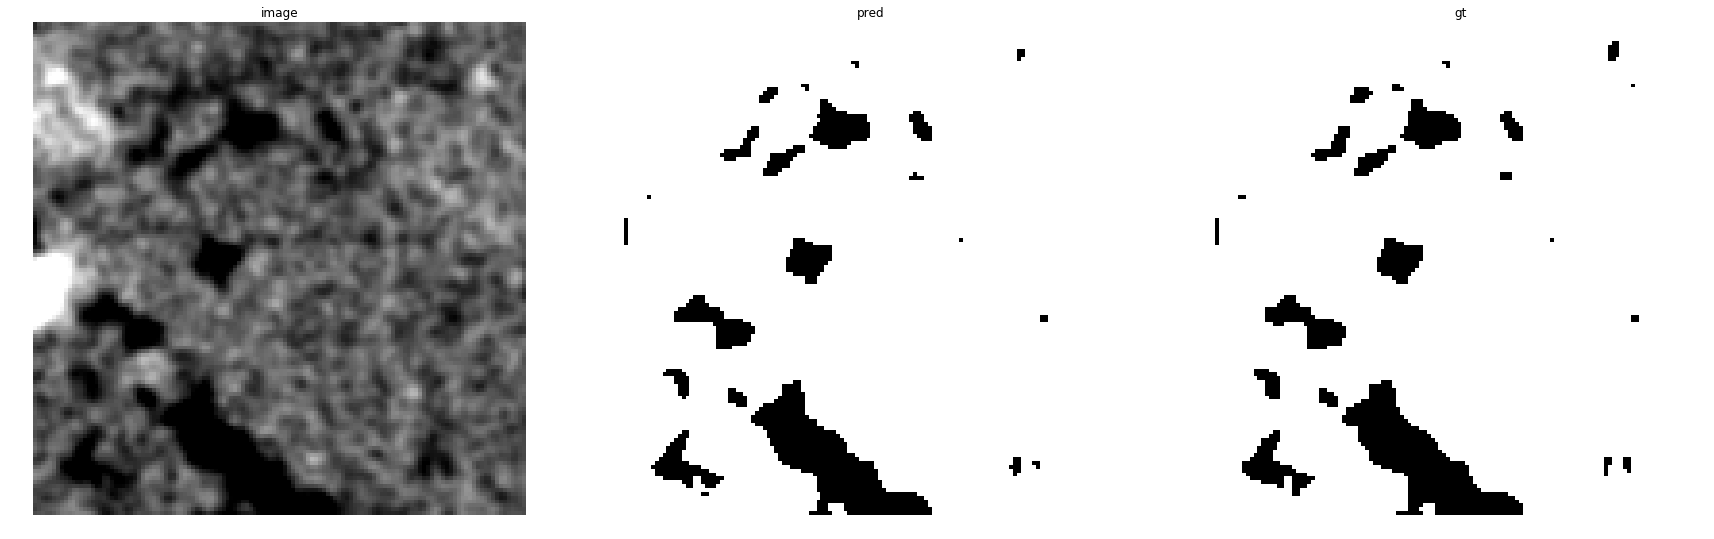

accuracy    : 0.99359130859375
precision   : 0.9941098610191926
recall      : 0.9989359579703398
f1          : 0.9965170663747636
pr_auc      : 0.9999747858097741
iou         : 0.9930583101943673


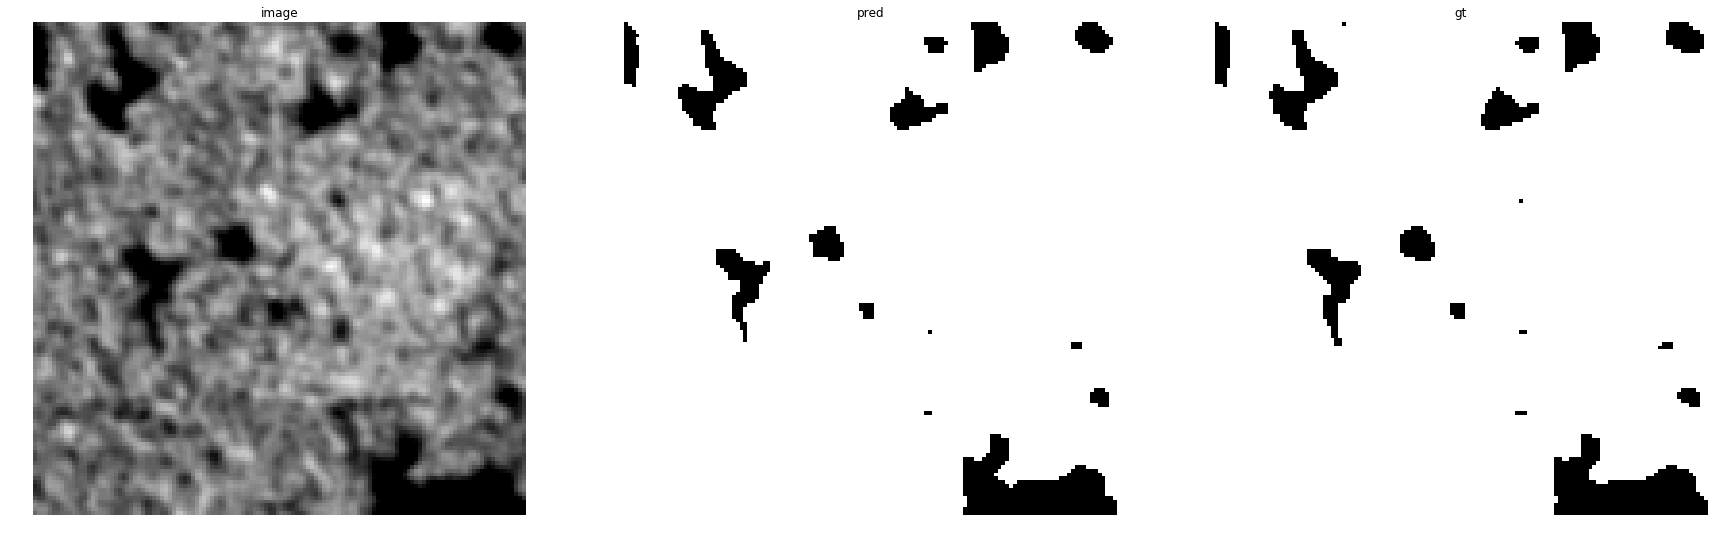

accuracy    : 0.9952392578125
precision   : 0.9956570375732052
recall      : 0.9992075546457109
f1          : 0.9974291364535267
pr_auc      : 0.9999882110951853
iou         : 0.9948714576895259


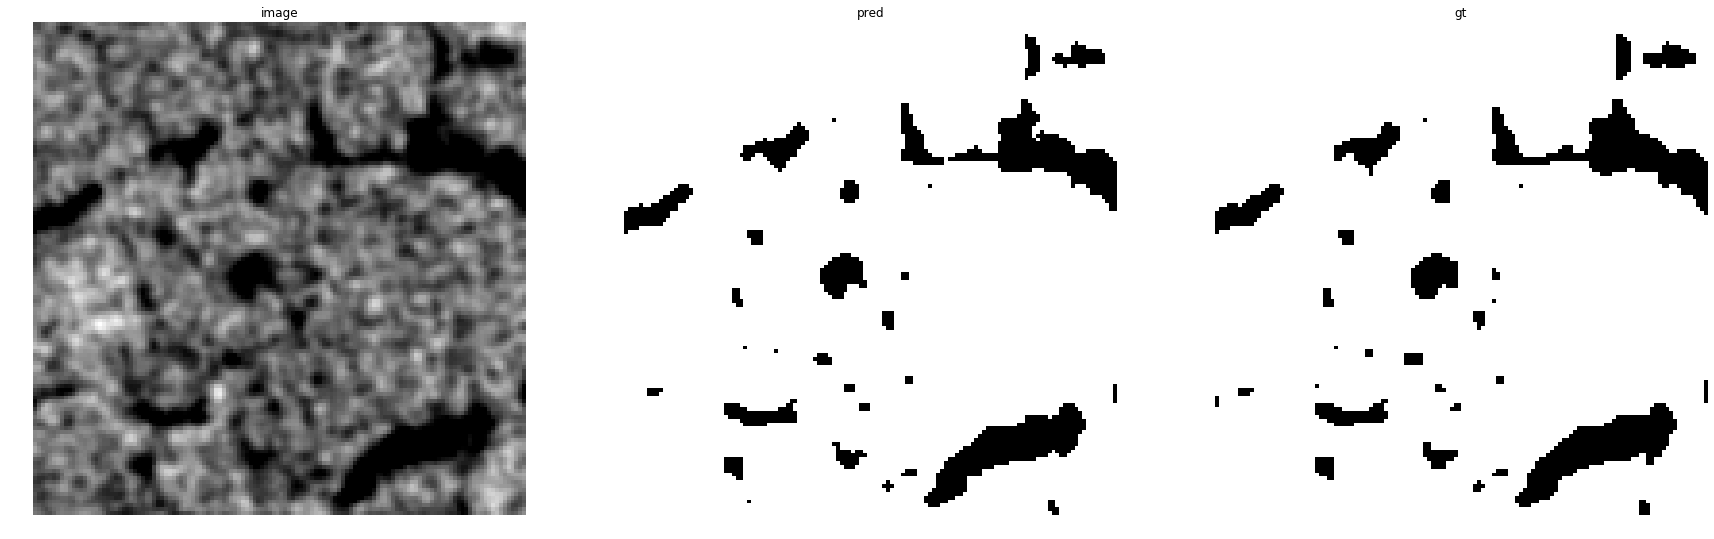

accuracy    : 0.9913330078125
precision   : 0.9913804713804714
recall      : 0.9990499457111836
f1          : 0.995200432637058
pr_auc      : 0.9999431743662144
iou         : 0.9904467168998924


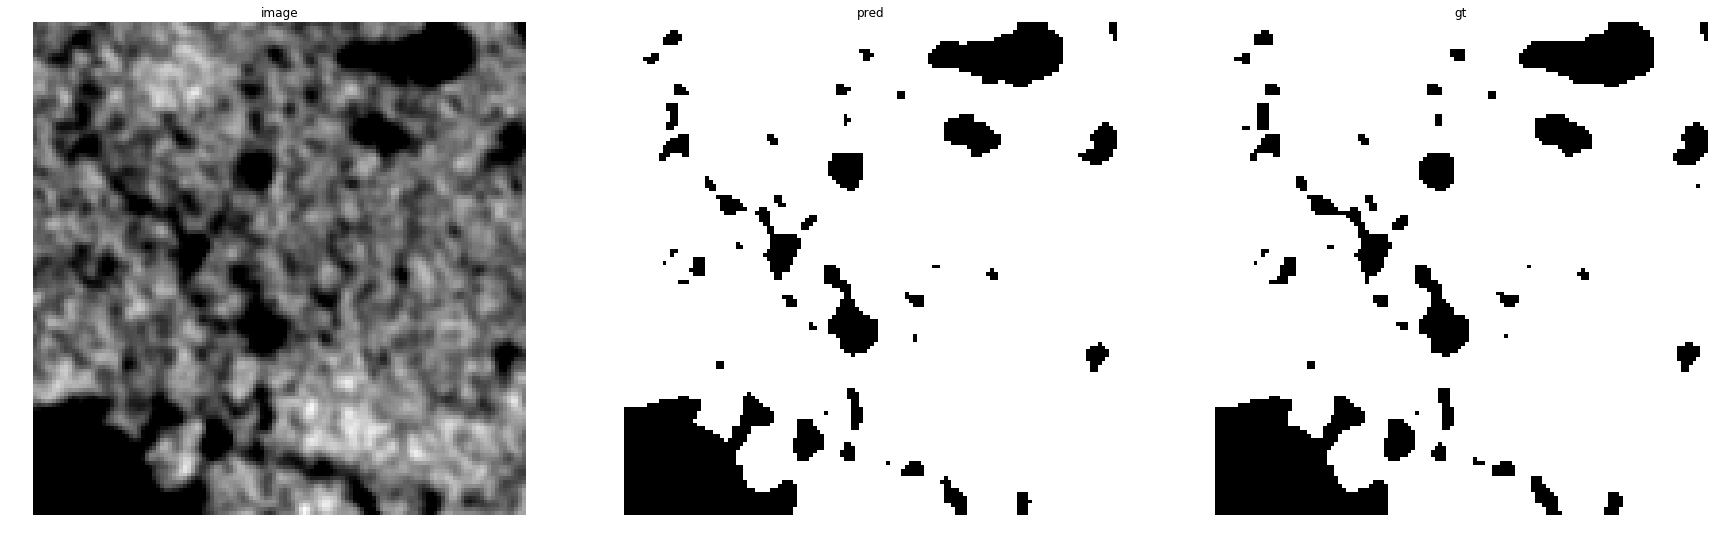

accuracy    : 0.9912109375
precision   : 0.9909858755057137
recall      : 0.9987838901208956
f1          : 0.9948696023941855
pr_auc      : 0.9999388992046487
iou         : 0.9897915780518928


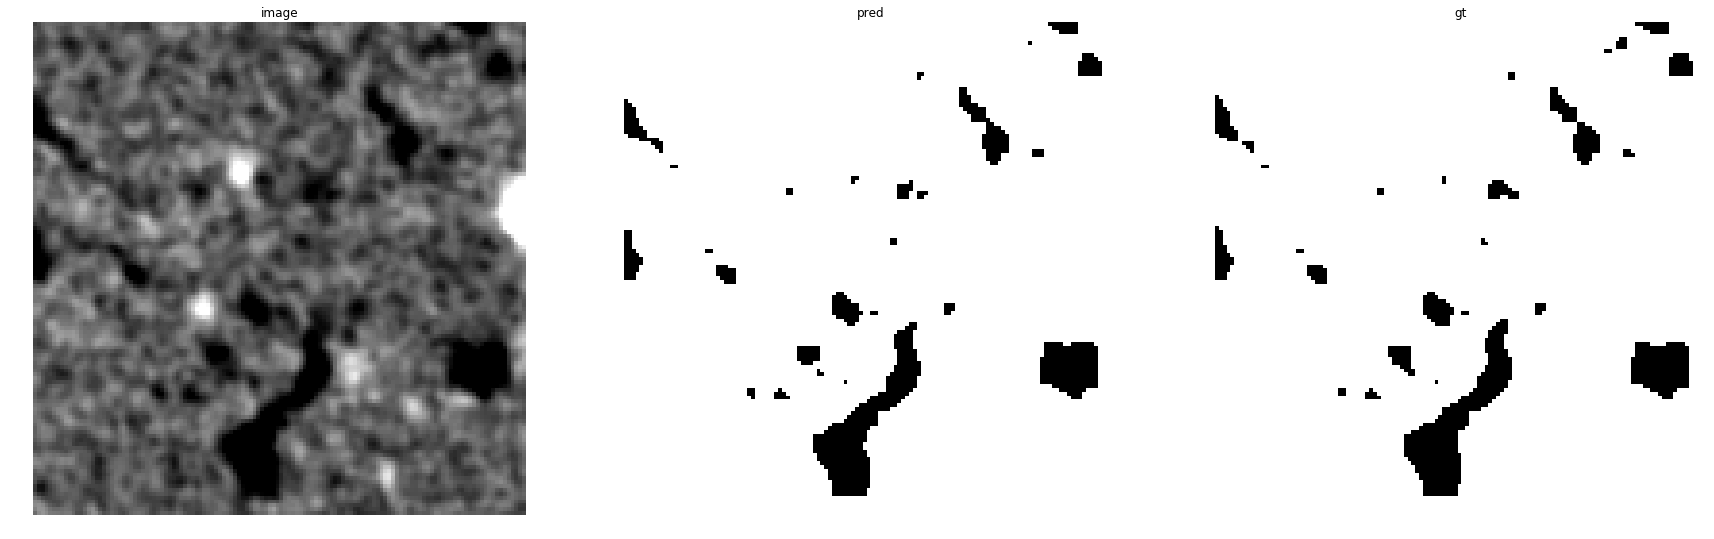

accuracy    : 0.9954833984375
precision   : 0.9960415314730694
recall      : 0.9991537560213514
f1          : 0.9975952164305213
pr_auc      : 0.9999818666022919
iou         : 0.99520197108215


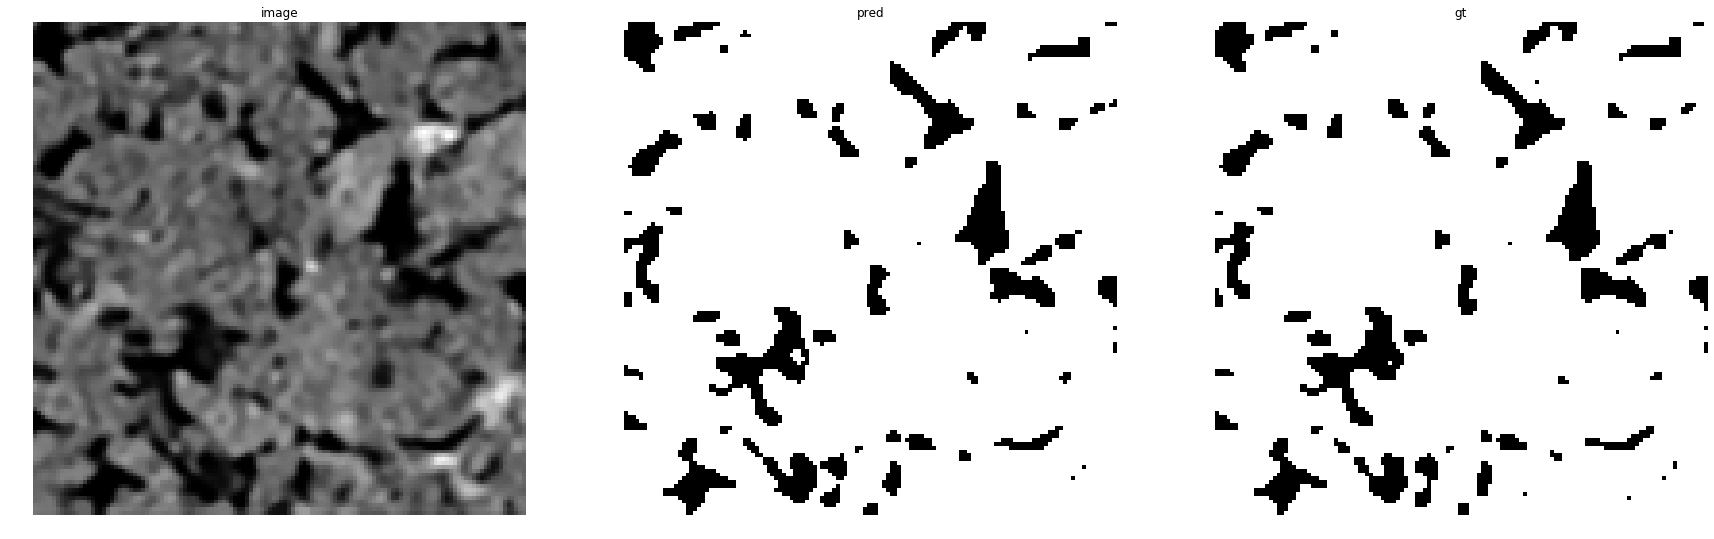

accuracy    : 0.99078369140625
precision   : 0.9959013546370268
recall      : 0.9936235098419739
f1          : 0.9947611282656212
pr_auc      : 0.9999026462386102
iou         : 0.9895768620142197


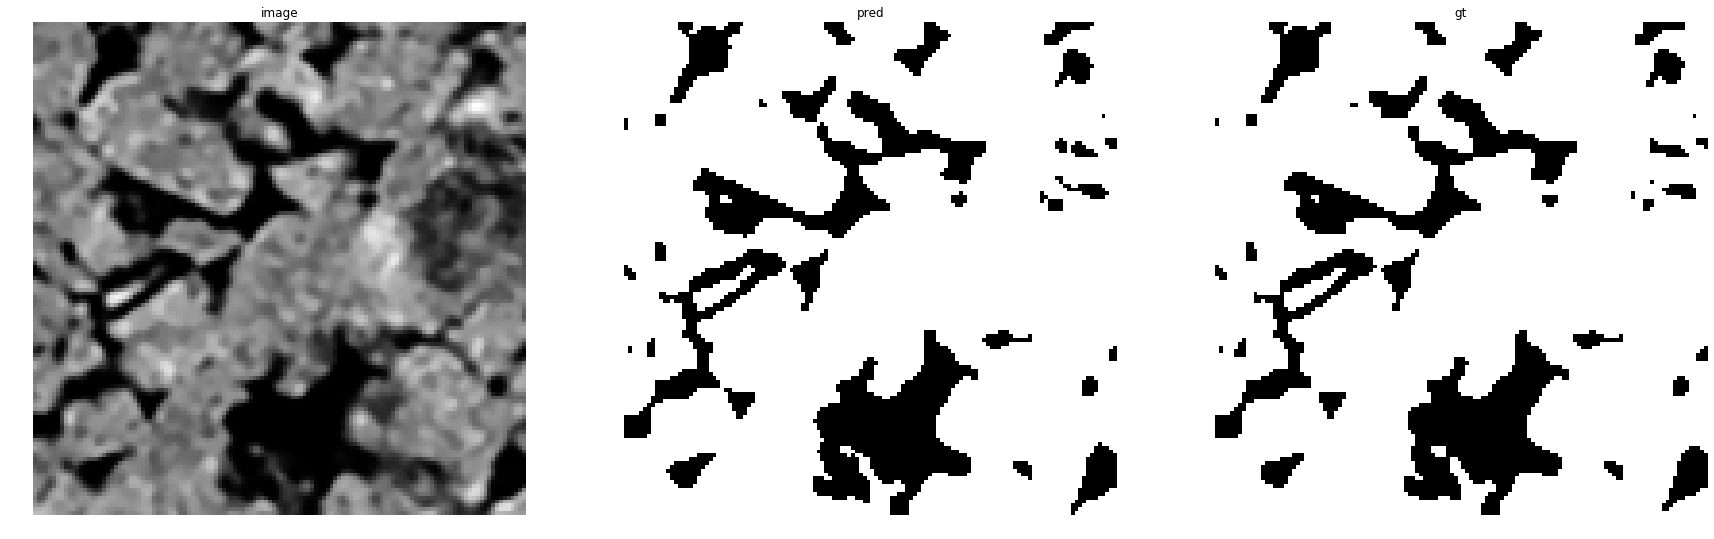

accuracy    : 0.9903564453125
precision   : 0.9960772480386241
recall      : 0.9920360631104432
f1          : 0.9940525483700972
pr_auc      : 0.9999013726480774
iou         : 0.9881754228408921


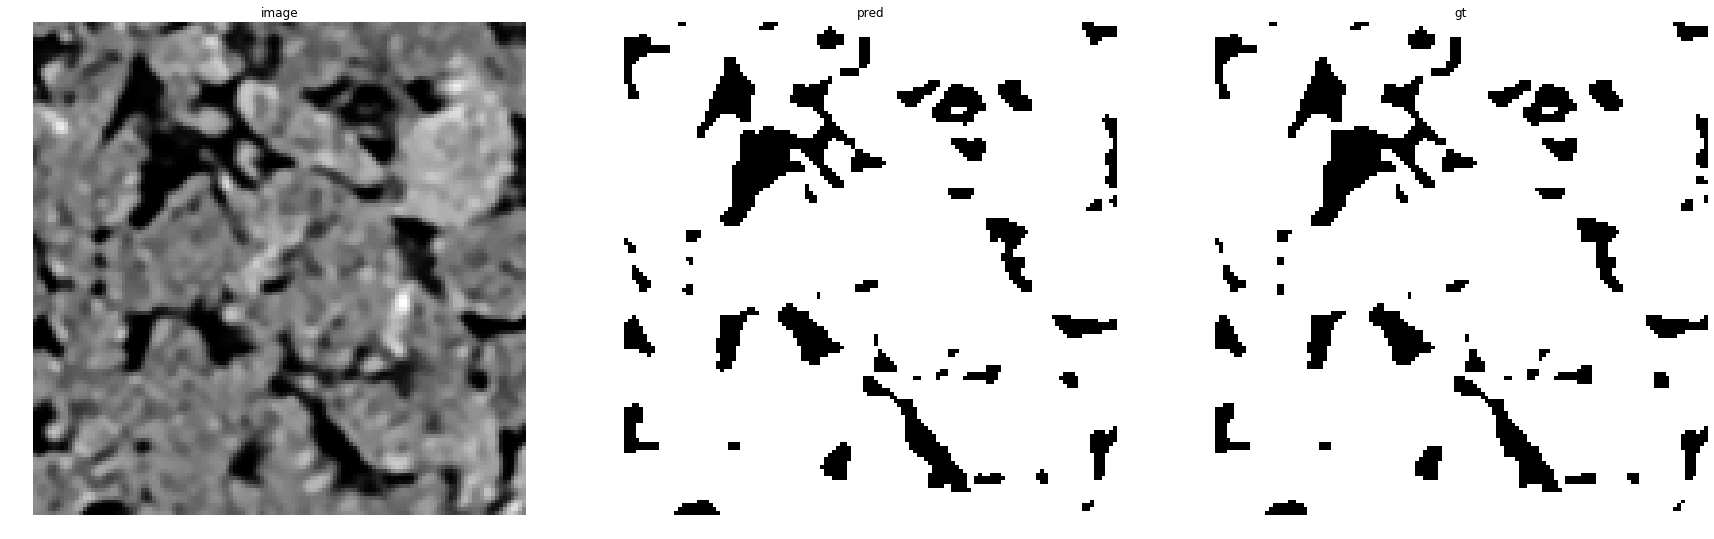

accuracy    : 0.9921875
precision   : 0.9965703086722195
recall      : 0.9944820842355242
f1          : 0.9955251013844217
pr_auc      : 0.9999369784836868
iou         : 0.9910900737853264


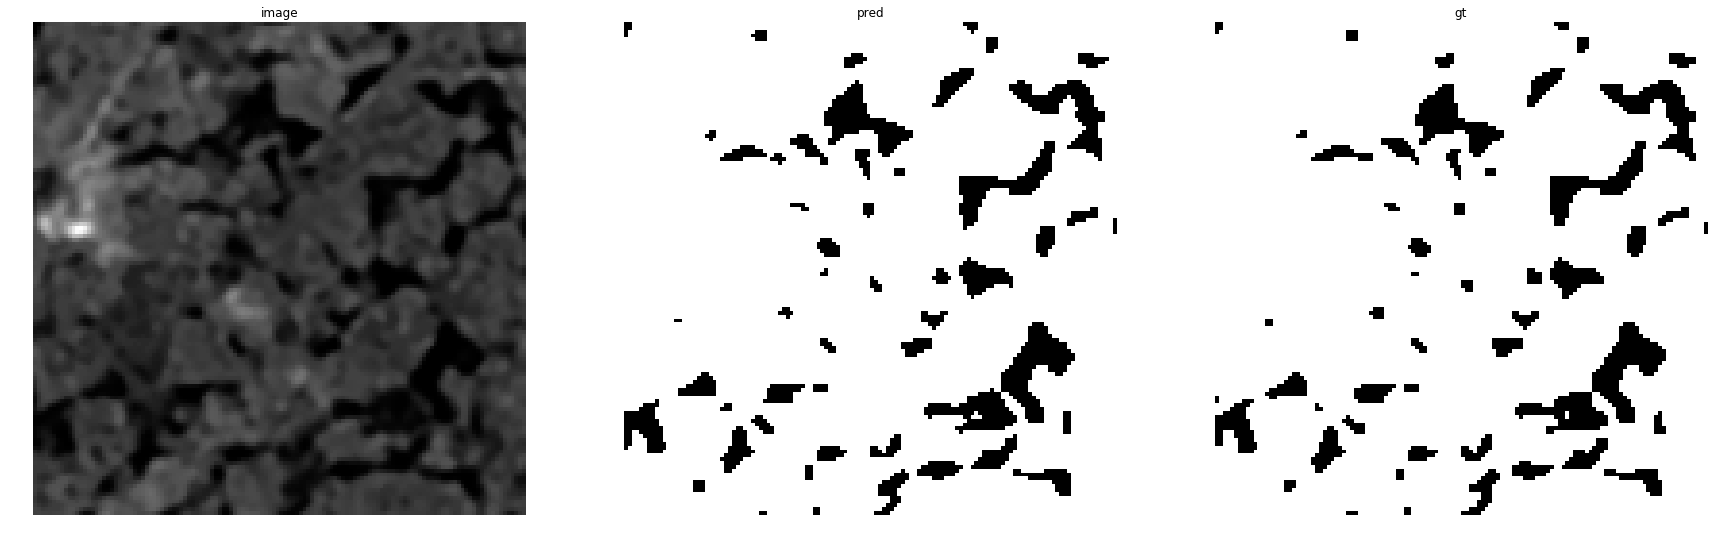

accuracy    : 0.990234375
precision   : 0.9949543820846005
recall      : 0.9939925424665101
f1          : 0.9944732297063904
pr_auc      : 0.999913788085597
iou         : 0.9890072140158022


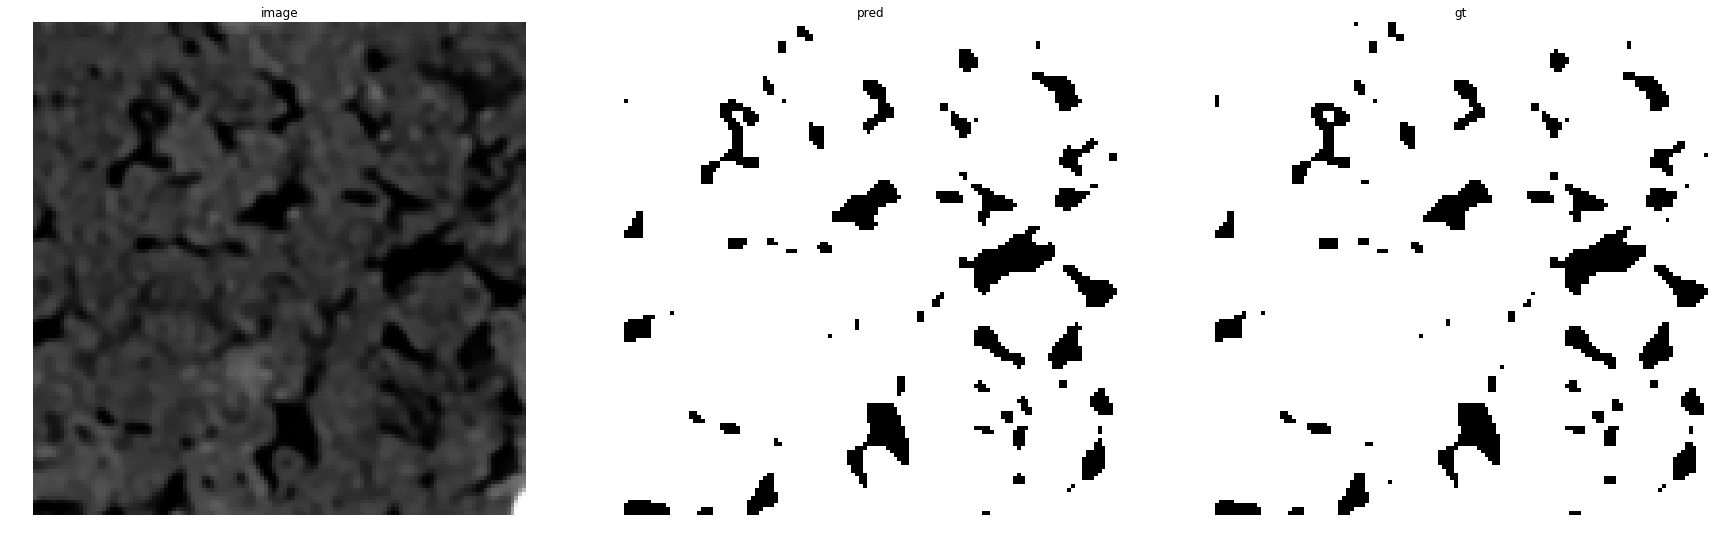

accuracy    : 0.9935302734375
precision   : 0.9973087532799569
recall      : 0.995567197259722
f1          : 0.9964372143049207
pr_auc      : 0.9999584627482607
iou         : 0.9928997253667359


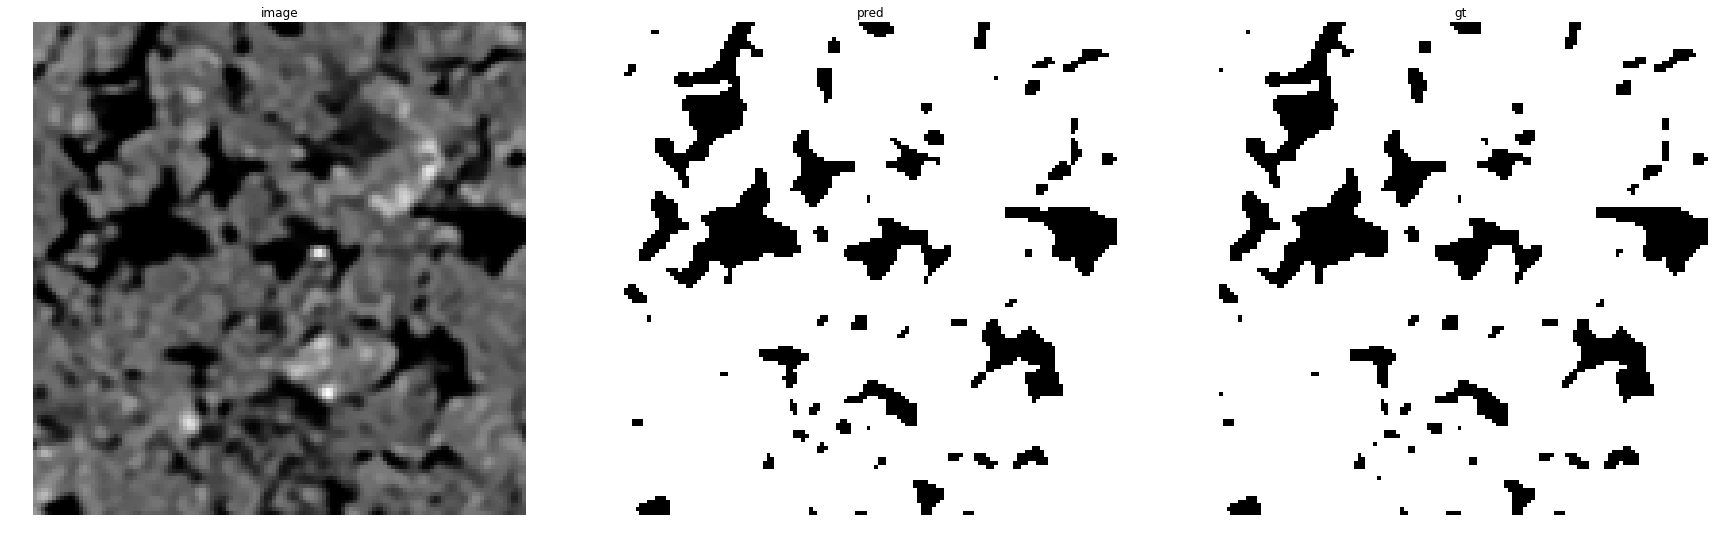

accuracy    : 0.990966796875
precision   : 0.9955574663227286
recall      : 0.9938483547925608
f1          : 0.9947021764032073
pr_auc      : 0.9999184662228746
iou         : 0.9894601908560035


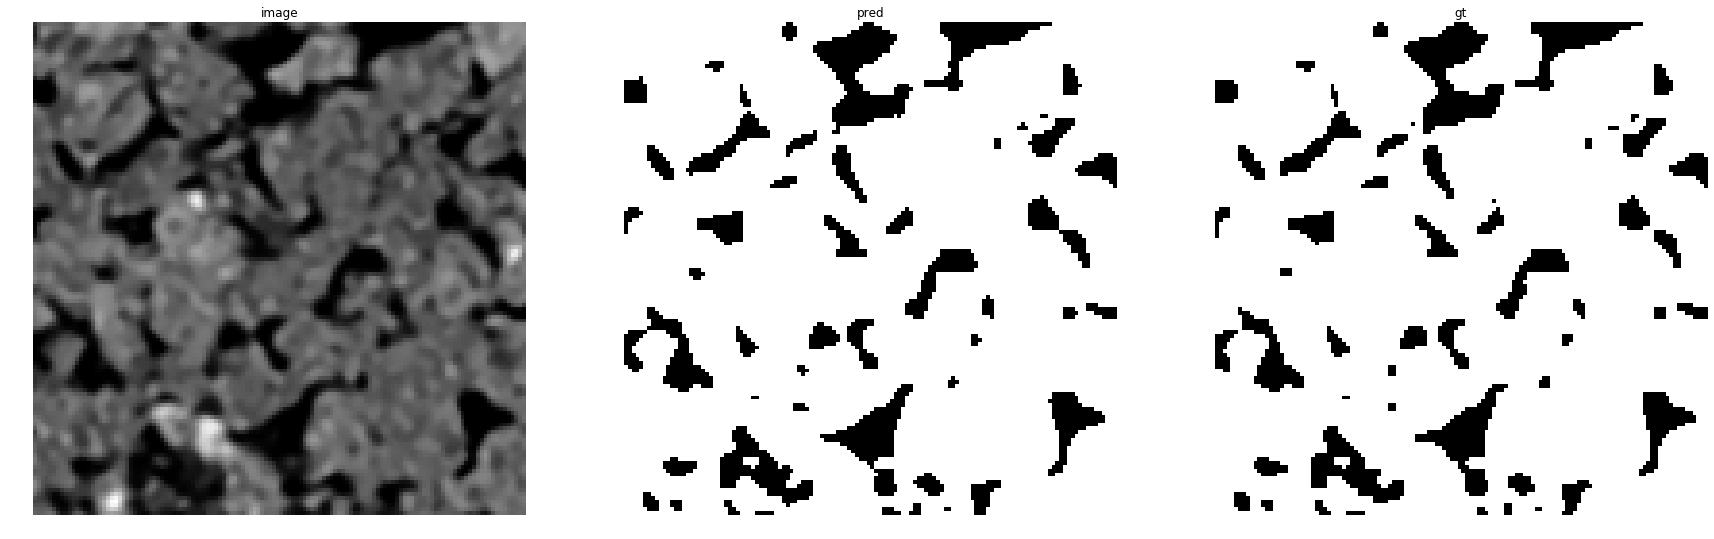

accuracy    : 0.99005126953125
precision   : 0.995614350420591
recall      : 0.9926881720430107
f1          : 0.9941491080081841
pr_auc      : 0.9999054433796176
iou         : 0.9883662836342874


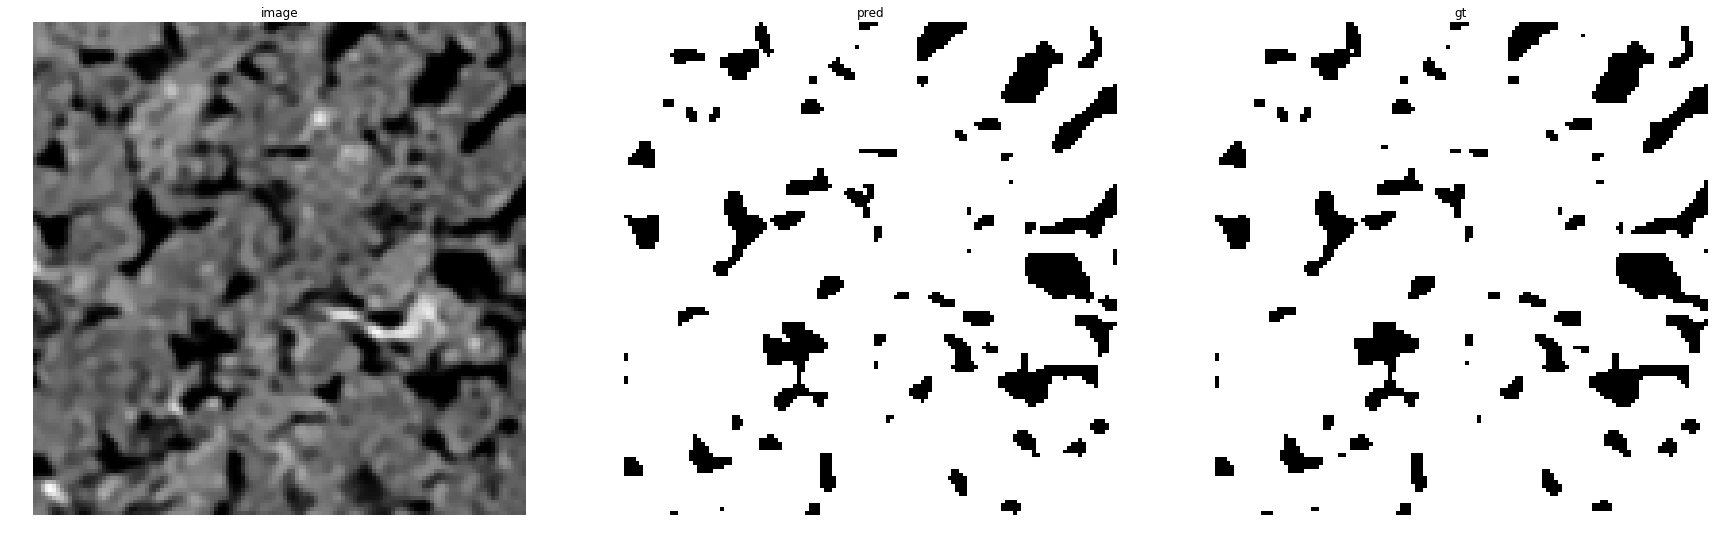

accuracy    : 0.99169921875
precision   : 0.9956758264751011
recall      : 0.9948432055749129
f1          : 0.9952593418851088
pr_auc      : 0.999922231120184
iou         : 0.990563419372745


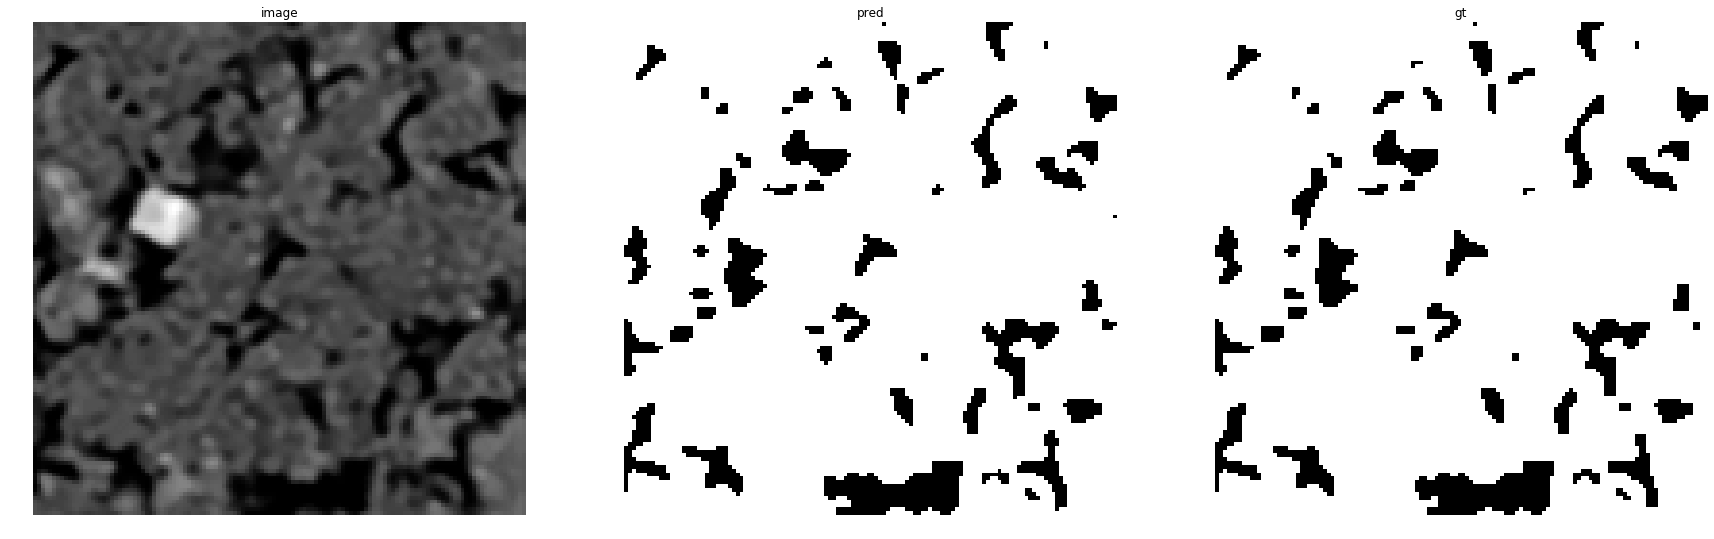

accuracy    : 0.99041748046875
precision   : 0.9954719609892023
recall      : 0.9936031150048672
f1          : 0.9945366600549814
pr_auc      : 0.9999104725360246
iou         : 0.9891326919083546


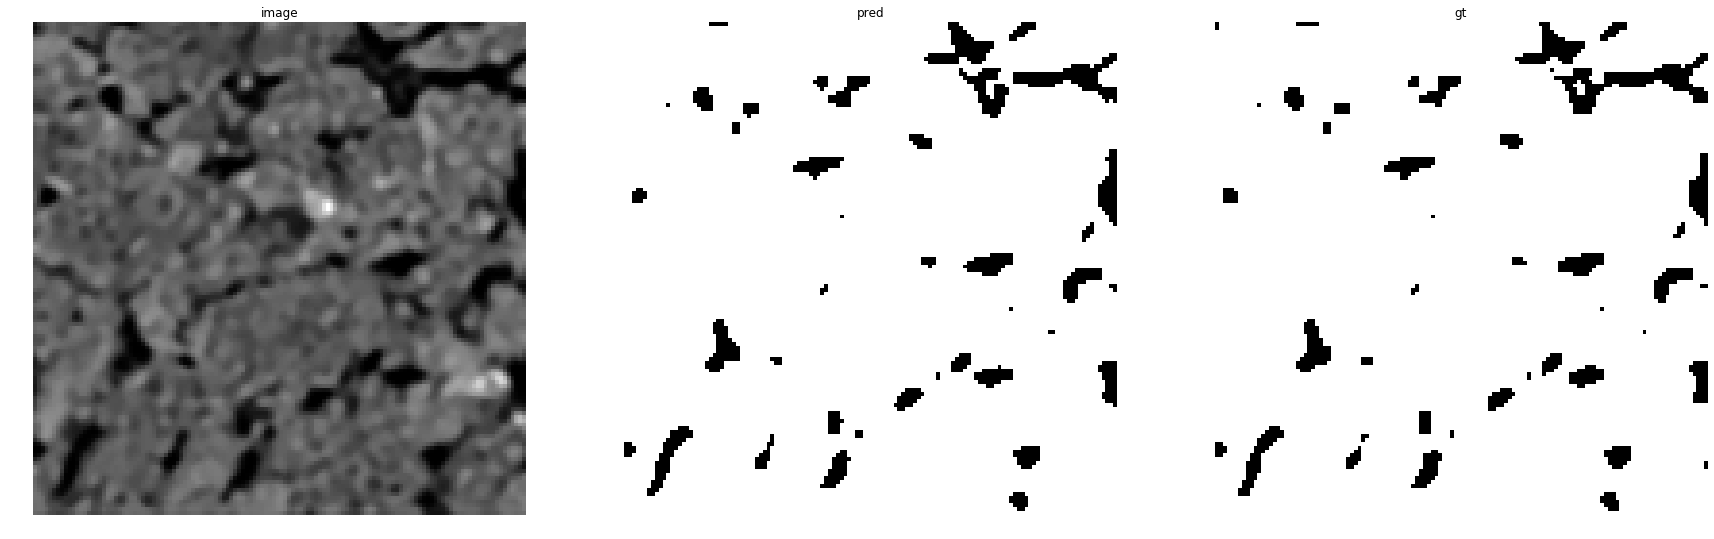

accuracy    : 0.9940185546875
precision   : 0.9971871524825014
recall      : 0.9964049937904438
f1          : 0.9967959197018242
pr_auc      : 0.9999676081601134
iou         : 0.9936123060878633


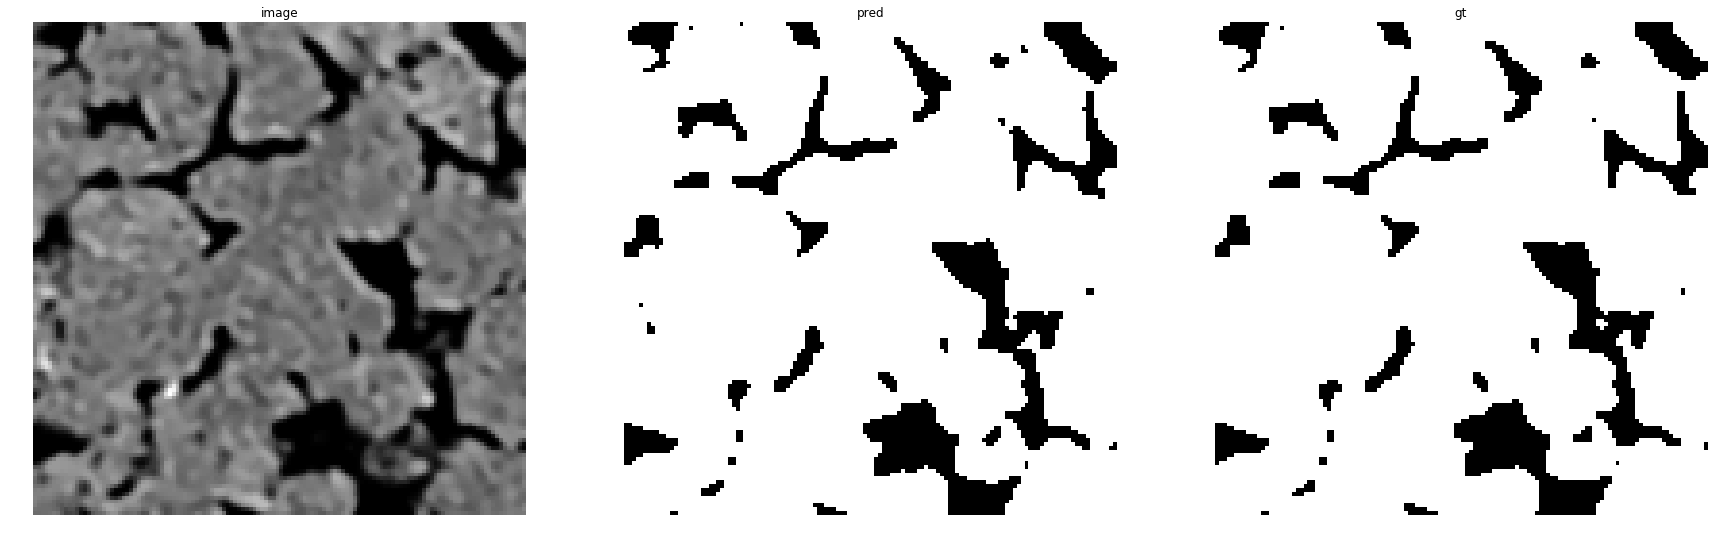

accuracy    : 0.99102783203125
precision   : 0.9962659773086313
recall      : 0.9931992268594746
f1          : 0.9947302383939775
pr_auc      : 0.999926795698078
iou         : 0.9895157264103844


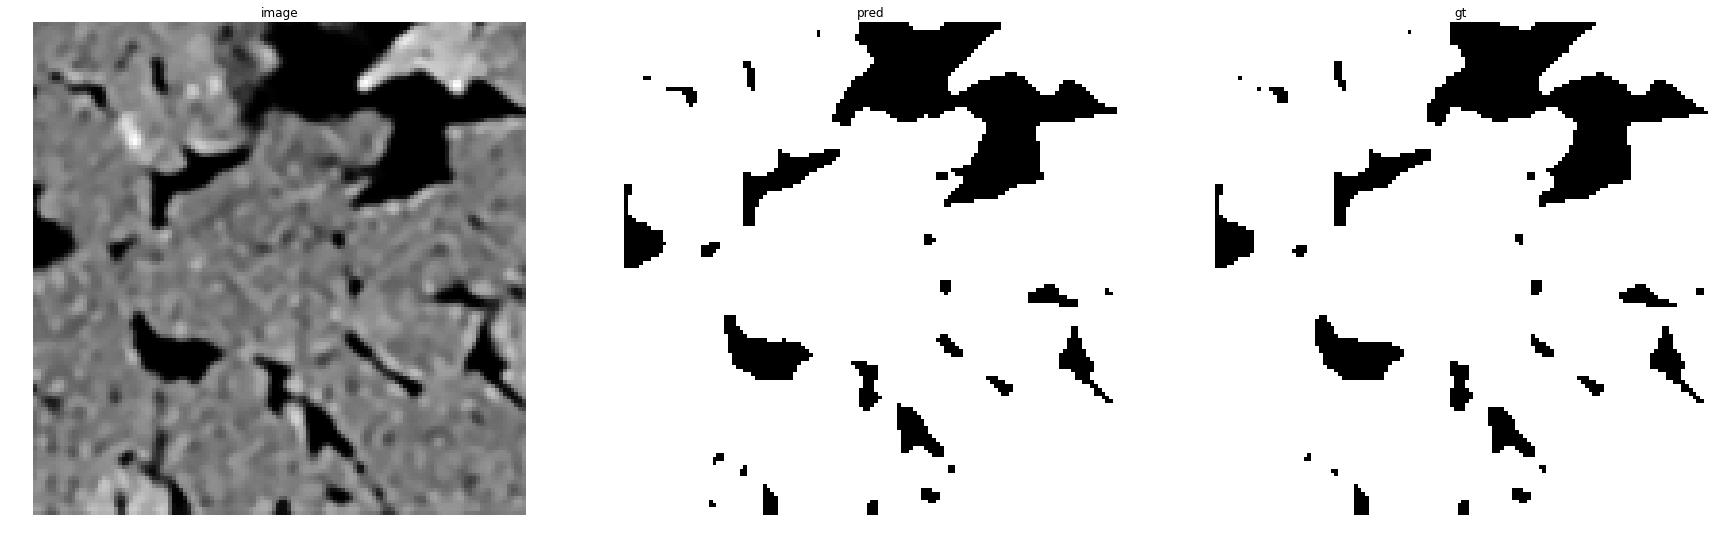

accuracy    : 0.99298095703125
precision   : 0.996797608881298
recall      : 0.9950273495773247
f1          : 0.9959116925592805
pr_auc      : 0.9999601396736442
iou         : 0.99185667752443


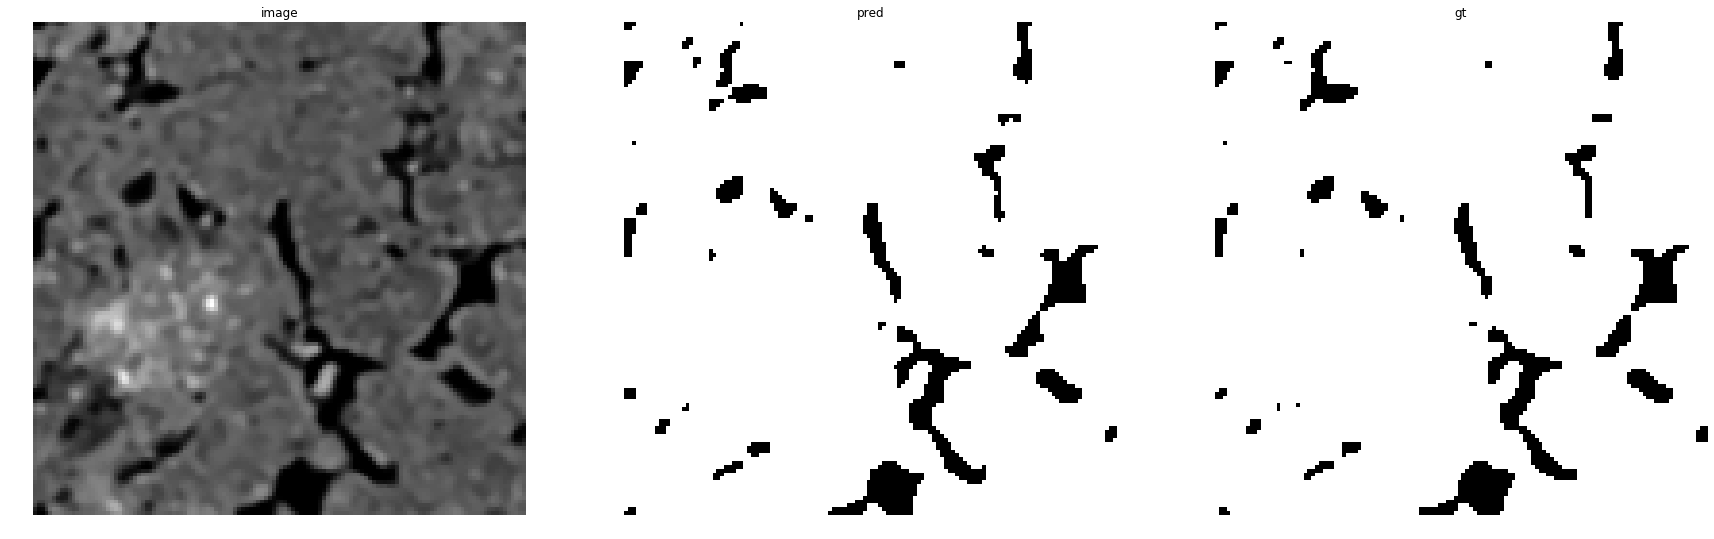

accuracy    : 0.992919921875
precision   : 0.9970298990165666
recall      : 0.9953218686169862
f1          : 0.9961751516750198
pr_auc      : 0.9999591303777189
iou         : 0.9923794507949021


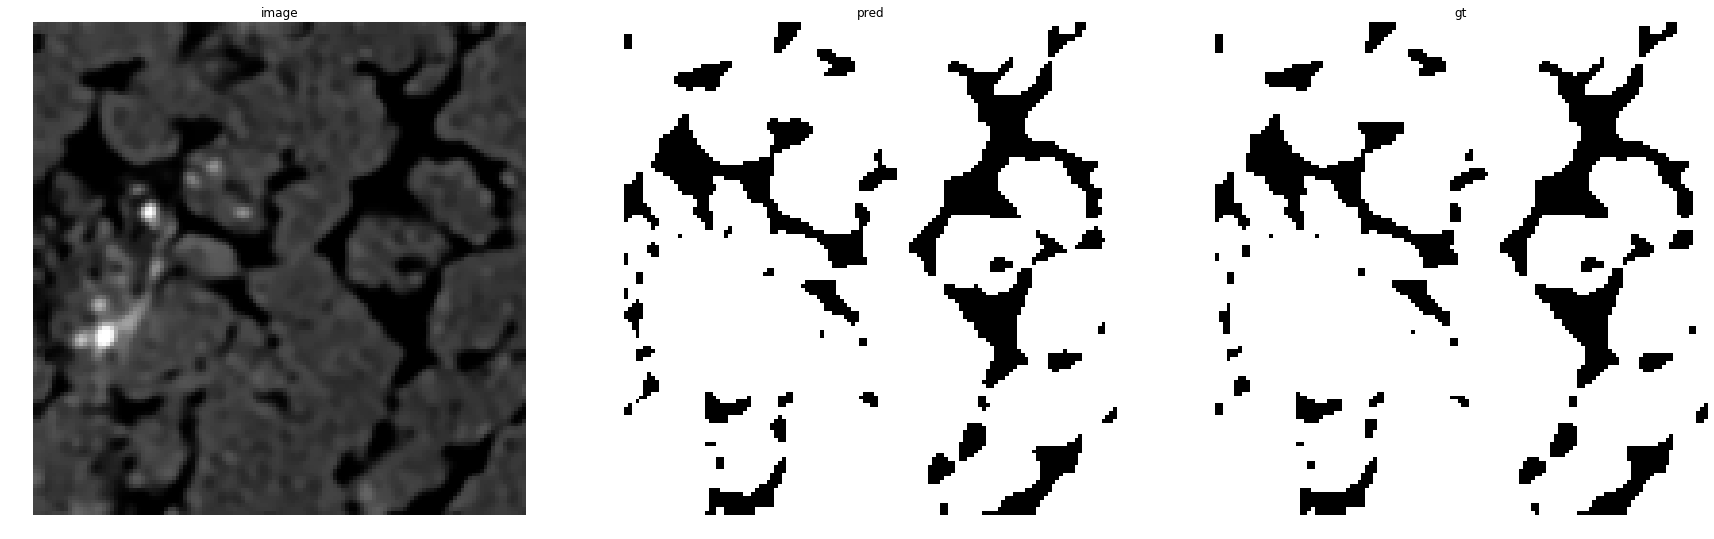

accuracy    : 0.988525390625
precision   : 0.996777265069948
recall      : 0.9895295571875227
f1          : 0.9931401882799387
pr_auc      : 0.9998798605212945
iou         : 0.986373849387548


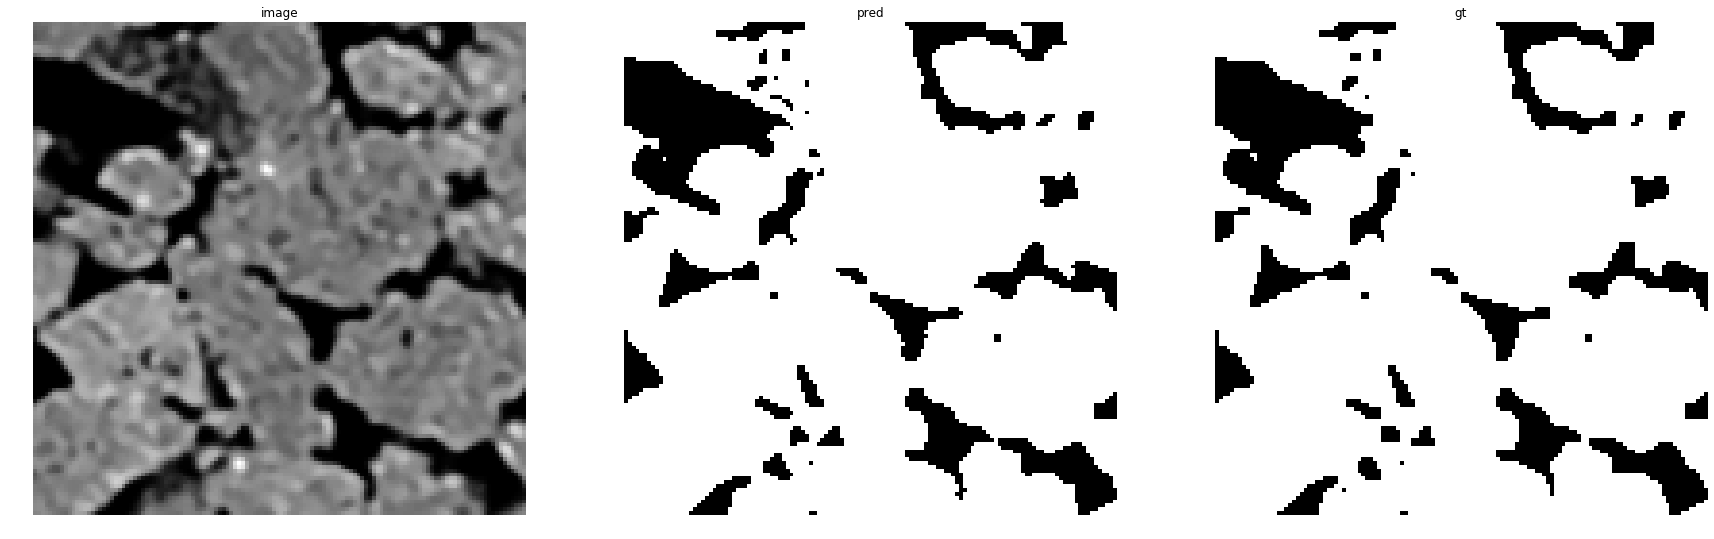

accuracy    : 0.989990234375
precision   : 0.9960344182566405
recall      : 0.9917306116367429
f1          : 0.9938778557563088
pr_auc      : 0.9999031653372819
iou         : 0.9878302166815078


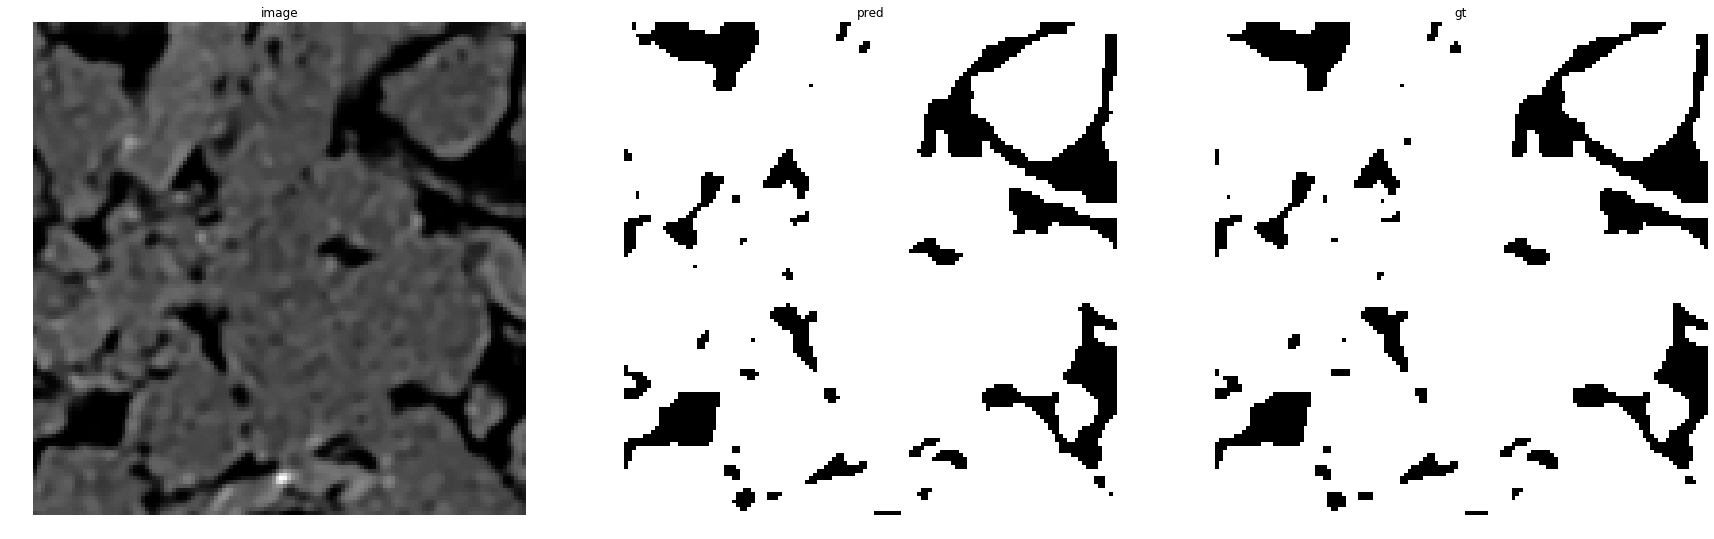

accuracy    : 0.99212646484375
precision   : 0.9968338490321652
recall      : 0.9939015640694504
f1          : 0.9953655469732352
pr_auc      : 0.9999329223445723
iou         : 0.9907738520955515


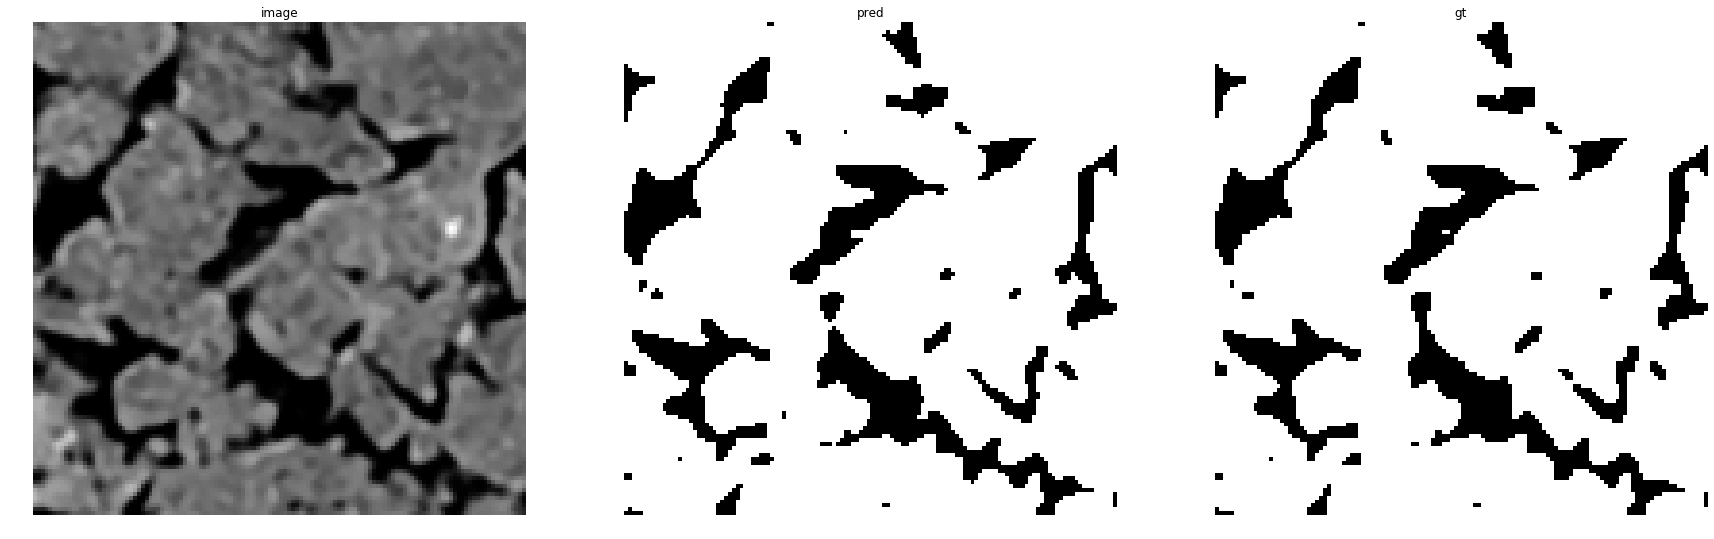

accuracy    : 0.99029541015625
precision   : 0.9956697247706422
recall      : 0.9926825698814576
f1          : 0.9941739034846652
pr_auc      : 0.9999012111980727
iou         : 0.9884153005464481


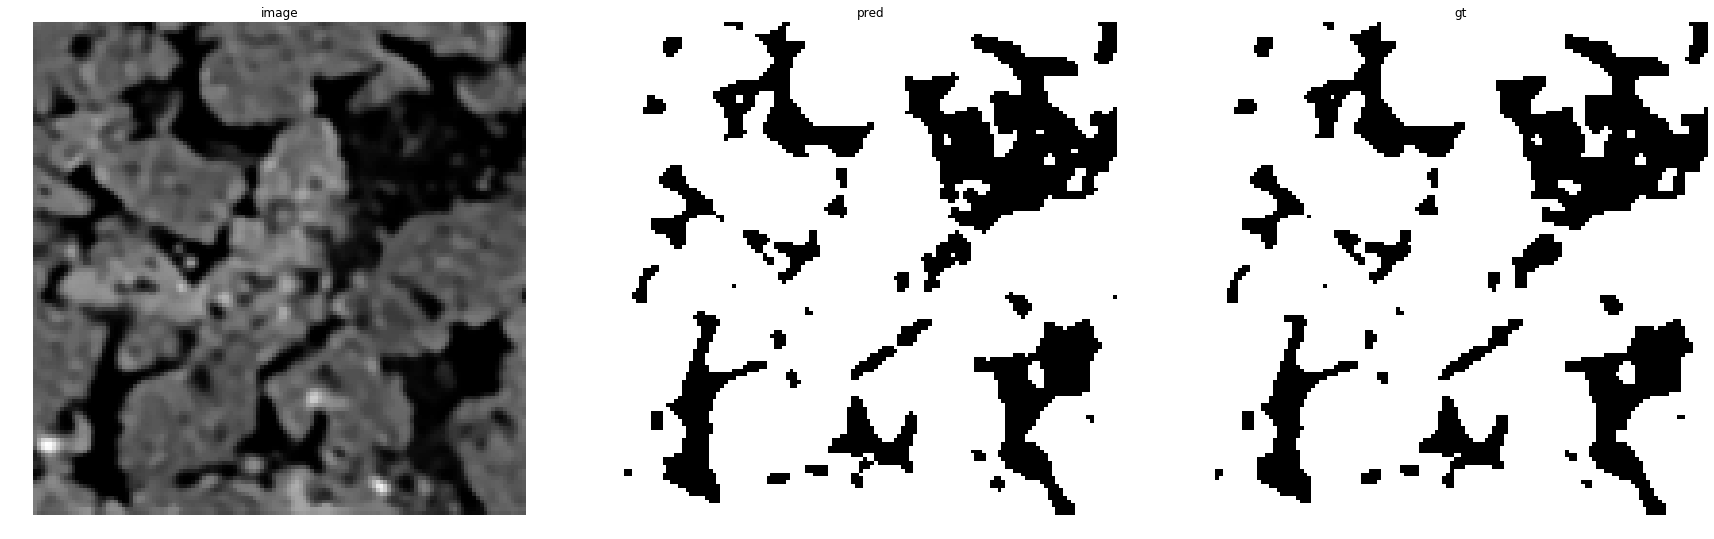

accuracy    : 0.9847412109375
precision   : 0.9933290978398983
recall      : 0.9869023197096418
f1          : 0.9901052798226867
pr_auc      : 0.9997462155690446
iou         : 0.9804044521084809


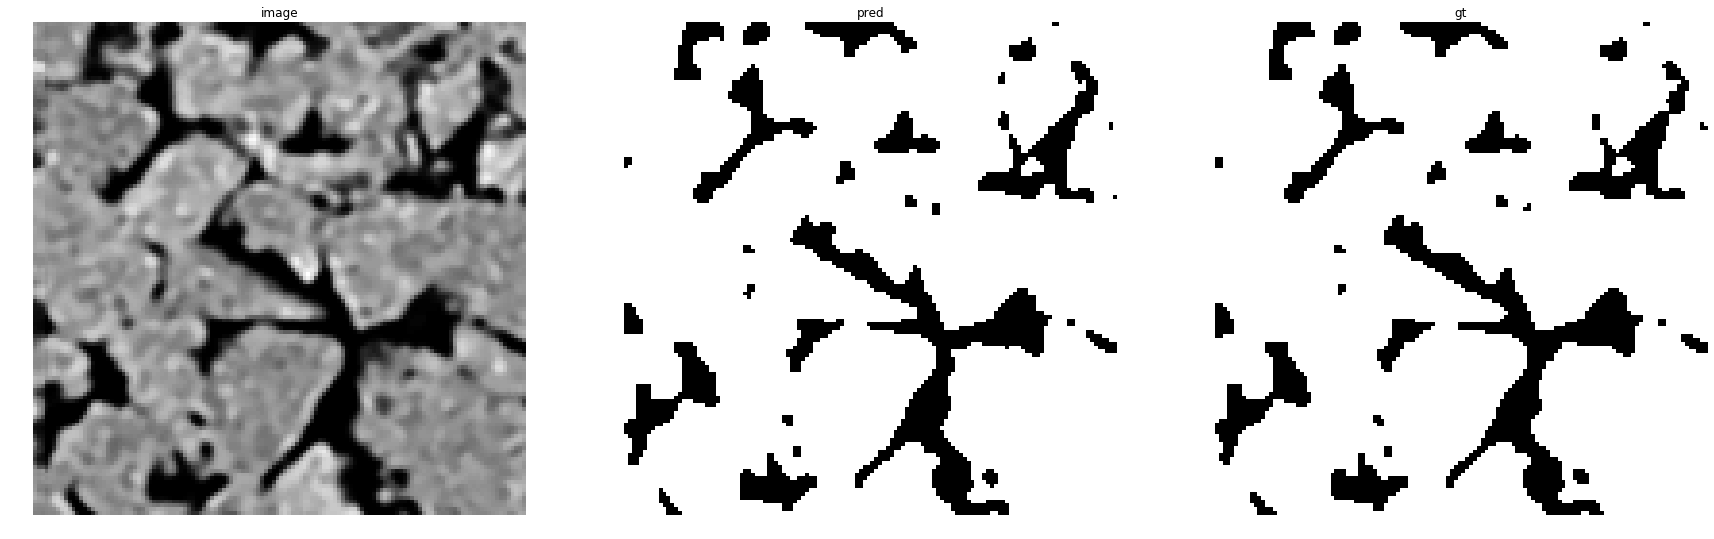

accuracy    : 0.99029541015625
precision   : 0.9958445724283735
recall      : 0.992588286586252
f1          : 0.9942137632373812
pr_auc      : 0.9999003058725726
iou         : 0.9884941023228888


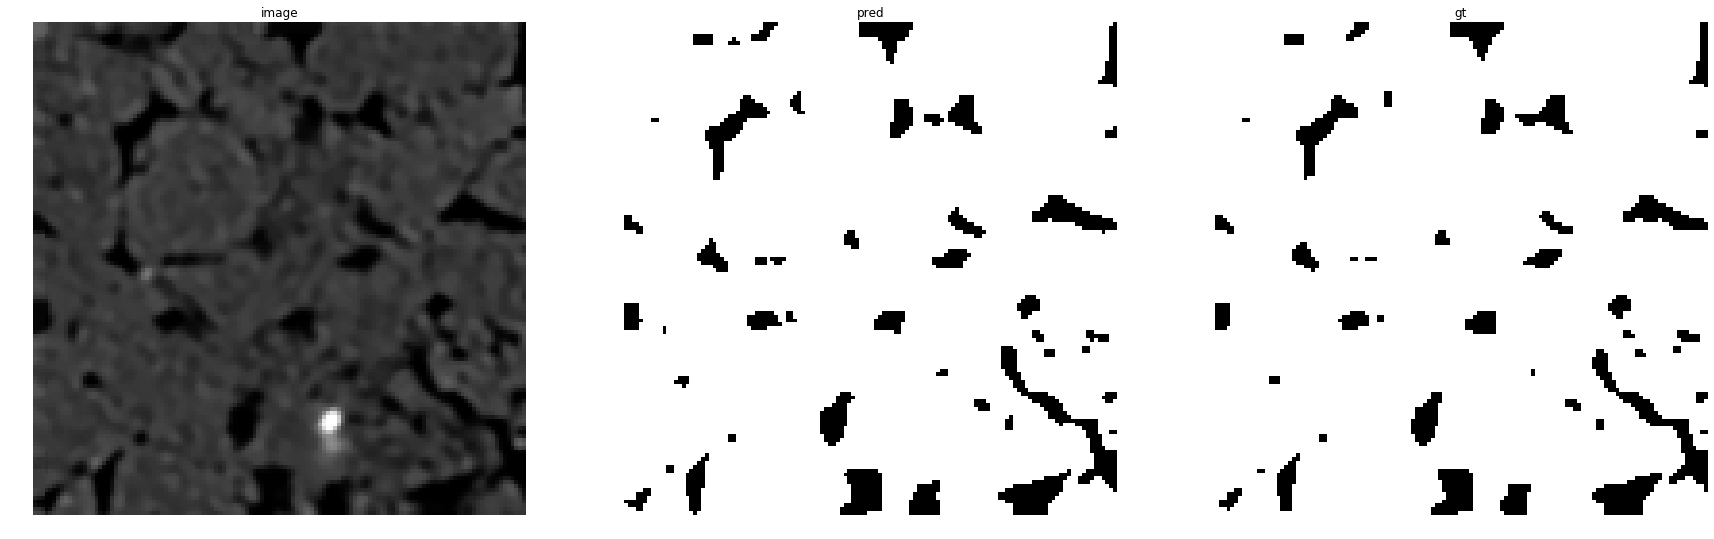

accuracy    : 0.9903564453125
precision   : 0.9977190393130283
recall      : 0.9917311283008803
f1          : 0.9947160725035115
pr_auc      : 0.9999398584845348
iou         : 0.9894876912840985


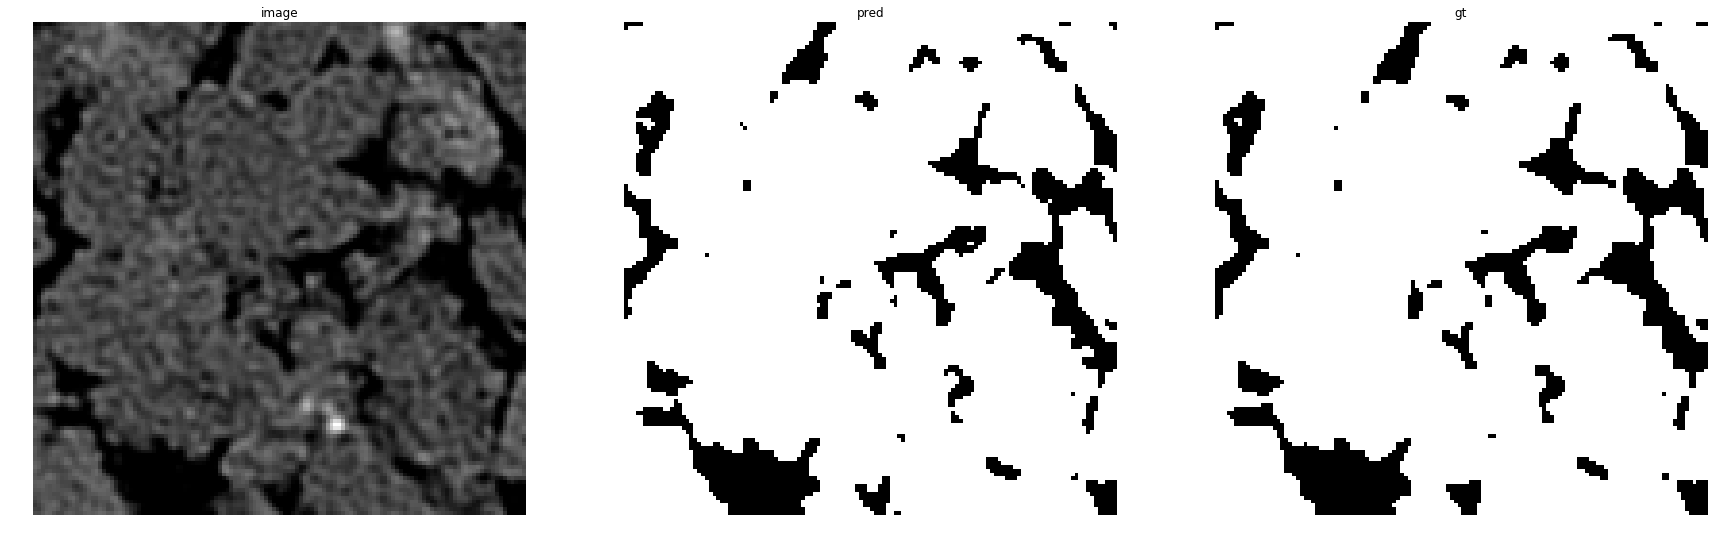

accuracy    : 0.985107421875
precision   : 0.986173794684433
recall      : 0.9963088948396902
f1          : 0.9912154377880185
pr_auc      : 0.9997617370520308
iou         : 0.9825838686652392


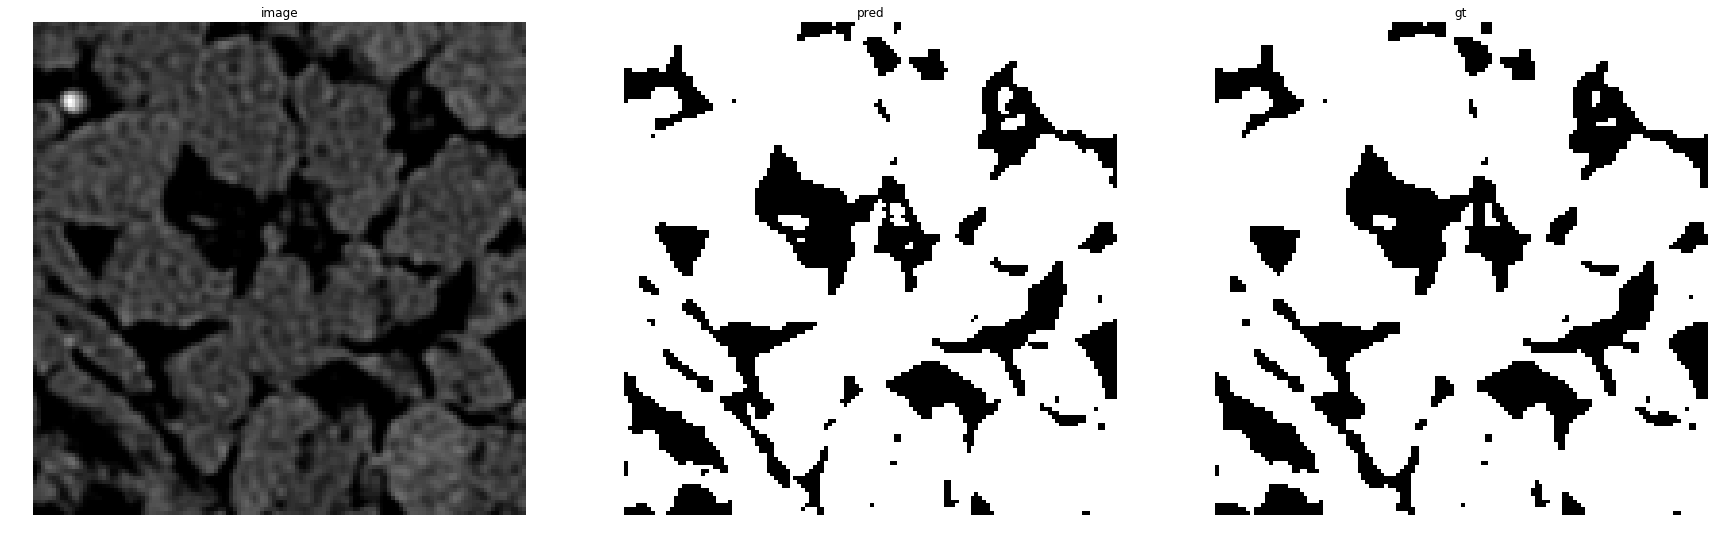

accuracy    : 0.9805908203125
precision   : 0.9798127110838195
recall      : 0.9957098283931357
f1          : 0.9876973073351903
pr_auc      : 0.9996481623185576
iou         : 0.9756936482458152


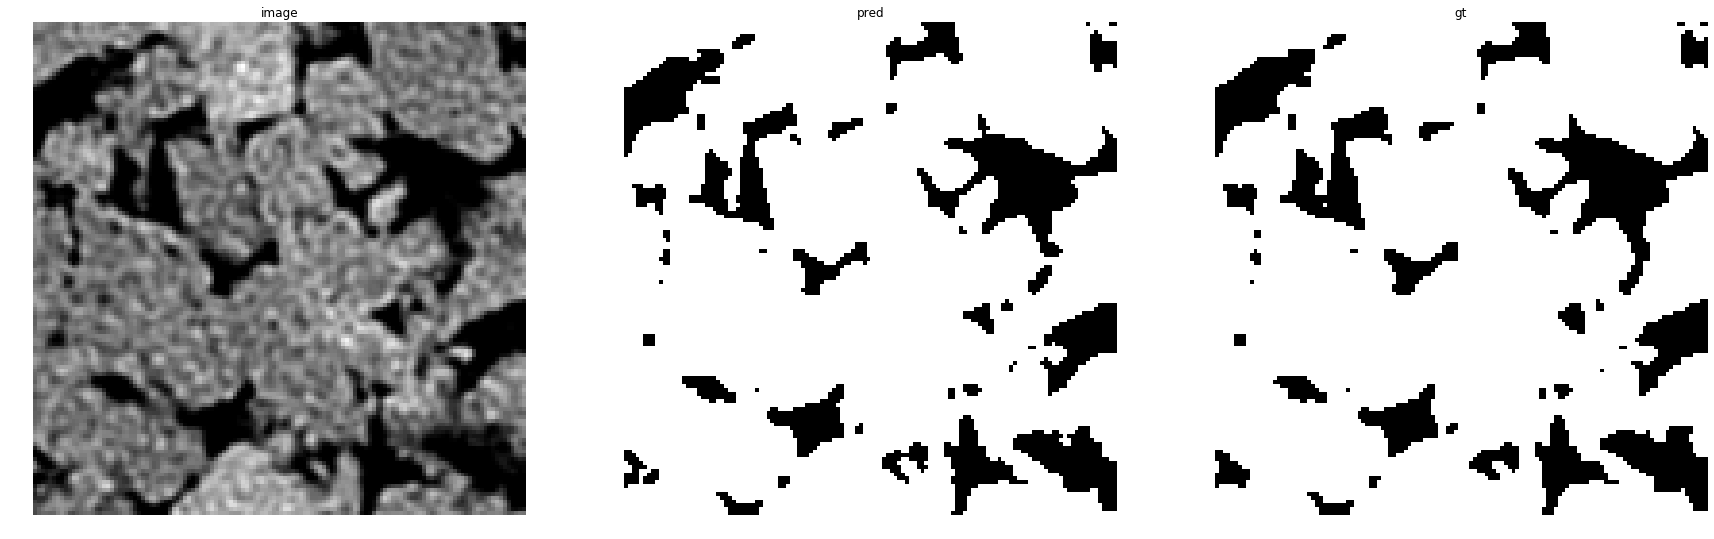

accuracy    : 0.98272705078125
precision   : 0.9827175208581644
recall      : 0.9961489088575096
f1          : 0.9893876326545917
pr_auc      : 0.9996702493185308
iou         : 0.9789981447124304


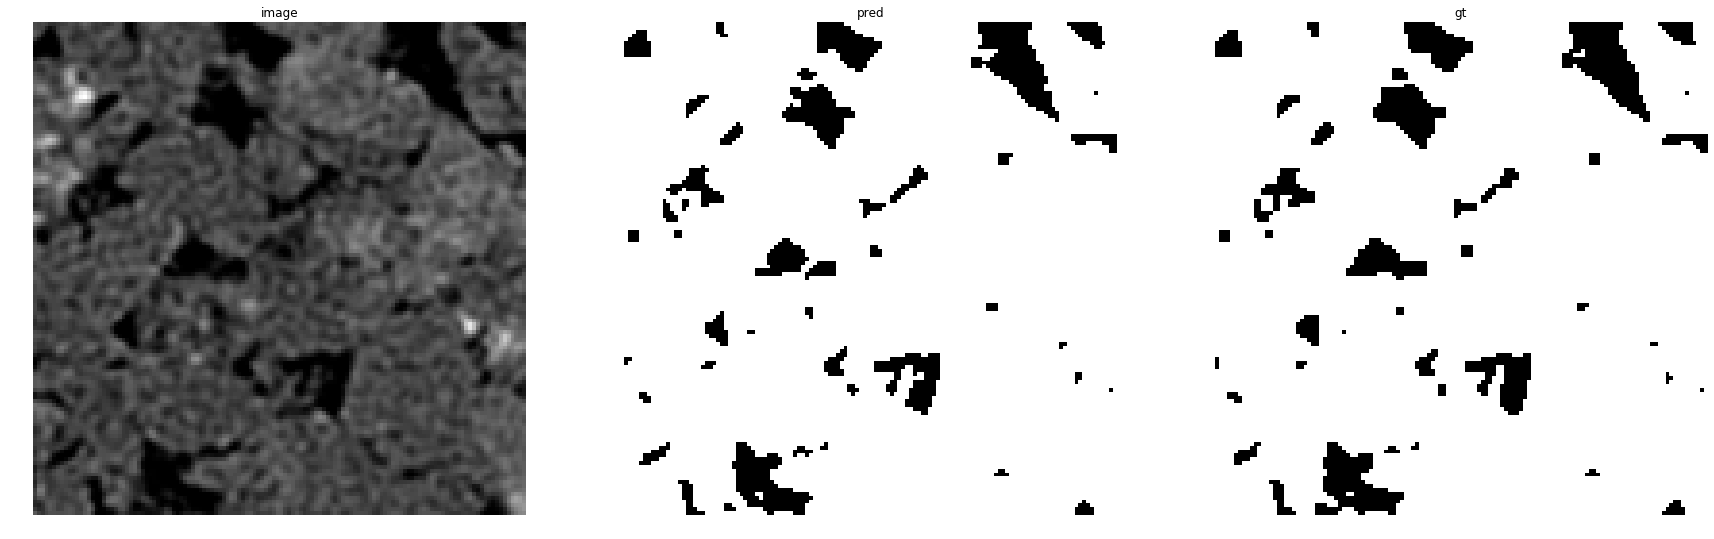

accuracy    : 0.9888916015625
precision   : 0.9901723209477652
recall      : 0.9975586599755866
f1          : 0.9938517667725153
pr_auc      : 0.9998857700615014
iou         : 0.9877786731130809


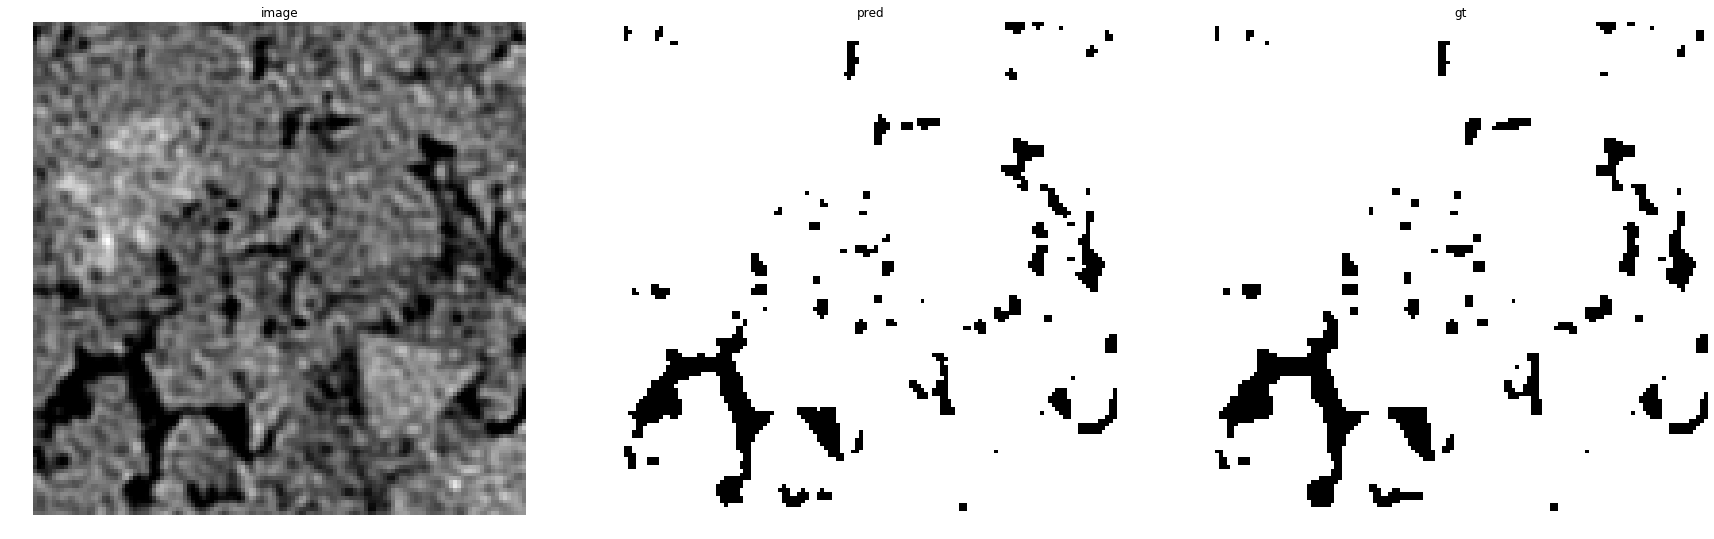

accuracy    : 0.98797607421875
precision   : 0.9906252063114808
recall      : 0.9963479415670651
f1          : 0.9934783328367597
pr_auc      : 0.9998639815747034
iou         : 0.9870411787922642


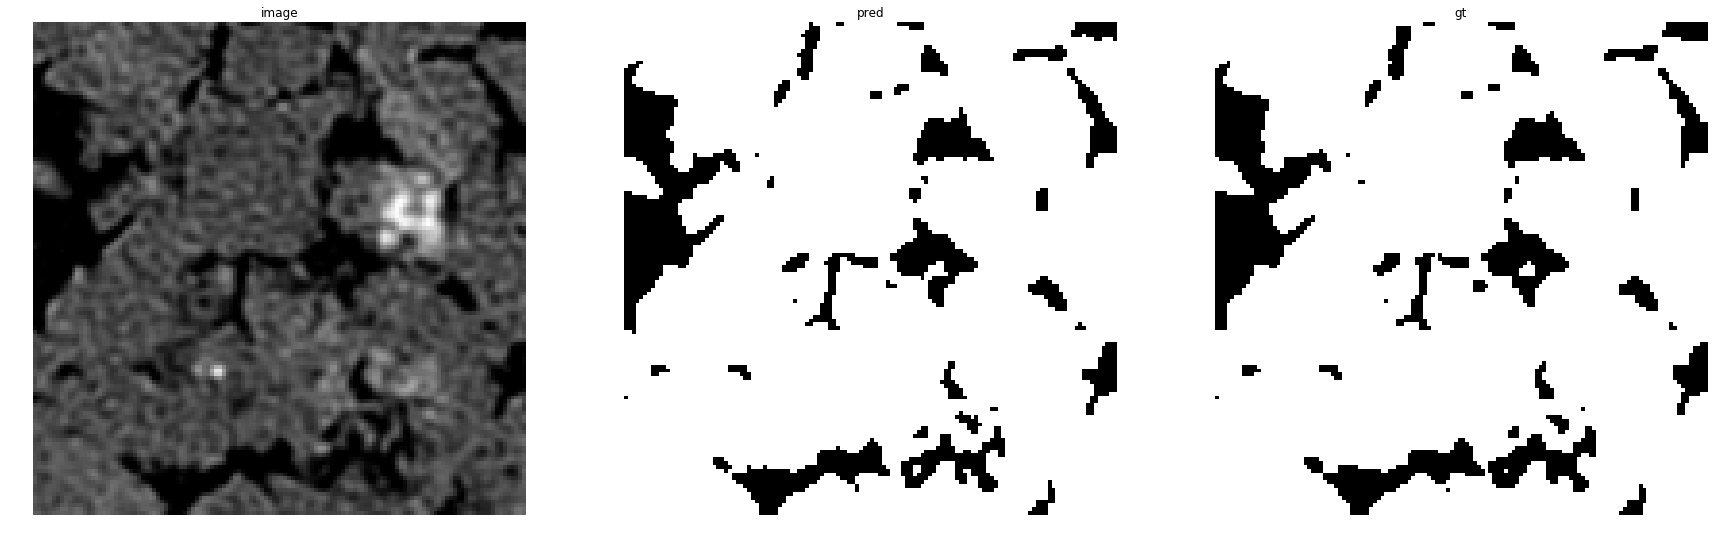

accuracy    : 0.9871826171875
precision   : 0.9891965371682049
recall      : 0.9957508102268635
f1          : 0.9924628526308233
pr_auc      : 0.9998015334227287
iou         : 0.9850384724992876


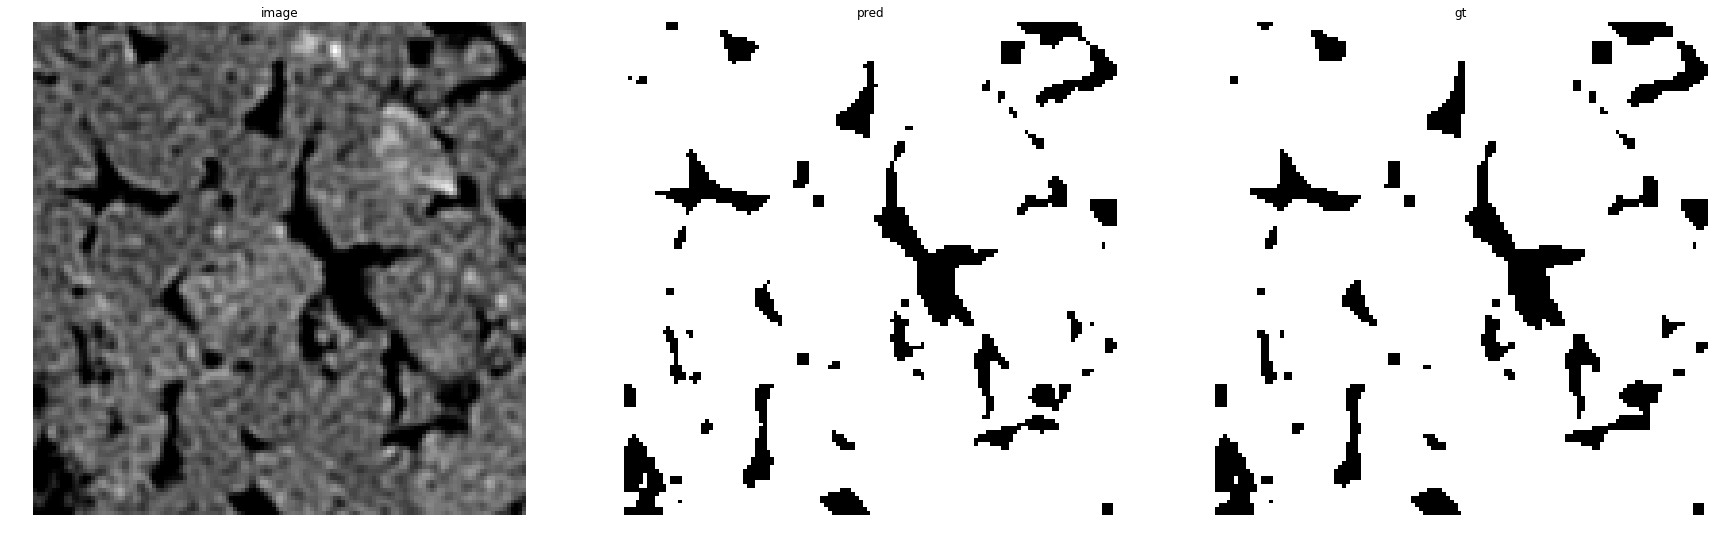

accuracy    : 0.9871826171875
precision   : 0.9895068925313765
recall      : 0.9960648947186745
f1          : 0.9927750636482489
pr_auc      : 0.999849769258899
iou         : 0.9856537778385025


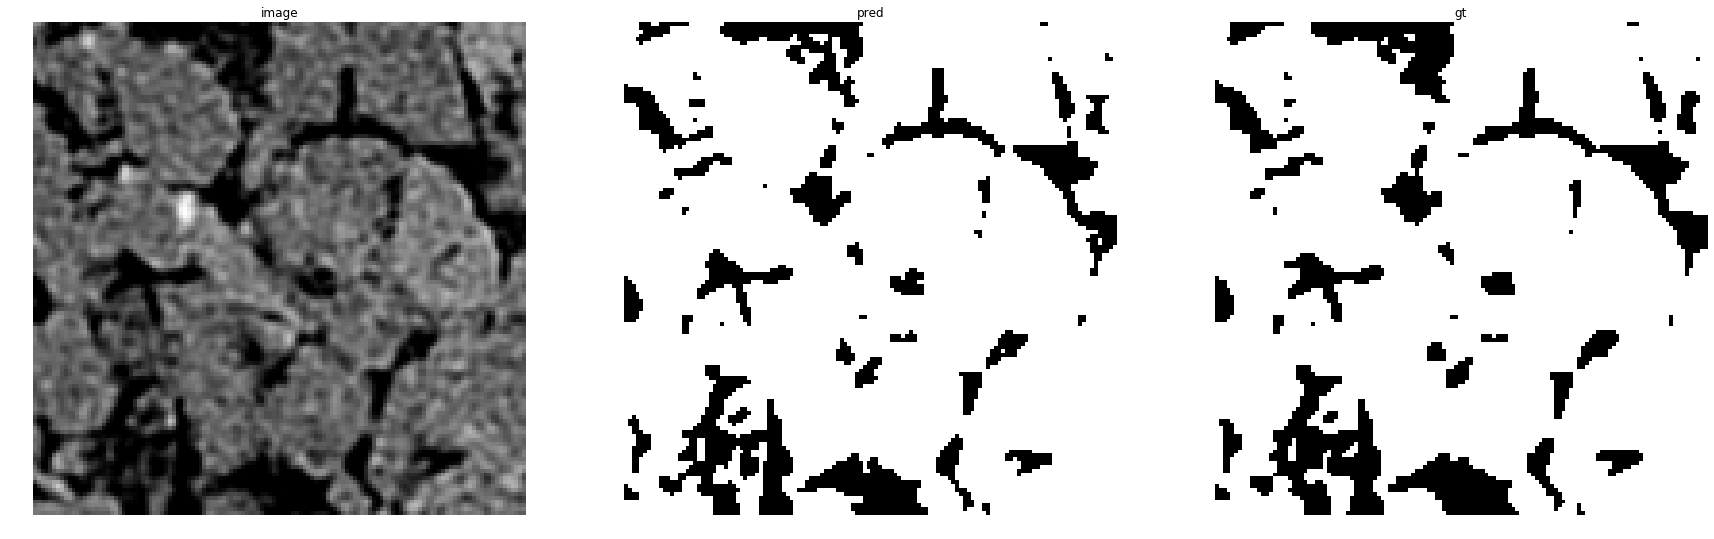

accuracy    : 0.97857666015625
precision   : 0.9799723253950914
recall      : 0.9943836831214898
f1          : 0.9871254080622088
pr_auc      : 0.9995319131767931
iou         : 0.9745781125516043


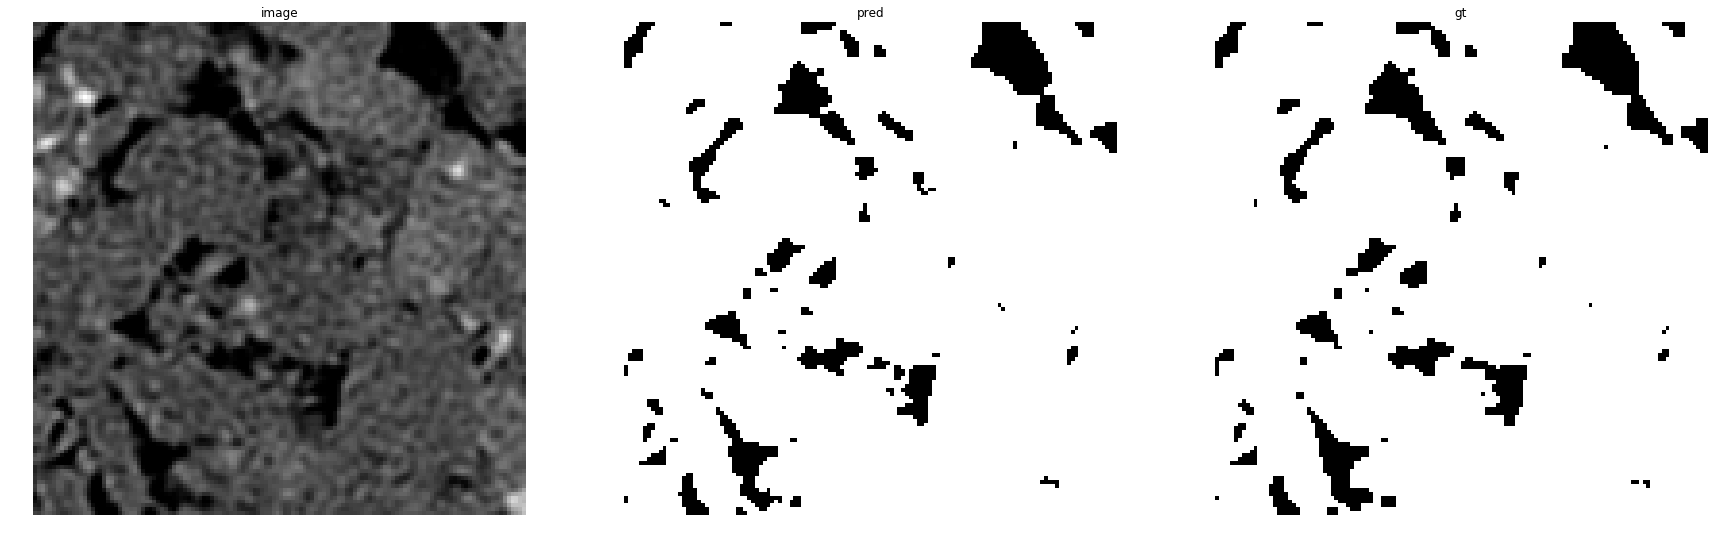

accuracy    : 0.98736572265625
precision   : 0.9897170508770751
recall      : 0.9963464140730717
f1          : 0.9930206682625846
pr_auc      : 0.9998663588559782
iou         : 0.9861380834393625


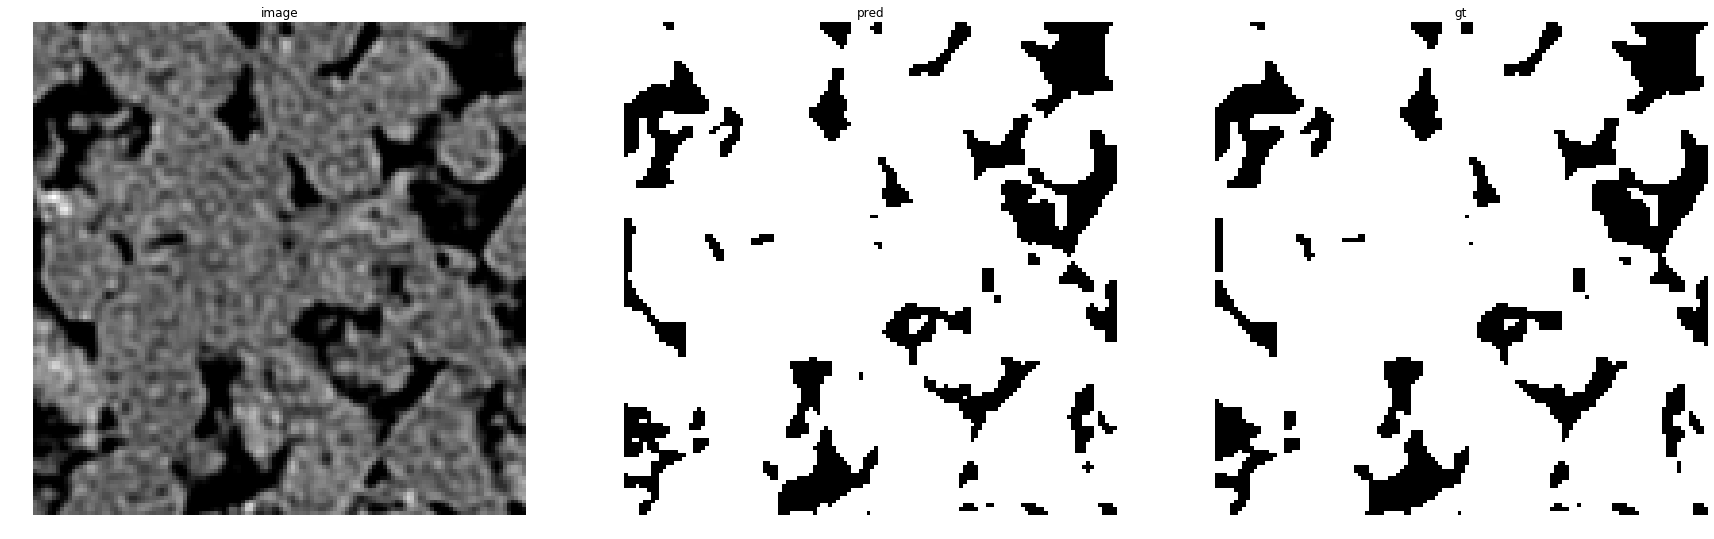

accuracy    : 0.9827880859375
precision   : 0.9856622836342025
recall      : 0.993336827131841
f1          : 0.9894846744723694
pr_auc      : 0.9997088580544383
iou         : 0.9791881918819189


In [34]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt ==0:
            break